In [1]:
import pandas as pd
import numpy as np
import os

import torch
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
from torch.autograd import Variable 
from torch.utils.data import DataLoader

from torchvision.datasets import CIFAR10 
import torchvision.transforms as transforms

from model import CNNModel

In [2]:
cifar_data_root = '/media/analyze/datasets'
batch_size = 32
epochs = 100

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor      (),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5 ))]
)

In [4]:
train_data = CIFAR10(root=cifar_data_root, download=True, train=True, transform=transform) 
test_data = CIFAR10(root=cifar_data_root, download=True, train=False, transform=transform) 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
model = CNNModel()

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [7]:
for epoch in range(epochs):
    epoch_loss =  0
    correct = 0
    total = 0
    for i, samples in enumerate(train_loader):
        data, labels = samples
#         data, labels = torch.FloatTensor(data), torch.FloatTensor(labels)
        
        optimizer.zero_grad()
        
        outputs = model(data)
        loss = criterion(outputs, labels) 
        epoch_loss += loss.item()
        
        predicted = outputs.max(1, keepdim=True)[1]
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
        total += labels.size(0)
        
        loss.backward()
        optimizer.step()
        print('{}'.format(100.*(i+1)/len(train_loader)))

/home/sasatani/PycharmProjects/Machine-Learning/GradCam/model.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(out)


8.030303001403809
16.052000045776367
24.066489219665527
32.08325672149658
40.10221195220947
48.084150314331055
56.07687950134277
64.08007049560547
72.04174709320068
79.9717173576355
87.89332151412964
95.75292491912842
103.68490076065063
111.50616264343262
119.32395219802856
127.0585355758667
134.7292718887329
142.3453631401062
149.73588514328003
157.30866956710815
164.77671241760254
172.17664194107056
179.37188339233398
186.328266620636
193.8055191040039
200.46079874038696
206.06370973587036
211.9900164604187
217.91037273406982
224.01215410232544
230.29929399490356
236.2816276550293
242.33104181289673
247.40301322937012
253.55566120147705
259.2174263000488
264.1169228553772
268.0575096607208
272.5204727649689
277.4059817790985
282.41980242729187
288.9058401584625
295.3259336948395
300.5020263195038
306.3699929714203
310.62736535072327
315.0422914028168
320.4562361240387
326.2341215610504
332.1836950778961
337.296213388443
342.8029110431671
347.85666012763977
352.89256739616394
357.8086

2460.539946079254
2465.7141880989075
2471.2166781425476
2477.350908279419
2481.74209690094
2485.7205452919006
2491.2801094055176
2495.5702362060547
2501.5789189338684
2507.663535118103
2512.9640254974365
2518.6143112182617
2524.680603981018
2530.7201828956604
2536.9743814468384
2543.527050971985
2548.4087567329407
2554.0882358551025
2559.432641029358
2565.397024154663
2569.8531613349915
2576.0236649513245
2580.8839802742004
2587.2691173553467
2592.8192687034607
2598.344494342804
2604.1708903312683
2608.2054438591003
2613.548758983612
2619.155554294586
2625.449589729309
2630.6101756095886
2636.2532935142517
2641.9254536628723
2647.1260237693787
2653.3363614082336
2658.1748900413513
2663.7961983680725
2669.821084022522
2674.265157699585
2679.8160786628723
2685.2394704818726
2690.5389952659607
2695.9641127586365
2701.5475006103516
2706.8902626037598
2712.0664434432983
2717.9843521118164
2723.514096260071
2729.49148273468
2734.868363380432
2739.7225551605225
2745.512810230255
2751.60425090

4831.702339172363
4836.828000545502
4842.666780948639
4847.209656715393
4852.075229167938
4856.754399776459
4863.570559978485
4869.260492324829
4874.050399780273
4879.065825462341
4884.368496894836
4889.226181983948
4893.769592761993
4898.618280410767
4903.736367225647
4908.842343330383
4914.8692746162415
4921.4293384552
4927.291684150696
4933.145134449005
4937.936283588409
4943.501663208008
4949.007161617279
4954.273149967194
4959.62689781189
4963.942746639252
4968.520933151245
4974.0921449661255
4979.735878944397
4984.4937291145325
4990.003223419189
4994.452959060669
5000.493026256561
5005.752090454102
5011.306345462799
5017.112392425537
5021.863229751587
5026.381244659424
5031.298819065094
5035.919283866882
5040.280322551727
5045.636788368225
5050.922829627991
5055.591347694397
5061.7633056640625
5067.087466716766
5072.3445520401
5077.451031208038
5083.30677318573
5087.80704498291
5092.617283344269
5097.726454734802
5101.78382062912
5107.769842624664
5113.528192520142
5117.959962368

7192.299311637878
7197.737753868103
7202.132812976837
7207.582001209259
7212.043581962585
7216.4294056892395
7221.858603477478
7227.236705780029
7232.197533607483
7237.242597103119
7241.818949699402
7247.017236709595
7252.629190444946
7257.876792430878
7261.789667844772
7266.547216653824
7271.830339670181
7278.496834516525
7283.175274610519
7288.639299154282
7293.7311317920685
7299.434267282486
7304.559458494186
7309.49183344841
7315.205590009689
7320.137687444687
7326.148690462112
7331.4189574718475
7336.721915960312
7341.026534318924
7346.498627901077
7351.691356420517
7357.106456041336
7362.119435548782
7367.182329416275
7372.538917303085
7378.150109529495
7382.294045209885
7387.345355272293
7392.940464258194
7396.792251586914
7402.348216056824
7408.5527510643005
7413.686128139496
7419.092725276947
7422.5481379032135
7426.02509355545
7432.908098220825
7437.530727863312
7442.469593524933
7447.794169425964
7452.661016941071
7457.06098651886
7462.885952472687
7465.9397740364075
7471.96

1261.177932024002
1266.055409669876
1272.2414209842682
1277.6690871715546
1283.0189445018768
1288.803513765335
1293.066588640213
1298.7051718235016
1303.5109069347382
1309.2864582538605
1314.508235692978
1320.041939496994
1325.8541185855865
1330.4753620624542
1335.2950870990753
1341.4038994312286
1345.9457285404205
1350.6376550197601
1354.2284653186798
1358.597986459732
1364.2686908245087
1369.0534851551056
1374.201812505722
1379.9574706554413
1384.6951258182526
1390.3616926670074
1394.840631723404
1399.552006483078
1404.7161328792572
1408.8614962100983
1413.9067356586456
1418.3335564136505
1423.146491765976
1428.6922461986542
1432.6286058425903
1438.6651468276978
1443.2556920051575
1448.9802103042603
1453.4838042259216
1459.7989473342896
1464.3157196044922
1470.290982246399
1474.9409084320068
1480.7212171554565
1485.592960357666
1490.9251194000244
1496.8973774909973
1500.6345844268799
1506.8601245880127
1511.8683867454529
1517.271683216095
1522.445270061493
1527.5891509056091
1532.127

3496.4471621513367
3501.4612526893616
3507.561929702759
3511.931816101074
3515.912365913391
3519.8866305351257
3525.214379310608
3530.797853946686
3535.179344177246
3540.028998851776
3545.5723724365234
3549.8880286216736
3555.231129169464
3559.8105154037476
3564.9862546920776
3570.168019771576
3575.3755626678467
3581.500943660736
3587.5154366493225
3593.276752948761
3599.0653252601624
3604.253315448761
3608.310345172882
3613.344569683075
3618.5434160232544
3624.2139225006104
3629.032473564148
3634.6252422332764
3640.051300048828
3645.3454852104187
3650.6877636909485
3656.5732684135437
3662.054834842682
3668.1601524353027
3673.3487977981567
3677.222469806671
3682.7232336997986
3687.390438556671
3692.6444540023804
3697.438335418701
3702.25222492218
3708.336434841156
3713.6494278907776
3718.2951622009277
3723.3696279525757
3729.4670610427856
3734.0773601531982
3739.2306594848633
3744.841115951538
3750.22074842453
3754.6112484931946
3760.335726737976
3765.3290696144104
3769.410490512848
37

5775.906133174896
5780.796562671661
5785.381152629852
5790.767738342285
5795.204496383667
5800.451845169067
5804.109517335892
5808.329894781113
5812.9747931957245
5818.327968835831
5823.404502630234
5827.789589643478
5833.049743890762
5838.687898397446
5843.807061910629
5848.456040620804
5852.892041444778
5857.071502923965
5861.930074930191
5866.629912614822
5871.319148302078
5875.779576539993
5879.286344766617
5883.82367682457
5887.562571763992
5892.461003065109
5897.441169500351
5901.437552690506
5905.55281329155
5910.2032124996185
5913.78671169281
5918.164351463318
5922.682643413544
5926.202355146408
5931.561362981796
5937.444958925247
5941.3781478405
5945.6489799022675
5950.747668027878
5954.723485708237
5958.495676994324
5962.235599994659
5966.821300983429
5971.015800952911
5976.450243473053
5980.442741632462
5984.876376390457
5990.25118803978
5994.562237977982
5999.060178518295
6005.098438501358
6009.0160365104675
6014.007341861725
6017.526109218597
6021.629078865051
6025.6398453

175.57909965515137
179.82550048828125
184.45519256591797
188.8598189353943
194.62887811660767
198.4365599155426
202.88952612876892
207.40421080589294
211.17355632781982
216.33695030212402
221.06949186325073
225.52515697479248
230.64379692077637
234.74042224884033
240.35224866867065
244.27733826637268
249.62651467323303
253.91610169410706
258.1266858577728
262.86868834495544
268.5402386188507
272.88175654411316
277.40941309928894
280.8046452999115
285.1154658794403
289.63020968437195
294.60723328590393
299.30256152153015
302.04322266578674
306.79496121406555
310.9167449474335
314.8643333911896
319.22056794166565
324.50648522377014
328.95622754096985
332.8942379951477
337.37502813339233
341.1564841270447
345.3273820877075
349.6813335418701
355.2958188056946
359.2873537540436
363.83936190605164
367.7157516479492
371.9957790374756
375.7858979701996
379.458847284317
383.41615891456604
389.81736063957214
393.3022201061249
398.1085436344147
402.2598035335541
405.5196375846863
408.930365324020

2157.0591197013855
2161.4251761436462
2165.401529073715
2168.8208360671997
2174.252254009247
2179.053231716156
2183.096395969391
2187.017384290695
2191.694455385208
2196.4876143932343
2200.6825263500214
2204.741627931595
2208.528345823288
2213.195362329483
2218.5601527690887
2223.407556295395
2226.673907518387
2230.8839304447174
2235.408105134964
2238.9192340373993
2243.5992772579193
2248.408413171768
2252.93772816658
2258.1623980998993
2262.919595479965
2266.9300906658173
2271.4939272403717
2275.188792705536
2280.0836052894592
2284.6650137901306
2290.0695357322693
2294.9904198646545
2300.281128883362
2303.909421443939
2308.7229619026184
2313.5911107063293
2318.2531723976135
2321.9222490787506
2325.833662509918
2330.0198187828064
2335.1855359077454
2340.4434423446655
2343.824809074402
2347.85155582428
2352.0427112579346
2355.8186655044556
2359.7666363716125
2363.8370203971863
2368.133680343628
2372.510811805725
2377.444244861603
2382.109841823578
2385.70276761055
2390.49916100502
2394.

4119.911556005478
4123.995841741562
4129.190032720566
4132.7614569664
4137.394506454468
4142.250179767609
4146.942901134491
4151.402636528015
4155.387877225876
4160.632650613785
4165.543620347977
4168.9482662677765
4173.763353586197
4177.455494642258
4183.251855134964
4187.326869726181
4191.926224946976
4195.84584569931
4200.637351512909
4205.543894767761
4210.5837416648865
4214.734234333038
4219.338667392731
4223.127645969391
4227.18390750885
4230.732670545578
4234.758628606796
4238.5165894031525
4242.695694684982
4245.962889432907
4249.78768658638
4253.982710599899
4258.056037664413
4263.5897743701935
4266.528855800629
4270.669341087341
4275.417053222656
4279.405658721924
4284.282762527466
4289.181503295898
4292.916272878647
4297.917750597
4301.83486866951
4306.604934930801
4310.691311597824
4315.00084233284
4320.413465261459
4325.249388456345
4329.732684850693
4334.66517996788
4339.354845762253
4345.513429403305
4349.759827852249
4353.870550870895
4358.871401548386
4363.38801407814


6101.647381067276
6106.402125597
6111.0505521297455
6114.921984672546
6118.849432468414
6123.598751544952
6127.98681640625
6132.2793555259705
6135.392800092697
6138.7693865299225
6141.3720326423645
6145.259383678436
6149.497869491577
6153.9522795677185
6159.452097415924
6163.119285821915
6166.227871417999
6171.38539648056
6174.9499497413635
6179.728518486023
6185.286762237549
6189.37077999115
6192.997014284134
6196.082148551941
6200.510419845581
6205.1979813575745
6210.228298664093
6215.447948932648
6220.700047016144
6224.031594276428
6227.531947612762
6231.385138034821
6234.760543107986
6240.237960100174
6245.744436979294
6252.24636054039
6256.11044216156
6259.459187269211
6263.149163007736
6267.0470995903015
6271.413137435913
6274.500622987747
6278.5883638858795
6283.110127210617
6287.464389562607
6292.515315294266
6295.737473964691
6299.265103340149
6303.251834392548
6307.431764602661
6312.759407520294
6317.150263309479
6321.794016838074
6326.3880434036255
6330.587492465973
6333.775

1200.5258150100708
1204.8507652282715
1209.1521134376526
1212.9731094837189
1218.7457778453827
1222.531008720398
1227.3048377037048
1230.9004323482513
1234.9530699253082
1237.9500784873962
1243.4663276672363
1247.36532330513
1251.1041028499603
1257.0006310939789
1261.2826449871063
1266.6298382282257
1270.8591425418854
1276.3019506931305
1280.724695444107
1285.4257295131683
1290.7200348377228
1294.9364449977875
1298.8424942493439
1303.2033140659332
1308.9798700809479
1313.0413768291473
1317.8547093868256
1321.5249478816986
1325.3748478889465
1330.5245265960693
1336.2416715621948
1340.4545311927795
1344.082596063614
1349.5706841945648
1353.8966596126556
1357.1480023860931
1360.9593200683594
1365.3797583580017
1370.059142112732
1374.7589206695557
1378.7396540641785
1382.9255056381226
1386.6851522922516
1392.1124374866486
1396.5451939105988
1402.7297728061676
1407.808170080185
1411.5109684467316
1415.1112613677979
1419.3682050704956
1424.422357559204
1428.9889516830444
1432.327486038208
14

3117.4391384124756
3121.269589662552
3125.026057958603
3130.311350107193
3134.803953886032
3138.120037794113
3141.6317343711853
3146.4231843948364
3151.100727081299
3155.8953380584717
3159.8074185848236
3164.456638097763
3169.9071152210236
3174.469845056534
3179.277553319931
3183.838376760483
3188.237632036209
3191.5995392799377
3194.852697610855
3197.950502872467
3202.820225715637
3206.7958838939667
3210.133224964142
3214.226303100586
3219.3391876220703
3222.937122106552
3227.1027462482452
3230.779428243637
3234.8715093135834
3239.4231140613556
3244.5544040203094
3250.627632856369
3254.367622613907
3258.5257823467255
3262.2785017490387
3266.6765167713165
3271.9233009815216
3275.338318347931
3279.6444029808044
3284.5423340797424
3289.068263530731
3292.7534742355347
3295.823187351227
3299.376148223877
3303.8452191352844
3310.2049345970154
3314.250048160553
3318.4934544563293
3322.6953163146973
3328.696954727173
3333.01788520813
3336.9364290237427
3341.33647441864
3346.1834807395935
3350

5052.112367749214
5055.615030407906
5060.126332402229
5065.023713707924
5069.132610917091
5073.5706087350845
5076.827014327049
5080.92713201046
5084.543594479561
5089.5335956811905
5094.100304722786
5097.764427065849
5102.704947352409
5105.08011329174
5109.179850459099
5114.429201960564
5120.523696780205
5125.32007586956
5129.016541361809
5132.367352128029
5137.007160305977
5141.512137055397
5145.883627533913
5151.025328278542
5156.341451764107
5160.110925078392
5164.632502913475
5168.718638777733
5172.564687609673
5177.401132941246
5181.456335425377
5186.043106913567
5191.085122466087
5195.492099165916
5199.537052989006
5204.689937472343
5207.91049849987
5213.038972735405
5217.302454829216
5221.643725275993
5225.855022311211
5230.117857813835
5235.087280154228
5239.37364089489
5243.722873568535
5248.744135737419
5252.874101996422
5256.4586309194565
5261.256852984428
5266.045708537102
5270.567328810692
5274.397541165352
5278.562637925148
5282.957940220833
5287.920921444893
5292.3353434

288.7222168445587
293.70144295692444
297.3563950061798
301.2110667228699
306.043372631073
311.12516021728516
314.97116136550903
318.84132075309753
323.66417956352234
327.4533588886261
332.14091420173645
336.907821893692
341.1159760951996
344.8029923439026
349.79336071014404
354.72387886047363
358.76583671569824
362.96362257003784
366.95326924324036
370.5416684150696
374.56956911087036
379.4420123100281
382.94150948524475
387.5465567111969
392.0181739330292
396.1100962162018
399.7470905780792
404.0357105731964
409.3485391139984
414.8028361797333
420.5604598522186
423.8317725658417
428.7131803035736
432.89938712120056
437.6905109882355
442.0645697116852
447.14224886894226
451.7326467037201
454.7673223018646
459.580646276474
462.8595631122589
466.84374141693115
471.1195778846741
475.43004035949707
479.6152386665344
483.70523738861084
488.7498550415039
492.18700909614563
496.06595849990845
500.64212131500244
505.9231791496277
509.8702611923218
515.3811540603638
518.8066592216492
523.493383

2170.0291740894318
2175.388531923294
2179.986275911331
2185.071136713028
2187.847499370575
2192.744505405426
2196.9539666175842
2201.2268962860107
2206.4411311149597
2210.1282489299774
2214.6317117214203
2219.5839087963104
2223.5653595924377
2229.0003838539124
2232.3534893989563
2235.956351518631
2239.8739445209503
2243.370496034622
2247.3023307323456
2250.558078289032
2255.470133304596
2258.913873910904
2262.3941493034363
2267.7900342941284
2272.4232449531555
2277.1527047157288
2280.612724542618
2284.884381055832
2289.2009031772614
2292.6954963207245
2296.7402861118317
2300.8161771297455
2306.040616750717
2310.56756567955
2314.424267053604
2319.8038642406464
2324.0246107578278
2326.766843557358
2330.8439400196075
2336.577779531479
2341.314559698105
2344.9229407310486
2349.726366519928
2353.846911430359
2358.056299686432
2361.769067287445
2365.161022424698
2369.857323408127
2373.9619114398956
2378.4688580036163
2383.023357629776
2386.495897769928
2390.5477628707886
2394.375943660736
23

4059.4007296562195
4063.1676137447357
4067.8783996105194
4072.7381331920624
4077.1097433567047
4081.854794740677
4086.2256577014923
4090.0744817256927
4093.5245065689087
4098.4010128974915
4103.179896831512
4108.031092166901
4111.615280866623
4116.496075391769
4121.381307840347
4125.011807918549
4128.759833574295
4133.415889501572
4137.152279615402
4141.508085012436
4144.706017494202
4149.235002040863
4152.956007003784
4157.447816848755
4161.263213157654
4164.825876235962
4170.00261592865
4174.249263763428
4179.22549533844
4184.393624782562
4189.764060974121
4194.5137004852295
4198.768447875977
4202.7340359687805
4206.479620933533
4210.19246339798
4215.852083206177
4219.827299594879
4223.665718078613
4228.392140865326
4233.087123394012
4236.752303123474
4241.976606369019
4246.040107250214
4250.602464675903
4254.278077363968
4258.754478693008
4263.005276441574
4267.588397264481
4272.500121831894
4277.630829572678
4282.294673204422
4286.511719465256
4289.608650922775
4292.521323680878
42

6014.671268939972
6018.973393440247
6023.223933696747
6026.46143579483
6031.1626534461975
6036.396289825439
6040.698900222778
6044.624447345734
6049.86320066452
6054.020259857178
6057.895580291748
6062.087140083313
6065.275642156601
6070.256631135941
6073.788683652878
6077.724244832993
6080.709307193756
6084.321197509766
6088.89488363266
6093.9681787490845
6096.5817177295685
6101.296413660049
6104.891453742981
6109.764265060425
6114.06674861908
6118.066629648209
6120.75189614296
6124.359872817993
6127.538223981857
6131.11260509491
6133.902487754822
6138.01327419281
6142.303885936737
6146.709596633911
6151.830835819244
6155.995411396027
6159.7495267391205
6163.752503156662
6167.838125944138
6172.103404760361
6176.617162942886
6180.619244337082
6184.77877163887
6188.126999139786
6192.495270013809
6196.350695371628
6200.364295244217
6205.1130039691925
6209.665080785751
6213.234023809433
6217.534288644791
6221.794244527817
6226.47034907341
6230.937205553055
6235.1653525829315
6239.14757871

1292.642097234726
1297.9085400104523
1302.606859922409
1306.3764815330505
1311.9337067604065
1316.0898809432983
1319.3788204193115
1324.259672164917
1326.890531539917
1331.6434578895569
1335.8631224632263
1339.9611644744873
1343.3203303813934
1347.3596165180206
1350.4486594200134
1354.208747625351
1358.2682721614838
1363.0311043262482
1367.2756326198578
1371.054753780365
1376.084958076477
1380.045458316803
1384.2856640815735
1388.6044745445251
1392.4778409004211
1396.5268816947937
1401.2429704666138
1404.676170349121
1409.0768241882324
1412.505509853363
1415.4417052268982
1419.766279220581
1423.1586821079254
1426.507776260376
1431.0344696044922
1435.1081743240356
1439.5066514015198
1443.65274477005
1447.587830543518
1452.1212339401245
1455.6355526447296
1460.6176698207855
1463.9103331565857
1467.22150349617
1472.2574727535248
1476.8152267932892
1481.0584852695465
1486.0043604373932
1489.8889636993408
1494.4462313652039
1498.2877373695374
1502.0329020023346
1506.8957726955414
1511.87282

3154.380513191223
3158.9930243492126
3163.181158065796
3166.915349006653
3171.0444140434265
3174.744958639145
3179.1862494945526
3184.1923768520355
3188.929954767227
3193.1313483715057
3197.0929930210114
3201.134351015091
3206.1682965755463
3211.870347261429
3215.8501782417297
3220.6674885749817
3225.696699619293
3229.738465309143
3234.642063140869
3239.668342113495
3245.0260066986084
3250.034076690674
3253.9921362400055
3257.8835821151733
3261.7222974300385
3266.408949136734
3270.4010014533997
3273.628298997879
3278.3325350284576
3283.650331258774
3287.6548402309418
3291.764231443405
3295.227289199829
3300.1346740722656
3305.352433681488
3309.759717464447
3313.4383952617645
3317.8379485607147
3322.3640344142914
3327.959639787674
3331.7155034542084
3336.6234242916107
3340.063407421112
3344.135088443756
3348.4038410186768
3352.710765838623
3356.7956132888794
3361.3616881370544
3366.3794169425964
3371.3762335777283
3377.5227823257446
3381.474759578705
3385.146957874298
3390.1802763938904

5047.221100330353
5051.028085947037
5055.311942815781
5059.772536993027
5064.533894300461
5069.333112001419
5073.578307390213
5077.746842622757
5082.356358766556
5086.925218820572
5090.24785733223
5095.381435632706
5099.168316602707
5104.130069494247
5106.925806522369
5110.652470588684
5113.956947803497
5118.399408817291
5122.407157897949
5125.9628829956055
5130.5008754730225
5134.562327384949
5139.695728302002
5144.669627666473
5149.46937417984
5153.498865604401
5157.14028263092
5163.52684211731
5167.331910848618
5171.222189426422
5176.049517154694
5179.685571193695
5184.15380191803
5189.388233661652
5193.338212251663
5197.040381193161
5202.164995908737
5205.135819196701
5209.756693124771
5213.524152040482
5218.169463396072
5222.197563409805
5225.550905942917
5229.280054807663
5233.72732758522
5238.564879655838
5242.402794837952
5246.116984844208
5249.230201482773
5254.514063119888
5259.9424159526825
5264.632574796677
5268.496509552002
5273.1776003837585
5276.330115318298
5279.7882246

369.5083718299866
374.52268266677856
379.20237922668457
383.19862389564514
387.24239802360535
391.3423683643341
395.90289187431335
399.5761785507202
404.95751667022705
409.9441862106323
414.22604846954346
417.59394931793213
421.7819027900696
425.83718967437744
429.55832839012146
434.26653504371643
438.519415140152
443.32941365242004
448.76715302467346
452.46558570861816
455.539297580719
459.7506175041199
465.00129556655884
468.0321662425995
471.03458881378174
475.5427794456482
479.5969581604004
483.8561635017395
488.8719654083252
491.7014694213867
495.6231732368469
500.02356576919556
504.36896562576294
508.19086384773254
511.37443351745605
514.8170590400696
518.5128285884857
522.3674740791321
527.8569383621216
530.7513904571533
536.4428577423096
539.9893321990967
543.0240309238434
546.6236221790314
551.0877645015717
555.0488302707672
559.4029867649078
563.8406498432159
568.226470708847
572.8490641117096
576.8613574504852
582.1876871585846
587.0927741527557
591.2402484416962
594.8378157

2249.214467048645
2254.864622592926
2258.4356434345245
2264.222377538681
2267.9977202415466
2271.9201760292053
2276.6461267471313
2282.329475402832
2286.9141459465027
2290.359768629074
2296.254694223404
2300.6400878429413
2304.307084083557
2309.619080066681
2313.538829565048
2317.0203392505646
2320.8355877399445
2324.5648839473724
2328.411209344864
2334.089730501175
2337.730231523514
2341.3071208000183
2344.699122428894
2348.9983048439026
2353.388886451721
2356.6598036289215
2361.086074113846
2364.8327498435974
2368.5295691490173
2373.588526725769
2378.1404395103455
2382.378128528595
2386.3892011642456
2389.9397637844086
2392.9536814689636
2397.2397713661194
2401.5305790901184
2405.416532278061
2409.0290052890778
2412.7775735855103
2417.6570901870728
2420.8101859092712
2425.5561695098877
2430.4295110702515
2432.7346210479736
2436.145802974701
2439.2345490455627
2442.257509469986
2446.7120740413666
2452.082587480545
2455.970559835434
2459.594004392624
2463.893219232559
2468.254565000534

4095.451523900032
4100.268072724342
4103.321174263954
4107.32424223423
4112.124659657478
4116.095566391945
4120.493512749672
4124.7947417497635
4129.43571293354
4133.986507534981
4137.5368148088455
4141.828477501869
4146.9087854623795
4150.706696391106
4153.805077910423
4157.903676390648
4161.682585120201
4166.316231608391
4169.925386071205
4174.6922751665115
4179.290323376656
4182.888983368874
4187.575909256935
4192.599877953529
4195.789521574974
4199.880322337151
4204.541987299919
4209.610499739647
4214.213319182396
4218.959046244621
4223.170474410057
4227.6643751859665
4231.280489563942
4235.072467684746
4239.655148386955
4243.7093361616135
4247.902963519096
4251.813927531242
4256.734226107597
4261.850244402885
4265.52319085598
4269.061111807823
4273.3850873708725
4277.756955981255
4282.981706976891
4286.544428706169
4290.765137076378
4294.786538004875
4299.840729594231
4303.2846113443375
4306.8928500413895
4310.000069499016
4314.336432814598
4317.783028483391
4321.978736281395
4326

6024.781468987465
6028.401762127876
6033.105401158333
6037.788051724434
6043.025500416756
6046.7327708005905
6050.51441514492
6054.704062342644
6058.418172001839
6063.103647828102
6067.368180394173
6071.019968152046
6075.1752454042435
6079.901278614998
6084.651149392128
6088.698140263557
6092.991944909096
6096.255171895027
6100.057207942009
6104.699541449547
6108.149927973747
6112.221557974815
6114.702163338661
6117.919622540474
6120.853021740913
6125.667614579201
6130.575255036354
6134.420713543892
6139.182900071144
6142.65433037281
6147.076954483986
6151.239730000496
6155.945210576057
6159.635761141777
6164.16653907299
6167.57385122776
6172.014138817787
6176.596430897713
6181.138191819191
6185.408692955971
6189.418591618538
6193.436428666115
6197.21597802639
6201.292695879936
6205.033558249474
6208.904334664345
6212.495486140251
6216.375845313072
6220.498038649559
6223.949556469917
6228.040804982185
6231.442529320717
6234.7898136377335
6237.9080892801285
6242.025037884712
6246.555190

1370.5896887779236
1375.472981929779
1381.3167910575867
1384.7868721485138
1388.0516345500946
1392.7845175266266
1396.5488681793213
1400.2744662761688
1404.1321136951447
1408.3293964862823
1412.2345933914185
1416.5867066383362
1419.9154341220856
1423.9039101600647
1428.0081825256348
1433.5458574295044
1437.9000248908997
1441.725165605545
1446.45614027977
1450.4820625782013
1455.0212652683258
1460.0848233699799
1464.3116567134857
1469.2106025218964
1473.0357275009155
1476.7278542518616
1480.6192698478699
1485.217327594757
1489.7530226707458
1494.9124946594238
1499.3328728675842
1503.9962663650513
1507.802900314331
1511.0056540966034
1515.3143484592438
1520.0229151248932
1524.1151587963104
1527.9015493392944
1532.1054940223694
1535.2520015239716
1538.7296693325043
1542.5959737300873
1546.1130406856537
1549.9406883716583
1555.2676455974579
1558.3121075630188
1561.8312919139862
1564.6692276000977
1568.5854187011719
1573.2273230552673
1578.8851327896118
1583.6146621704102
1587.7082028388977

3203.560280561447
3208.033017873764
3212.218591451645
3216.223675966263
3219.6928038597107
3225.3297057151794
3229.8139457702637
3233.152543783188
3237.085084438324
3241.9007844924927
3246.07141828537
3250.4604473114014
3254.3707571029663
3257.7917578220367
3261.8288877010345
3265.573217391968
3269.8649530410767
3273.176693677902
3278.2355496883392
3282.6195776462555
3287.8051240444183
3291.1233077049255
3296.638295650482
3301.6564798355103
3304.8009600639343
3309.535442352295
3314.52347946167
3318.668656349182
3322.743006706238
3326.3263986110687
3330.5387938022614
3336.187984228134
3340.2415792942047
3344.009302377701
3348.571469068527
3353.0992629528046
3356.6562135219574
3361.401064157486
3367.126496553421
3371.4053037166595
3374.219715356827
3378.0150713920593
3382.7975640296936
3386.962679862976
3391.4577956199646
3395.7310333251953
3400.141881942749
3404.971740245819
3408.3794207572937
3411.9970910549164
3415.704983472824
3419.241095304489
3422.6700303554535
3426.3747589588165
3

5096.239513397217
5099.5380001068115
5102.838399887085
5107.073556900024
5111.109317779541
5115.408452987671
5120.137102127075
5123.787907838821
5127.506959676743
5130.390128850937
5134.16589474678
5139.987631559372
5143.452532052994
5147.231836080551
5151.850175619125
5155.470095872879
5160.794388532639
5165.714690923691
5169.468213319778
5174.016691446304
5179.283014059067
5183.896794080734
5186.950867176056
5191.054123878479
5195.0218551158905
5198.6732609272
5203.76725935936
5208.033048391342
5212.462932348251
5217.343940973282
5221.812955617905
5226.941420316696
5229.945860862732
5234.124419212341
5237.665771007538
5241.997934818268
5245.737469911575
5249.055920124054
5252.606565237045
5255.954293012619
5260.115892648697
5264.687783002853
5268.402048110962
5272.18589091301
5275.605065584183
5280.241447210312
5284.124379396439
5287.570373296738
5292.405388593674
5296.201922416687
5300.20868062973
5304.461061954498
5307.440069675446
5311.3676562309265
5315.280106782913
5319.24880433

476.3189797401428
481.95059061050415
486.00903511047363
490.6956777572632
495.5880937576294
500.4889850616455
504.5277509689331
508.5906939506531
511.83911204338074
516.9205601215363
520.2479026317596
523.8746728897095
527.4853329658508
532.1085090637207
536.2354216575623
541.7080011367798
545.2912592887878
549.578625202179
553.7406725883484
558.5991306304932
562.2461788654327
565.6049587726593
569.4999113082886
573.0653557777405
577.1965980529785
581.1299438476562
585.4821844100952
589.3932974338531
593.234207868576
597.1150970458984
602.0422959327698
605.8397901058197
610.35924077034
614.6417419910431
619.7961828708649
624.0673124790192
627.9541897773743
631.4751532077789
635.3159534931183
640.7027175426483
645.0663416385651
648.8091552257538
652.5163750648499
656.9587550163269
661.368501663208
666.0134987831116
670.8291392326355
674.4892041683197
676.8924722671509
681.0306935310364
685.6931972503662
690.3210964202881
693.346549987793
697.5437707901001
701.4110202789307
705.728444099

2324.1442160606384
2327.487501144409
2331.267644882202
2336.500112056732
2341.3226613998413
2345.6630001068115
2349.961256504059
2353.595158100128
2357.6666445732117
2361.8292570114136
2366.529942512512
2371.8767042160034
2374.988242149353
2379.512703895569
2383.3721899986267
2387.1491622924805
2392.212354183197
2395.9825870990753
2401.3724977970123
2406.651070833206
2410.552089214325
2414.7029004096985
2418.965524673462
2422.5580859184265
2426.8746523857117
2431.5202555656433
2435.3026542663574
2439.3267092704773
2442.9346656799316
2447.0780935287476
2451.379134654999
2455.514346599579
2458.9765858650208
2461.7461442947388
2465.693523645401
2470.891579389572
2474.45201420784
2478.926421880722
2483.5564210414886
2487.6345093250275
2491.9636781215668
2495.9002821445465
2500.6805617809296
2503.6922690868378
2506.958600759506
2510.9186549186707
2514.768749475479
2519.8269622325897
2524.6399986743927
2529.5754854679108
2532.973246574402
2537.0145349502563
2541.191479206085
2544.67337465286

4162.987338542938
4167.775630474091
4170.461364746094
4173.925666570663
4177.740623474121
4181.057628631592
4184.8896453380585
4187.986057519913
4191.785702228546
4196.499742984772
4200.330672502518
4203.815701246262
4208.068281412125
4211.527498483658
4215.50492978096
4220.1473734378815
4223.580688714981
4227.458644151688
4231.900161981583
4235.337294340134
4238.668970823288
4242.331159830093
4247.365566492081
4251.708566904068
4255.713305234909
4260.0494639873505
4262.794811010361
4267.462068319321
4271.790377378464
4277.044862031937
4282.229224443436
4287.4126932621
4291.819762468338
4297.575565099716
4302.221909761429
4306.186004638672
4310.922219276428
4313.790577411652
4317.779408931732
4323.342121124268
4328.079540729523
4331.890603542328
4334.059991598129
4338.559782266617
4343.065444231033
4347.357986211777
4352.657967329025
4357.055698633194
4361.331710577011
4364.66189289093
4367.121913433075
4371.218916416168
4375.8572545051575
4379.893338680267
4383.371771097183
4386.82595

6056.8485891819
6061.046518564224
6065.326914548874
6070.7934691905975
6075.4590084552765
6079.900434732437
6083.217277765274
6087.203169822693
6092.061865329742
6095.178733110428
6098.419538021088
6101.822075843811
6105.226671934128
6108.64167714119
6112.325816392899
6116.054469585419
6121.15171957016
6124.101440668106
6128.320907354355
6131.779335737228
6136.456748723984
6140.200939416885
6144.6970999240875
6148.959163427353
6153.777834177017
6159.233473062515
6163.975875616074
6168.196592092514
6172.152986526489
6176.681626319885
6180.425355195999
6185.107126951218
6189.53582072258
6193.978543043137
6198.529579877853
6202.216564416885
6204.458789110184
6209.33389544487
6213.672311544418
6218.5670001506805
6223.46139216423
6226.906624078751
6231.14479804039
6236.288932561874
6240.168208837509
6244.422362565994
6248.496331453323
6252.403959274292
6256.070419073105
6260.807763814926
6264.461635351181
6268.767039060593
6272.615477561951
6275.388476371765
6280.471870422363
6284.943278312

1477.78125333786
1481.6790034770966
1485.0767846107483
1490.167371749878
1494.9230799674988
1499.1222896575928
1503.4826445579529
1507.1355538368225
1511.8345308303833
1515.7408323287964
1520.5050945281982
1525.9537935256958
1528.9247770309448
1533.8295855522156
1536.9964842796326
1540.3783612251282
1544.30996966362
1547.669826745987
1552.5571148395538
1556.2868919372559
1561.396104335785
1565.9049844741821
1569.4967789649963
1574.3812656402588
1579.007607460022
1583.8822836875916
1588.0924787521362
1591.106947183609
1594.9442102909088
1599.0207369327545
1602.5713415145874
1607.1638569831848
1612.5587015151978
1615.3060965538025
1619.1321358680725
1623.635371685028
1629.1120238304138
1631.4407286643982
1634.415122270584
1638.828325510025
1642.8953902721405
1648.2755630016327
1652.3785502910614
1656.1958355903625
1660.485809803009
1664.2137231826782
1668.016865491867
1672.5172412395477
1676.3795762062073
1681.024881362915
1686.0762038230896
1689.7232587337494
1694.3123953342438
1698.180

3286.4040451049805
3290.709792613983
3296.163115978241
3301.4940752983093
3305.144428730011
3309.4704151153564
3313.4707431793213
3318.2259979248047
3322.8012804985046
3326.302717447281
3329.3068614006042
3333.3261165618896
3337.9433875083923
3342.152057170868
3346.274919986725
3349.979603290558
3354.907497406006
3359.5419425964355
3363.7580966949463
3368.1168942451477
3373.2925357818604
3378.1169986724854
3383.076261997223
3388.1149382591248
3390.8822360038757
3394.404858827591
3398.462509393692
3402.7479813098907
3407.166671037674
3411.348727464676
3415.5980360507965
3419.541578054428
3423.3948085308075
3427.354557991028
3431.527440547943
3435.583315849304
3440.267523765564
3444.169382572174
3449.1809945106506
3452.7455203533173
3458.7068769931793
3462.1539902687073
3466.087922811508
3471.4693734645844
3474.736512184143
3479.195544242859
3483.395191192627
3487.9301438331604
3492.0393137931824
3495.900804042816
3499.626280784607
3503.888467311859
3507.819372177124
3512.0740699768066
3

5155.639918804169
5160.525831222534
5166.011806488037
5169.710720062256
5173.0932700634
5177.508876085281
5180.9852521419525
5185.138448476791
5190.39511179924
5194.555876970291
5199.1218140125275
5203.220967054367
5206.45511174202
5210.5828058719635
5214.369721889496
5218.576004981995
5223.9525990486145
5228.773982048035
5232.12341427803
5235.500120401382
5239.684312582016
5244.794530630112
5249.080889463425
5252.998242378235
5256.713998556137
5262.084161996841
5265.960019826889
5271.4574019908905
5275.021653652191
5279.821765899658
5284.053706645966
5287.9172270298
5291.831942081451
5295.833501338959
5300.941667556763
5303.504953145981
5307.628319978714
5311.6880786418915
5316.62775683403
5319.68386554718
5324.764291763306
5328.209775924683
5331.821110248566
5336.73650598526
5341.2073802948
5344.560586690903
5348.513006925583
5350.894773244858
5354.717264413834
5359.05015540123
5363.438661813736
5367.226100921631
5370.4746470451355
5374.03634595871
5377.549361944199
5382.380498170853

585.1063749790192
588.8459794521332
592.2277858257294
595.5695312023163
599.7325975894928
603.490880727768
608.6763341426849
613.3914291858673
616.9200632572174
619.7721629142761
622.9019057750702
626.502534866333
630.9388566017151
636.0664925575256
640.0393886566162
643.2234358787537
647.8424596786499
651.7166979312897
657.147486448288
661.4050648212433
665.5748913288116
669.5388357639313
674.4976484775543
679.903502702713
683.8529314994812
687.457489490509
691.9521431922913
696.2019743919373
699.7337901592255
704.4835002422333
708.8727114200592
712.6036722660065
716.6364171504974
720.8872501850128
724.8898108005524
729.2177827358246
733.4949123859406
738.567305803299
742.1919181346893
745.8402481079102
749.1753058433533
753.0728404521942
757.3158528804779
761.5637528896332
765.0991332530975
768.6713116168976
771.9477727413177
776.7681925296783
780.7581791877747
784.2547614574432
788.6098110675812
792.9092772006989
796.9161264896393
801.172657251358
804.773535490036
808.0802857875824


2409.3065509796143
2411.973338842392
2415.375951051712
2418.9972443580627
2423.6508293151855
2427.562025785446
2432.221142053604
2436.2641422748566
2439.93563580513
2443.4116780757904
2447.3038625717163
2450.5696425437927
2453.5495393276215
2457.5760114192963
2462.1089265346527
2465.528429031372
2470.732481956482
2474.5194025039673
2477.552667617798
2481.3346042633057
2485.22558426857
2489.245898962021
2492.3470997810364
2496.41535282135
2498.988091468811
2503.1369433403015
2507.5024518966675
2511.1491298675537
2515.7032709121704
2520.1634726524353
2523.5864663124084
2528.616951942444
2532.650454044342
2536.564958333969
2540.716933488846
2545.690274477005
2548.9610505104065
2551.1710283756256
2555.180695295334
2560.1077044010162
2565.5513122081757
2570.674302339554
2574.232948064804
2579.345755815506
2583.7978427410126
2587.525042295456
2590.5941622257233
2595.012795686722
2598.6915307044983
2602.2441413402557
2606.7660868167877
2610.2632234096527
2613.333704471588
2617.608757019043
26

4249.754389762878
4253.589398860931
4257.5849277973175
4261.111153125763
4264.230983734131
4268.407059669495
4272.751190185547
4277.317554473877
4281.049095869064
4285.758862733841
4289.759546995163
4293.378575563431
4297.914743185043
4301.973830938339
4305.495146989822
4310.1333792209625
4314.937052965164
4319.218121290207
4323.295834302902
4327.51220870018
4331.773369550705
4335.474432229996
4339.747917890549
4343.022723913193
4346.766122102737
4349.907913208008
4353.555812597275
4357.37007188797
4362.222230911255
4365.812323093414
4370.2346868515015
4374.69145488739
4378.121729135513
4382.151311635971
4386.929631471634
4391.5971763134
4397.250380754471
4401.340221643448
4405.101920843124
4409.079382658005
4412.764896631241
4417.395048379898
4421.401620149612
4425.03545665741
4428.665035486221
4432.823613882065
4437.16163277626
4439.950377941132
4443.631953954697
4446.730605840683
4450.520786762238
4455.8221783638
4460.4328236579895
4464.208086013794
4468.689757347107
4472.2494075298

6127.4158227443695
6131.1456344127655
6135.685086488724
6140.045070886612
6144.324776887894
6149.048492670059
6153.287212610245
6158.386560678482
6161.73942232132
6165.955668926239
6169.755238771439
6174.987699270248
6178.349690437317
6182.67284154892
6185.640546798706
6191.099458217621
6195.78351354599
6200.021158695221
6204.452826023102
6209.142997264862
6212.700938463211
6216.201864957809
6220.052375793457
6225.354315280914
6228.335519075394
6231.761620759964
6237.060702085495
6240.393506526947
6243.5577664375305
6248.570495128632
6252.509784460068
6256.093546867371
6259.925927639008
6262.949199914932
6267.047980070114
6271.300878286362
6275.713734388351
6280.082934141159
6284.806301832199
6287.583975791931
6292.223208427429
6296.282488822937
6300.506715297699
6304.612160205841
6309.221259593964
6313.870247840881
6316.759014368057
6320.175924777985
6324.191194534302
6327.389940977097
6331.01634144783
6335.840203523636
6340.048701047897
6343.671800851822
6348.492320775986
6353.233443

1587.0732245445251
1590.2391424179077
1594.2984108924866
1599.4576716423035
1604.2140278816223
1608.7675013542175
1612.658902645111
1617.8917665481567
1621.5980820655823
1625.8602752685547
1629.5384883880615
1635.5185565948486
1640.2528042793274
1643.9320142269135
1647.6599278450012
1650.2622654438019
1654.3948905467987
1658.2151017189026
1663.0403261184692
1666.953684091568
1671.1364433765411
1675.3916976451874
1679.5970194339752
1684.8359229564667
1688.9569146633148
1693.3168246746063
1697.168182849884
1700.8811535835266
1704.107947587967
1707.7751083374023
1712.3756985664368
1716.7461986541748
1719.6324300765991
1724.0134329795837
1727.2367134094238
1733.014172077179
1736.1751573085785
1739.6565589904785
1743.575518131256
1747.7066502571106
1752.0983242988586
1755.9572825431824
1759.9145135879517
1764.5203032493591
1769.0335450172424
1772.4321856498718
1776.8042950630188
1781.4800720214844
1786.4654636383057
1789.7546653747559
1794.5971813201904
1799.9304523468018
1804.1840863227844

3416.8347606658936
3421.3269095420837
3425.4202270507812
3428.5605216026306
3432.254301548004
3435.8809514045715
3440.1461749076843
3444.793945789337
3448.6099722385406
3452.79651761055
3457.6117684841156
3461.070816755295
3465.647875547409
3470.619874238968
3474.7202727794647
3477.466141462326
3480.8936672210693
3485.013219833374
3488.328455209732
3491.6341183185577
3494.902675628662
3500.653031349182
3503.7722120285034
3507.8813309669495
3511.5905816555023
3514.8820717334747
3518.984481573105
3523.5056641101837
3529.2155792713165
3533.004054784775
3538.0427691936493
3541.2827429771423
3546.905054092407
3550.66006231308
3554.1845178604126
3557.234807729721
3561.441835641861
3564.1271398067474
3567.370568752289
3571.4343180656433
3576.6184759140015
3580.1428797245026
3583.9304871559143
3588.454179763794
3592.2389476299286
3595.3940205574036
3598.8225526809692
3603.3787660598755
3606.851800441742
3610.033821105957
3614.870906829834
3619.4516496658325
3623.997516155243
3627.7911128997803

5245.97830414772
5251.038723230362
5256.095331430435
5260.5755298137665
5265.723266839981
5268.556423664093
5272.581697463989
5275.943905591965
5280.707146406174
5284.784982919693
5288.9716255664825
5293.007530450821
5295.960631608963
5298.287702798843
5302.196203947067
5306.087231874466
5311.445012807846
5314.98206114769
5319.642497777939
5324.4228079319
5328.860104799271
5333.883687734604
5337.111273288727
5340.856292247772
5344.717585802078
5348.772917509079
5352.855113267899
5357.589030504227
5361.427150726318
5365.577538967133
5368.914897918701
5373.679472446442
5377.887990951538
5382.680744171143
5386.4423615932465
5389.803179979324
5394.583176851273
5398.755895376205
5403.321301698685
5408.217094659805
5412.867707967758
5417.025458574295
5420.717972040176
5424.121918439865
5429.349902868271
5433.410706758499
5437.606843709946
5442.425956964493
5446.065630435944
5451.575393199921
5455.522193431854
5458.409657239914
5462.0419726371765
5466.769496440887
5470.199959754944
5474.65802

711.8599607944489
716.263190984726
720.6679456233978
725.5128047466278
728.8247308731079
733.5292181968689
738.2552285194397
741.5384676456451
746.0015618801117
750.7447474002838
753.7404580116272
757.5665783882141
761.6046195030212
766.4074740409851
770.36252617836
773.9056673049927
777.9355001449585
780.8105282783508
784.7650990486145
789.1728734970093
792.6132521629333
796.8462290763855
800.6762373447418
803.5901093482971
807.8902339935303
812.0629897117615
816.6074523925781
821.028642654419
824.9693372249603
829.3030750751495
833.243204832077
837.9168989658356
842.7376062870026
847.6478540897369
850.6405370235443
855.3407237529755
859.2334725856781
862.5003402233124
867.7250912189484
870.9747407436371
874.5580928325653
878.9756877422333
883.6704947948456
888.12921833992
891.4290857315063
895.682285785675
898.5625953674316
901.8167700767517
904.7397568225861
910.3315651416779
914.7585122585297
919.866637468338
922.7014193534851
926.7677216529846
931.6068115234375
935.3637139797211
9

2545.1302106380463
2549.5936148166656
2553.9216363430023
2558.9944155216217
2562.656575202942
2566.64675283432
2571.099376678467
2575.24249458313
2579.9633479118347
2585.0628514289856
2588.5015921592712
2593.0401768684387
2597.3923678398132
2600.312881708145
2603.879861831665
2607.2150127887726
2610.3052628040314
2614.4783494472504
2618.5224096775055
2622.466349363327
2624.8258011341095
2630.084269762039
2634.4132359027863
2638.4056510925293
2641.971911430359
2645.4172973632812
2648.176752090454
2652.503366470337
2656.52712726593
2660.6797046661377
2664.737271785736
2668.7502365112305
2672.9643754959106
2676.6738090515137
2680.702851295471
2684.7943229675293
2689.2069873809814
2693.307692527771
2697.970389842987
2702.828143596649
2707.2040343284607
2710.6640021800995
2715.489485502243
2719.1287274360657
2724.0991082191467
2727.6285440921783
2731.985211133957
2736.9416506290436
2742.121671438217
2747.5610740184784
2750.946525335312
2754.675015926361
2759.457335472107
2763.8098731040955


4365.577198982239
4369.598653793335
4373.987726211548
4377.593435525894
4382.16134428978
4384.800784111023
4387.851333141327
4391.290918827057
4395.016038656235
4399.061462163925
4403.153767347336
4406.918565750122
4410.65198636055
4415.825164079666
4419.717070102692
4423.742162704468
4426.742797613144
4429.77543592453
4433.594804286957
4437.187698602676
4440.45579123497
4444.146862030029
4448.957376003265
4453.447026252747
4457.288484573364
4461.037437438965
4465.940670967102
4469.715442657471
4473.440853834152
4477.5663096904755
4482.085980176926
4485.473970413208
4489.67529630661
4493.769004821777
4497.9442501068115
4502.28884601593
4506.010327577591
4509.755414247513
4513.8844521045685
4517.1323845386505
4521.392605543137
4524.63781452179
4528.665802955627
4532.748820304871
4537.06680059433
4540.4530329704285
4543.96471619606
4547.3137464523315
4551.741756439209
4556.052264690399
4559.8555364608765
4563.193681240082
4567.442925930023
4569.997474193573
4574.749601840973
4578.1184341

6221.466992616653
6224.764330863953
6228.8575530052185
6233.695328235626
6236.5415053367615
6240.348363399506
6244.443003177643
6247.939174413681
6252.959945440292
6257.307077169418
6260.489599227905
6264.655656814575
6270.148894309998
6274.418949127197
6277.959159612656
6280.792448997498
6284.77740073204
6289.499886751175
6293.333351135254
6298.038595676422
6301.940935611725
6305.889124393463
6308.873701095581
6312.900865077972
6316.4779143333435
6320.483441829681
6324.5795822143555
6329.203469753265
6334.942714691162
6340.77059841156
6345.076828479767
6349.156362533569
6352.546169996262
6356.367619276047
6360.448029279709
6363.708234548569
3.829798698425293
7.7921764850616455
12.977363348007202
16.453187942504883
21.886982440948486
25.655601024627686
29.75425672531128
33.97251892089844
38.1487832069397
42.04463863372803
47.00163269042969
50.29069948196411
53.42683482170105
57.3690881729126
61.122217655181885
64.8634774684906
69.38443541526794
73.67100024223328
78.81998896598816
82.59

1655.6594715118408
1659.50275015831
1664.070925951004
1667.7531032562256
1672.2304191589355
1676.3063044548035
1679.8781547546387
1683.3214318752289
1686.8287544250488
1691.3556113243103
1696.514190196991
1700.4176273345947
1704.4281125068665
1708.5749502182007
1712.9766011238098
1716.1319715976715
1720.382847070694
1724.7197225093842
1728.961282491684
1733.2581708431244
1736.1561815738678
1741.048498392105
1744.9867293834686
1749.255704164505
1754.0436618328094
1757.7930147647858
1761.3488266468048
1765.6188290119171
1769.404878616333
1773.338880777359
1778.7742784023285
1783.605075120926
1787.3761661052704
1791.746613740921
1796.723423242569
1801.5680344104767
1805.5305132865906
1808.5065007209778
1813.369821548462
1817.744255065918
1821.5958280563354
1825.1626455783844
1829.8987681865692
1835.0300571918488
1838.496341228485
1842.6933841705322
1846.6155452728271
1851.4686036109924
1856.493658065796
1860.1063268184662
1864.3634502887726
1869.0605018138885
1874.525160074234
1878.755604

3468.369612455368
3472.5702345371246
3475.705044746399
3479.503012895584
3483.804899454117
3488.6272733211517
3493.6059806346893
3498.1935379505157
3503.067603826523
3507.7694852352142
3512.5478308200836
3516.3366038799286
3519.691602230072
3523.8189272880554
3528.3219542503357
3532.418261051178
3536.581382751465
3541.5526056289673
3545.2523069381714
3549.3738226890564
3553.7221608161926
3556.831515789032
3559.7858374118805
3562.7132802009583
3566.675703763962
3571.2032124996185
3575.1972744464874
3579.6795060634613
3582.7760310173035
3586.5256655216217
3590.829024076462
3595.2951719760895
3598.67359995842
3602.988149881363
3607.4883954524994
3611.6453726291656
3615.7466962337494
3619.0136320590973
3623.8903114795685
3628.005441427231
3632.367099046707
3636.6484820842743
3639.2635385990143
3642.521899461746
3646.5800244808197
3650.152461051941
3654.9236764907837
3657.765796661377
3662.1852412223816
3666.51242685318
3670.9250588417053
3675.56955575943
3680.0802116394043
3683.90340328216

5303.934476494789
5308.171954274178
5311.703926920891
5315.026764988899
5320.089589715004
5324.320644021034
5328.394473671913
5332.264576792717
5336.2745670080185
5341.532735705376
5345.508489489555
5349.493192076683
5352.445453047752
5357.05423104763
5360.882907509804
5365.4135237932205
5370.317937970161
5373.421815037727
5377.038164258003
5381.183999180794
5385.087805867195
5389.360145688057
5394.667974591255
5398.574345946312
5401.960804581642
5404.744777083397
5408.827125906944
5412.472268939018
5416.9567040205
5420.88673555851
5425.276956677437
5429.905458569527
5434.634884476662
5438.76590692997
5442.550474047661
5447.371972441673
5451.965424418449
5455.3179849386215
5458.666170954704
5462.6019550561905
5466.375354886055
5471.880298733711
5476.0850068330765
5479.110186696053
5484.362232327461
5487.4402376413345
5490.706966042519
5493.794635653496
5496.638751626015
5500.467231869698
5504.586050152779
5507.840737938881
5512.383540272713
5517.31930410862
5520.712540745735
5524.21663

813.1027021408081
816.6884098052979
819.8819773197174
823.7621614933014
828.1742608547211
831.8524258136749
835.3395230770111
838.8394258022308
843.707307100296
847.9597117900848
851.8896796703339
854.4669797420502
859.1423590183258
863.4488179683685
867.3585908412933
871.8945815563202
875.6558368206024
879.9469349384308
885.3894364833832
888.9873538017273
892.8668446540833
897.158106803894
901.3926815986633
905.568986415863
908.8136897087097
913.4382729530334
917.6390686035156
920.9626071453094
925.4003322124481
929.3605351448059
933.1197922229767
938.868129491806
943.3431584835052
946.4552419185638
951.2779810428619
955.3889715671539
959.3395855426788
962.8526220321655
965.9907221794128
970.390157699585
973.857424736023
978.1229939460754
982.5306944847107
987.2472157478333
991.192216873169
995.6980185508728
999.8888592720032
1004.2784280776978
1008.0980064868927
1012.8649990558624
1016.1165564060211
1019.467102766037
1023.4727990627289
1026.9398596286774
1031.0727322101593
1035.32845

2607.3599259853363
2611.0700607299805
2613.937789916992
2617.6336743831635
2622.7251727581024
2627.747589826584
2631.667023897171
2635.7294347286224
2639.90661072731
2645.1137816905975
2648.890920162201
2652.4399785995483
2655.6644444465637
2659.43869304657
2662.440115213394
2666.657821416855
2670.2504444122314
2673.6552472114563
2676.966843366623
2681.1038658618927
2685.9761865139008
2690.279711008072
2695.1915390491486
2699.350841283798
2702.7535421848297
2706.2752814292908
2710.2708089351654
2714.08890748024
2716.8100292682648
2721.226681470871
2725.3003413677216
2728.877950191498
2733.0817136764526
2738.31107711792
2742.274337053299
2747.9223368167877
2751.4692137241364
2756.006952524185
2759.038762331009
2763.157894849777
2767.3617684841156
2771.584962129593
2774.98379278183
2779.412284851074
2783.3027794361115
2787.8095228672028
2791.5265312194824
2795.949098110199
2798.938777923584
2802.2923526763916
2807.3997950553894
2811.111613512039
2816.146120786667
2820.698933839798
2825.5

4398.91678404808
4402.738188028336
4406.593443632126
4410.990543603897
4414.582520008087
4419.585005283356
4424.828447818756
4427.902623653412
4432.889695644379
4437.49276971817
4441.921770095825
4445.68315911293
4449.848563909531
4453.606505393982
4457.774286746979
4463.135820388794
4467.838041305542
4471.328221082687
4475.335218191147
4479.541954278946
4483.136699438095
4487.586570978165
4490.974594593048
4493.718483686447
4498.34671664238
4502.1637308597565
4506.875148057938
4512.260421037674
4515.868270874023
4520.202159404755
4524.210892677307
4527.506253957748
4532.663658380508
4536.525797843933
4540.82594203949
4545.350672721863
4549.834599494934
4553.401859998703
4557.862471342087
4562.032192468643
4565.8062427043915
4569.98862528801
4573.455142498016
4575.832802772522
4579.843968868256
4584.035615444183
4588.102883815765
4590.597703933716
4594.732393741608
4598.921619415283
4602.914908647537
4607.989803552628
4611.6301238536835
4615.98065495491
4620.605947256088
4624.112115144

6286.40010869503
6289.739496350288
6293.752555012703
6299.155427098274
6303.8534923791885
6307.9204832315445
6311.501128077507
6314.788052201271
6319.588356614113
6323.254361271858
6327.337098240852
6330.678515076637
4.077234745025635
7.033365726470947
10.31688404083252
14.53221607208252
17.77573251724243
22.943416118621826
25.782123804092407
30.39326786994934
34.8691246509552
38.969823122024536
42.910115480422974
47.3879177570343
52.0724618434906
56.96959948539734
62.02230954170227
66.52708315849304
71.39265894889832
74.96279668807983
78.90860199928284
83.35150837898254
87.74147534370422
91.49704694747925
95.35096192359924
99.88296866416931
104.09301400184631
107.63363575935364
112.33739447593689
115.6990065574646
119.87338447570801
124.75454092025757
127.80213284492493
131.26223230361938
134.86185574531555
139.02134680747986
143.49705910682678
147.969731092453
152.44341921806335
156.3921914100647
160.2534420490265
163.71829676628113
168.46662878990173
172.50750470161438
174.820194244

1776.8599343299866
1781.186264514923
1786.3337049484253
1790.0296840667725
1793.7361149787903
1797.6731185913086
1801.3163883686066
1805.9453966617584
1808.825722694397
1813.185775756836
1818.3062295913696
1822.30912733078
1826.639181137085
1830.510930776596
1835.8515093326569
1839.223244190216
1843.2377934455872
1846.6594636440277
1851.1827156543732
1855.617912530899
1860.8784744739532
1864.9556353092194
1868.5408596992493
1872.8732419013977
1876.4577968120575
1880.8088057041168
1884.013429403305
1887.768310546875
1892.0234742164612
1896.2365775108337
1900.081233739853
1903.6186814308167
1908.068325996399
1911.6443071365356
1915.161600112915
1918.7494144439697
1922.5307734012604
1927.0410068035126
1931.2087075710297
1935.809396982193
1938.7071425914764
1942.6859707832336
1946.9295415878296
1950.8422787189484
1954.62065076828
1959.0197353363037
1963.889720439911
1967.0390455722809
1971.4526574611664
1975.9477713108063
1979.8692972660065
1982.7795214653015
1987.495153427124
1991.6697978

3592.0128461122513
3596.0424033403397
3601.5408021211624
3607.317638039589
3610.8813239336014
3614.363196015358
3619.1673122644424
3622.7646127939224
3626.016867995262
3630.4554303884506
3634.138133406639
3638.910696864128
3642.8203374147415
3646.451292157173
3651.1613351106644
3655.699338078499
3659.645135998726
3662.8524569272995
3667.276808142662
3672.2672213315964
3675.942580103874
3680.3286041021347
3683.94977915287
3687.4751740694046
3691.510373711586
3695.505088686943
3698.6751693487167
3701.9635676145554
3707.029976248741
3711.9094766378403
3717.3192566633224
3721.295026421547
3724.87693631649
3728.1487797498703
3731.9708100557327
3735.3862920999527
3739.01205766201
3744.333360552788
3747.9497915506363
3751.2386931180954
3755.7603648900986
3759.7880553007126
3763.532560944557
3766.792118906975
3769.966071009636
3773.172599673271
3776.27034676075
3781.4218727350235
3785.0734897851944
3789.950022339821
3794.3939167261124
3798.6762214899063
3803.561392903328
3805.86339199543
3809.

5403.387620568275
5406.579918503761
5409.585660099983
5414.770951390266
5418.815652966499
5422.921879410744
5427.231120228767
5431.307469964027
5435.191629290581
5439.445716261864
5442.606112599373
5446.202752232552
5449.989488720894
5453.00748193264
5457.475999712944
5460.74607527256
5464.115403056145
5467.948240876198
5472.393647313118
5476.990098118782
5481.409484505653
5484.832064270973
5488.669230103493
5492.610896945
5496.970151305199
5502.379099726677
5507.26897084713
5512.459653735161
5516.185554623604
5520.579714417458
5524.866086125374
5529.045192837715
5532.914107203484
5537.750479102135
5543.161100268364
5546.744197010994
5549.650878071785
5553.975950360298
5558.302135109901
5561.007349848747
5563.177528500557
5568.268874287605
5571.839555382729
5574.548770308495
5577.332813620567
5580.986646533012
5585.33440721035
5588.558888077736
5592.844590783119
5597.726565003395
5602.02320253849
5606.454488873482
5610.213717579842
5614.623331665993
5618.942726254463
5622.821563363075


916.0251312255859
920.3341207504272
923.7596027851105
929.0591375827789
931.706714630127
936.0908546447754
940.1613717079163
944.2362098693848
948.0965270996094
952.2614154815674
957.2588934898376
962.1645460128784
967.0713653564453
970.9142780303955
973.9784770011902
977.6041970252991
980.6602756977081
984.6008791923523
988.6462202072144
991.6627151966095
996.1176202297211
999.0688636302948
1002.6551702022552
1006.202609539032
1009.5382897853851
1014.2660195827484
1018.967422246933
1022.5088729858398
1027.3170742988586
1030.6644895076752
1034.2991926670074
1037.839433670044
1041.51984167099
1044.3683488368988
1048.3888976573944
1052.0860583782196
1056.7923901081085
1060.2307679653168
1064.8581397533417
1070.062751531601
1072.799057006836
1077.2517447471619
1081.6104578971863
1085.624113559723
1090.4883728027344
1095.6476893424988
1099.8988461494446
1103.2743082046509
1107.604579925537
1111.8243989944458
1114.780942440033
1118.4869351387024
1123.193787097931
1126.617663860321
1130.6271

2713.64142370224
2717.3199949264526
2720.8579449653625
2725.0548572540283
2728.699722766876
2732.614104270935
2736.873730659485
2740.7135968208313
2745.6910910606384
2749.3575489521027
2754.467382669449
2759.2681410312653
2763.042777299881
2766.9910774230957
2770.5014197826385
2774.0543377399445
2776.446035861969
2781.3906626701355
2786.4279704093933
2791.7282485961914
2796.009280204773
2800.3524436950684
2804.058780193329
2807.9031484127045
2812.494196176529
2816.2102189064026
2820.2474937438965
2823.63512635231
2828.697478532791
2833.066368341446
2836.700176715851
2840.8309412002563
2845.3845772743225
2849.4794583320618
2853.1028418540955
2855.3402557373047
2859.0481135845184
2863.0275242328644
2867.799327135086
2872.0468866825104
2876.5519454479218
2880.927904367447
2885.7034323215485
2889.5773298740387
2893.2806413173676
2898.307344198227
2901.657501935959
2906.2212364673615
2910.0849702358246
2913.5477998256683
2919.077146291733
2923.5922152996063
2927.3854188919067
2932.695622920

4525.927473306656
4529.701357603073
4534.642925977707
4537.9228093624115
4542.555582284927
4545.925227403641
4550.23900103569
4554.318270921707
4558.281918048859
4562.45817232132
4566.892534732819
4569.639446735382
4574.089820384979
4577.949754238129
4582.373351097107
4585.849192142487
4590.457901000977
4593.90759563446
4598.378842353821
4602.030247449875
4606.212144613266
4610.664771795273
4614.940572977066
4619.327837228775
4623.831658124924
4627.924054861069
4632.732882738113
4635.609232187271
4638.373834133148
4642.707802772522
4646.5837824344635
4650.949706315994
4654.76326584816
4658.793722867966
4662.817444086075
4665.911914587021
4669.333643913269
4673.876421928406
4677.596633195877
4681.5103487968445
4685.9773960113525
4690.182014942169
4694.6584458351135
4698.753077030182
4704.9348220825195
4709.128285884857
4712.096035242081
4717.369610548019
4721.121291399002
4725.7624843120575
4729.837377309799
4734.15819811821
4736.992337703705
4742.265248298645
4746.310865402222
4750.940

61.166791677474976
64.67783737182617
68.00568723678589
71.71354222297668
75.82607340812683
80.1238853931427
83.67405986785889
86.7615602016449
91.73300433158875
95.55898356437683
99.54209876060486
104.10196471214294
108.36492371559143
113.15863347053528
115.65888214111328
118.68562293052673
121.50888109207153
124.96068739891052
129.17217659950256
133.13885831832886
136.63369226455688
140.53864359855652
145.299010515213
149.39826035499573
152.59098625183105
157.5239233970642
161.7326545715332
165.3095076084137
169.94004034996033
173.38126373291016
176.99910616874695
181.1738998889923
185.18234181404114
187.95250797271729
191.1355881690979
194.95499062538147
198.53260946273804
202.1224114894867
206.23290991783142
210.32712292671204
213.61070227622986
217.31545972824097
222.36757946014404
226.60319089889526
231.32850694656372
235.091459274292
240.72291374206543
245.0019326210022
248.4794352054596
252.12189269065857
256.8023488521576
260.8528702259064
264.3029022216797
267.2702045440674
27

1845.420660853386
1849.9436486959457
1853.9753659963608
1857.2675627470016
1861.2341064214706
1863.6740027666092
1867.7053142786026
1871.8089238405228
1876.332666516304
1879.8686827421188
1886.2873286008835
1891.0563653707504
1895.0095463991165
1899.0874072313309
1902.2856327295303
1907.779920220375
1911.9794179201126
1916.2504836320877
1920.2005804777145
1924.096869111061
1927.6405433416367
1932.418418765068
1936.69626891613
1941.0364207029343
1944.8065422773361
1948.7068854570389
1952.6468628644943
1956.0769890546799
1959.9013916254044
1965.4653850793839
1970.2427126169205
1973.4570597410202
1979.2409385442734
1983.1175729036331
1987.6137253046036
1990.781501173973
1994.1738723516464
1999.8369468450546
2004.2247742414474
2008.5493181943893
2012.1702502965927
2016.0183290243149
2021.5656269788742
2025.7441815137863
2028.5277613401413
2030.2684465646744
2034.9609314203262
2039.8494478464127
2044.3919492959976
2048.349263548851
2052.355068564415
2056.6271580457687
2060.83693253994
2064.

3634.4655443429947
3639.002717614174
3643.166041970253
3646.2757157087326
3651.006957888603
3655.202803015709
3659.3744710683823
3664.4100493192673
3667.952635884285
3671.2225390672684
3675.613983273506
3679.206309914589
3683.8055921792984
3687.1974371671677
3689.722753882408
3694.441425681114
3699.1692332029343
3705.504289507866
3710.313052535057
3715.2447794675827
3718.7107692956924
3723.338320374489
3727.948350548744
3731.2104424238205
3734.5326949357986
3739.7270003557205
3742.751324534416
3747.0307692289352
3751.864044547081
3756.1621574163437
3760.406416296959
3763.946489214897
3768.5947984457016
3772.9620159864426
3776.0220888853073
3780.9155114889145
3784.721404671669
3789.6466141939163
3794.150217652321
3798.7875014543533
3802.5814133882523
3807.050680756569
3811.717229962349
3816.6084767580032
3819.9844831228256
3825.4251865148544
3828.7660018205643
3833.206128716469
3837.38416492939
3841.535360455513
3846.7837759256363
3850.7625144720078
3855.2249368429184
3859.7483109235764

5479.835041046143
5484.31573677063
5488.28199839592
5492.474598169327
5496.654784917831
5500.508528709412
5503.34256529808
5507.305687665939
5511.161566734314
5515.338253498077
5518.8067972660065
5522.789233446121
5526.074397802353
5530.068807601929
5534.507701396942
5539.103623390198
5543.315967559814
5548.134707927704
5551.982213497162
5556.412772655487
5560.679220199585
5564.317404270172
5568.238312959671
5572.721891641617
5577.012967348099
5581.486987352371
5585.951040506363
5590.639506578445
5595.370245695114
5599.513227701187
5602.668599367142
5606.389899253845
5609.953574419022
5612.565771579742
5616.330409526825
5620.285053253174
5624.481158256531
5627.397336959839
5631.201623678207
5634.6947140693665
5639.063222885132
5642.533813714981
5645.899470567703
5648.90206694603
5652.086167812347
5656.166268825531
5660.041018247604
5664.1940705776215
5667.324044942856
5672.45313668251
5676.437108039856
5680.016127586365
5684.3100662231445
5689.379545211792
5693.033430337906
5696.343558

1020.4080505371094
1025.79701089859
1030.170403957367
1035.1012606620789
1038.8522973060608
1042.2731709480286
1045.8263893127441
1050.2591724395752
1053.7001419067383
1058.1410665512085
1061.712559223175
1064.8333628177643
1069.1224915981293
1073.776479959488
1078.8358390331268
1083.4092943668365
1087.4525983333588
1091.0759496688843
1095.2436800003052
1098.4988853931427
1102.2283098697662
1106.7153198719025
1111.5182960033417
1114.409235715866
1118.6259043216705
1121.9139783382416
1125.9653174877167
1130.3444039821625
1134.1847426891327
1138.4226915836334
1142.13046169281
1146.405882358551
1149.6535136699677
1153.3363299369812
1156.4336953163147
1160.439350605011
1163.5537304878235
1166.9813017845154
1171.558445930481
1175.4986119270325
1180.097638130188
1185.13911819458
1189.5990281105042
1193.8046684265137
1197.7345480918884
1201.551194190979
1204.8703260421753
1208.45316696167
1212.2725458145142
1217.9784488677979
1221.8582491874695
1225.822597503662
1230.5850143432617
1235.000673

2794.433869600296
2798.4145147800446
2802.553425550461
2807.289570093155
2811.367755651474
2815.3062427043915
2819.4888212680817
2822.8344399929047
2826.9758927822113
2829.4943528175354
2833.4459018707275
2836.355744123459
2839.7699058055878
2845.468359708786
2848.3487780094147
2852.8468687534332
2856.1002967357635
2859.1707327365875
2864.075592279434
2868.0702171325684
2872.798475265503
2876.8949098587036
2881.0093693733215
2884.820790052414
2889.3078157901764
2893.144326210022
2897.562038898468
2901.405340194702
2904.62859249115
2908.910411834717
2912.9804759025574
2916.448406457901
2919.3279576301575
2924.5599002838135
2929.091649055481
2931.925227880478
2936.3796784877777
2940.5932433605194
2944.5318841934204
2948.5839772224426
2952.2236289978027
2956.42627286911
2959.391734600067
2963.8405656814575
2967.5668613910675
2972.329663515091
2977.293313264847
2981.2094407081604
2985.7379150390625
2989.909393787384
2994.564594745636
2998.262153148651
3003.398820400238
3007.648612976074
30

4624.336462259293
4628.329351902008
4631.38905954361
4635.5348744392395
4638.842915773392
4642.830554485321
4647.393100261688
4651.980246543884
4655.977139472961
4659.449223279953
4662.827974081039
4667.145631551743
4670.980639696121
4674.808997631073
4678.724171876907
4682.709901809692
4686.723934173584
4689.383362531662
4693.577034711838
4697.777288198471
4702.259067773819
4706.0880925655365
4708.578714847565
4712.6932764053345
4717.149078369141
4720.065795183182
4725.11595749855
4728.94576048851
4733.37967133522
4736.638253688812
4741.06823015213
4744.543028593063
4749.19909787178
4753.184803009033
4756.073157310486
4760.258949279785
4764.038542032242
4767.91853928566
4771.632373094559
4775.540488481522
4778.806843519211
4782.675961494446
4786.310581207275
4790.30853843689
4794.48933839798
4799.072810173035
4802.5564568042755
4806.941251993179
4810.53995013237
4813.273813962936
4817.704060316086
4821.368745088577
4825.5623462200165
4828.431492090225
4831.6115708351135
4836.265923976

161.46286821365356
165.84460878372192
169.52855443954468
172.21811413764954
175.40448760986328
179.3573899269104
183.1304223537445
187.76409792900085
192.40996623039246
197.31221413612366
200.58662486076355
203.94890236854553
208.4982316493988
212.8875777721405
216.95677733421326
221.3782660961151
226.42875170707703
230.5618016719818
234.02116537094116
237.24832844734192
241.7101547718048
245.5111174583435
250.16241073608398
252.7545268535614
257.3679139614105
261.0909216403961
266.1396977901459
270.2563102245331
274.0005056858063
278.9044978618622
283.19670844078064
287.0091087818146
291.4688642024994
295.2559566497803
298.61914110183716
302.6077287197113
307.29640460014343
311.77287697792053
314.2734034061432
317.52502369880676
320.6533589363098
325.08524322509766
329.347599029541
333.667200088501
336.22618770599365
339.05117177963257
343.6073923110962
348.24094104766846
352.1398174762726
356.3515498638153
359.2829215526581
362.43290305137634
366.4143488407135
369.59067821502686
373.

1950.8570601940155
1954.5942084789276
1958.867945432663
1962.3565595149994
1965.708809375763
1969.452927827835
1972.7483179569244
1976.5463700294495
1980.8124384880066
1984.6540222167969
1988.4980463981628
1993.3831915855408
1997.7879152297974
2000.7633001804352
2004.5664525032043
2008.5032465457916
2012.4001381397247
2016.5881745815277
2021.0380647182465
2025.40833735466
2029.099803686142
2032.9703290462494
2037.5798552036285
2041.3596704006195
2045.7153747081757
2049.481069803238
2054.074901342392
2059.1627542972565
2063.4048421382904
2067.5871970653534
2070.7113008499146
2075.517909526825
2079.1788487434387
2082.5703206062317
2086.7805099487305
2092.0579652786255
2098.007561683655
2101.694174051285
2105.6439611911774
2110.802904367447
2114.879670381546
2118.960942029953
2123.0437676906586
2127.2568933963776
2129.983362674713
2135.3069553375244
2137.99449300766
2141.1293234825134
2145.462215900421
2150.15025806427
2154.5996828079224
2158.9304628372192
2162.621278524399
2165.720085382

3752.4157285690308
3755.629184484482
3759.465745449066
3763.2665889263153
3766.9514899253845
3772.404116630554
3775.3399431705475
3777.836029291153
3781.0491597652435
3785.54798913002
3788.069218158722
3790.94061088562
3796.4032831192017
3801.600374698639
3804.8009190559387
3807.780969142914
3811.64319562912
3814.762142896652
3819.6161868572235
3824.79173207283
3829.578753709793
3833.5464177131653
3837.82860994339
3841.5274999141693
3844.850223302841
3849.118147134781
3852.7039263248444
3856.0515604019165
3860.0047948360443
3865.1304914951324
3869.3762505054474
3873.0695385932922
3875.9674110412598
3880.2946877479553
3884.692811489105
3888.5368781089783
3892.419699192047
3895.494691848755
3900.6182594299316
3905.29146194458
3908.2667577266693
3912.1175270080566
3916.146806716919
3920.62744808197
3924.2781002521515
3928.979713201523
3932.2995278835297
3936.9092309474945
3940.5157692432404
3944.5125448703766
3949.460833311081
3954.1940910816193
3957.796607732773
3962.3649933338165
3965.9

5595.762213468552
5600.121645689011
5603.813841819763
5608.328439712524
5611.565206289291
5615.5696585178375
5618.277190208435
5620.816265583038
5624.4112684726715
5628.266171455383
5632.008321762085
5636.122753143311
5639.421009778976
5644.055987596512
5647.577043533325
5651.386419057846
5656.851926088333
5660.102271795273
5664.540930986404
5669.007606267929
5673.306956529617
5678.162702322006
5681.310435295105
5685.468047142029
5689.183974981308
5694.237690210342
5698.649177312851
5703.4561450481415
5707.3591837883
5711.174772977829
5715.7299954891205
5719.780787706375
5724.383910894394
5728.754478216171
5732.277995109558
5736.557466506958
5740.210223436356
5743.612954616547
5748.132575035095
5753.016599655151
5758.041032791138
5761.372903585434
5764.288642406464
5767.748352527618
5771.459920167923
5776.390639543533
5780.148228168488
5784.311289310455
5788.360872745514
5793.276052474976
5796.273119926453
5800.06412935257
5804.047757148743
5808.107144832611
5811.688135385513
5816.1307

1141.7464236021042
1144.9847716093063
1148.2930802106857
1152.6502698659897
1157.2024458646774
1161.4770854711533
1165.5238145589828
1169.2866805791855
1174.8068274259567
1178.5115004777908
1182.8853179216385
1186.462360739708
1192.450982451439
1196.33613717556
1201.3789709806442
1205.4323128461838
1209.3551732301712
1214.3556109666824
1218.3684660196304
1222.4654628038406
1226.067009806633
1230.0571726560593
1233.755921959877
1238.66373026371
1243.6086121797562
1246.9851073026657
1251.5994604825974
1255.4060178995132
1259.0626085996628
1262.4972759485245
1265.5284739732742
1270.7786790132523
1275.4558831453323
1279.873862862587
1284.5288940668106
1287.8779088258743
1292.584827542305
1297.4145766496658
1300.7809168100357
1304.1888855695724
1308.3102182149887
1311.9173692464828
1315.4761842489243
1319.0254567861557
1322.502007842064
1326.800773024559
1331.4572194814682
1336.4605182409286
1340.619707942009
1345.8448342084885
1350.1523512601852
1352.9033373594284
1356.2209059000015
1360.2

2921.05406498909
2925.085869550705
2929.6224448680878
2934.273604154587
2938.00661110878
2942.2181990146637
2946.658886194229
2950.0249083042145
2952.4638817310333
2957.29859995842
2961.555750131607
2965.163270711899
2969.109193086624
2973.5839354991913
2977.7111732959747
2981.6271986961365
2984.9434847831726
2988.919139623642
2992.761197090149
2996.3230566978455
2999.5580043792725
3004.762448310852
3008.6499524116516
3013.2232089042664
3016.8957755565643
3021.401176214218
3025.1146273612976
3028.9818363189697
3033.5020818710327
3037.7711687088013
3042.3318214416504
3046.2970848083496
3049.4416353702545
3053.5118720531464
3058.0708763599396
3062.6289937496185
3066.958666086197
3070.3929302692413
3075.415417909622
3080.3209459781647
3084.492734670639
3089.086366891861
3093.1274631023407
3096.754499197006
3100.7089745998383
3104.942817926407
3108.3824241161346
3113.619292497635
3117.3566040992737
3120.1289620399475
3123.091101169586
3127.7909688949585
3131.552208185196
3135.154844760895


4735.321050524712
4740.379728198051
4744.224166035652
4749.062366604805
4752.7253667116165
4757.380809903145
4761.5923858881
4765.421474814415
4770.820759177208
4774.950198054314
4779.116961836815
4783.084884762764
4786.321677327156
4791.383471131325
4795.494499325752
4800.43769133091
4804.224728703499
4808.2208787202835
4811.956663012505
4815.9963940382
4819.529954791069
4822.8901826143265
4825.674284815788
4830.503532767296
4834.689728617668
4838.318416714668
4842.255256056786
4846.524706721306
4850.116859316826
4852.334421515465
4857.248661398888
4861.8080323934555
4866.3995369672775
4869.870571255684
4873.083346486092
4876.25713789463
4879.62601006031
4882.667123436928
4886.318799138069
4891.092700123787
4894.985603451729
4898.777032256126
4903.481778979301
4907.698152422905
4912.185363650322
4915.316249489784
4918.867439389229
4922.904327988625
4926.39215528965
4929.514556765556
4931.886120200157
4935.823898434639
4939.792596697807
4944.183012843132
4949.081903338432
4953.94982755

290.3763937950134
293.8834345340729
298.47003960609436
302.69373631477356
307.43410658836365
310.6216266155243
314.89064717292786
318.3313148021698
321.23459219932556
325.26765418052673
329.02537298202515
333.2351679801941
335.87873005867004
340.46646666526794
344.2061769962311
347.90949726104736
351.05931997299194
356.46988677978516
360.87048625946045
365.69197130203247
368.68615889549255
373.00511717796326
377.28203988075256
380.3802332878113
384.4976921081543
388.9151120185852
394.1180019378662
398.66625118255615
402.6884446144104
406.61968541145325
410.58961367607117
413.62214279174805
417.3994867801666
422.21033120155334
425.77689480781555
429.233939409256
432.22829389572144
436.96721935272217
441.004602432251
444.7742280960083
448.5998649597168
453.40624475479126
457.60414934158325
461.3568797111511
465.74768924713135
469.98060512542725
473.9935522079468
478.01003551483154
482.44116497039795
486.8997473716736
491.03013134002686
493.9686896800995
498.50364995002747
503.05987763404

2092.8524839878082
2097.534070253372
2099.8718225955963
2105.310364961624
2108.6761088371277
2112.117089986801
2116.0190629959106
2119.7775268554688
2123.7835416793823
2128.7893476486206
2132.025670528412
2135.792545557022
2138.637759208679
2142.620297431946
2147.2413482666016
2149.8033525943756
2154.6315925121307
2158.342887401581
2161.7854194641113
2165.1238734722137
2168.8993775844574
2171.2435581684113
2174.306567430496
2177.914587020874
2181.508830308914
2184.9649860858917
2190.001146554947
2194.501673936844
2199.160135984421
2203.4648468494415
2206.800859451294
2210.2829954624176
2213.93151307106
2217.723428249359
2221.9545888900757
2225.084021806717
2229.333841562271
2233.2877049446106
2237.1048834323883
2240.685080766678
2244.1107625961304
2248.598511695862
2252.1372752189636
2256.463210105896
2260.389043569565
2264.242786884308
2266.414989709854
2270.7447760105133
2275.220930814743
2279.0466697216034
2281.803193092346
2285.9264087677
2289.51026058197
2293.551751613617
2298.098

3872.7428874969482
3877.306601047516
3879.9146559238434
3883.7940652370453
3886.822338819504
3889.867686510086
3893.795477628708
3898.3146736621857
3901.7553827762604
3905.3555550575256
3910.44730424881
3913.725471973419
3916.6314811706543
3921.064820766449
3925.213794708252
3928.9242022037506
3934.1710970401764
3937.849241733551
3941.272214412689
3946.3231239318848
3950.901731491089
3953.9035382270813
3956.7214846611023
3960.5724024772644
3964.206704854965
3967.641457796097
3971.9153730869293
3975.531734228134
3979.1450929641724
3983.5042781829834
3987.311987400055
3990.13076376915
3993.895009279251
3998.0982916355133
4002.6744225025177
4006.3527324199677
4010.4498369693756
4013.800278902054
4017.606903076172
4021.956063747406
4027.3588666915894
4032.023832798004
4036.2075386047363
4040.712594985962
4045.082696914673
4049.4898552894592
4053.706814289093
4057.286321401596
4061.3379895687103
4065.1496353149414
4069.6335253715515
4073.541294336319
4076.509829521179
4080.168277025223
4084

5696.212119579315
5699.50066781044
5701.81950879097
5706.736040353775
5710.719976186752
5714.395616054535
5719.315153598785
5722.4125719070435
5726.020960330963
5730.407168388367
5734.624103069305
5738.634638786316
5741.638970375061
5745.697425365448
5749.962489128113
5755.084471702576
5759.6324191093445
5763.406844615936
5768.4376101493835
5772.595960617065
5776.658312320709
5781.506615638733
5785.128967046738
5789.18057847023
5792.6811311244965
5797.738746881485
5801.767720937729
5806.236014127731
5810.251116991043
5813.35501909256
5818.937860012054
5823.182237148285
5828.531867027283
5832.346433162689
5835.921533346176
5838.746737718582
5843.235804319382
5847.25212931633
5851.338448762894
5854.482326030731
5857.9207220077515
5862.664147377014
5865.881272792816
5869.756368637085
5874.273581504822
5878.534426212311
5882.508955717087
5885.765952587128
5889.134860038757
5893.370449066162
5897.950713634491
5902.886926174164
5906.507740736008
5909.652858734131
5914.203335285187
5919.25257

1268.1222157478333
1271.919397354126
1276.17027425766
1281.415455341339
1284.7113649845123
1287.4708106517792
1292.7001101970673
1295.663494348526
1300.6993916034698
1305.1632125377655
1308.250316143036
1311.2544283866882
1314.1851897239685
1317.8566002845764
1321.9544496536255
1324.924343585968
1328.7206938266754
1332.7566826343536
1336.991811990738
1341.2822349071503
1345.394191980362
1349.1107914447784
1352.2878835201263
1356.0869631767273
1359.991821527481
1364.203084230423
1368.4131004810333
1372.1596496105194
1375.441388130188
1380.5694890022278
1385.3030652999878
1389.6774072647095
1393.5461704730988
1397.4954814910889
1402.30029630661
1406.0259251594543
1409.647582769394
1413.896034002304
1418.572650194168
1421.7597196102142
1426.1412723064423
1429.8956677913666
1433.5071306228638
1437.7241849899292
1441.0373945236206
1444.62486743927
1448.2211048603058
1451.217558145523
1455.3931858539581
1458.8424742221832
1463.1709978580475
1468.1287968158722
1471.474123954773
1475.700531959

3036.202230334282
3039.635065674782
3043.3399146795273
3046.8417505025864
3051.077664732933
3054.3803304433823
3057.3472222089767
3062.8417752981186
3067.017452597618
3071.4760488271713
3075.367540001869
3080.1988254785538
3085.016235947609
3089.321246743202
3093.360781311989
3096.810703396797
3101.173064827919
3105.1209474802017
3109.072786450386
3112.6306735277176
3116.6353932619095
3120.0848826169968
3124.2147639989853
3129.330102801323
3133.0477370023727
3137.181144595146
3140.192388653755
3142.9361308813095
3146.1818467378616
3149.2842069864273
3154.108967423439
3158.8737398386
3163.135732293129
3167.2118550539017
3171.747678875923
3175.8400126695633
3179.4242817163467
3182.320884346962
3186.4247413873672
3191.24439060688
3195.1002453565598
3199.316967844963
3203.7286418676376
3206.507715344429
3210.2089389562607
3215.232964873314
3218.780568242073
3222.1840287446976
3225.494139790535
3229.025243163109
3232.510542988777
3237.434099793434
3240.3640998601913
3244.251551747322
3248.0

4847.448640227318
4850.634679913521
4853.6546005010605
4858.2713540792465
4861.197780966759
4865.543630003929
4868.664124846458
4871.991668105125
4875.0626093149185
4877.812654852867
4880.541452765465
4884.409577488899
4888.615521073341
4893.010139584541
4896.88677251339
4900.445686221123
4902.730136036873
4906.004007697105
4910.493248820305
4915.012116789818
4919.483135104179
4923.024130225182
4927.369513869286
4932.1659907102585
4936.05293571949
4940.407417416573
4944.36317050457
4949.372385859489
4954.937552809715
4958.134789586067
4960.938553214073
4965.382282137871
4968.420635342598
4972.940563321114
4977.492603898048
4981.443403601646
4986.631858706474
4990.588185667992
4995.761694312096
4999.749965786934
5003.919113755226
5007.303955674171
5011.6132217645645
5015.678809762001
5020.366500496864
5024.910204529762
5028.813351273537
5031.621241688728
5036.0178381204605
5039.60550057888
5043.118026614189
5046.838543772697
5050.663399338722
5054.30591905117
5059.134082198143
5062.8369

417.47207903862
422.4031493663788
426.3796145915985
429.7793574333191
433.11918592453003
437.8922801017761
442.4832229614258
446.1837728023529
450.44869446754456
454.2301607131958
458.03193736076355
461.7809133529663
466.393678188324
470.3787839412689
473.49649834632874
476.1407735347748
479.9228310585022
484.4835877418518
486.7905762195587
490.80899119377136
494.5436029434204
497.89000058174133
501.66530108451843
506.93305706977844
511.0819308757782
516.1082923412323
520.4482271671295
524.5176627635956
528.2838797569275
532.4988470077515
536.0614147186279
539.5247204303741
544.5056993961334
548.8086440563202
552.4173254966736
557.555335521698
561.4265699386597
566.1512384414673
569.8290846347809
574.6293795108795
577.1245124340057
581.2815845012665
585.1463391780853
589.2607967853546
593.8010528087616
598.8817803859711
603.0977833271027
606.846040725708
610.656402349472
614.4971740245819
619.0479776859283
623.0325918197632
627.1851253509521
631.8281655311584
635.7573249340057
639.3068

2207.1500692367554
2212.4530987739563
2216.5078167915344
2219.8164501190186
2223.7853031158447
2226.7117660045624
2229.7766325473785
2233.7051088809967
2238.138458967209
2242.055828332901
2245.9364178180695
2250.3975174427032
2254.3452529907227
2260.481996536255
2264.5188703536987
2269.0154271125793
2272.7422049045563
2277.7173488140106
2282.3723895549774
2285.769632577896
2289.8994085788727
2293.5838437080383
2298.2286653518677
2302.995539188385
2307.36523103714
2310.537765264511
2314.1447083950043
2318.844113111496
2323.3584411144257
2326.4389111995697
2330.2616708278656
2334.4129717350006
2338.805970430374
2342.2689895629883
2345.311992406845
2350.026419401169
2354.0629727840424
2357.540743112564
2360.705192089081
2365.8021264076233
2369.7379429340363
2374.3218314647675
2379.0884573459625
2383.108435869217
2387.933092355728
2392.620390176773
2396.0265753269196
2399.352644920349
2404.5093445777893
2409.5756134986877
2413.2668993473053
2416.706514596939
2420.0519552230835
2423.6294414

4010.431045293808
4014.837310552597
4017.855546474457
4022.3516058921814
4025.6652162075043
4029.7804119586945
4033.1161637306213
4037.1513471603394
4041.8841738700867
4046.223988056183
4050.10875415802
4052.901520013809
4056.321656227112
4060.9149265289307
4064.6830990314484
4068.5356640815735
4071.738268136978
4075.7173402309418
4079.67640376091
4083.267411470413
4087.47340464592
4092.0441291332245
4095.6759254932404
4099.6413605213165
4103.014379501343
4107.599181652069
4110.65287232399
4115.499888181686
4118.904456377029
4122.610821962357
4127.330123662949
4130.857998132706
4133.802172899246
4137.583526849747
4140.594480276108
4144.130695104599
4147.912905693054
4151.201548814774
4154.221982955933
4157.866391658783
4161.371720075607
4165.325004816055
4169.1983506679535
4171.613789558411
4175.925166130066
4180.294532775879
4183.718569755554
4187.672392845154
4192.786434173584
4196.080237388611
4200.039534330368
4204.285826921463
4209.177293539047
4213.322868108749
4217.049040317535


5825.075777292252
5828.758001565933
5832.795518159866
5834.864022493362
5839.45863366127
5843.424510478973
5847.085162162781
5850.591806411743
5855.250771999359
5858.8939826488495
5863.0989491939545
5866.372754812241
5869.876775503159
5874.150898218155
5879.264725923538
5882.8963141441345
5887.253968715668
5891.046539068222
5894.28967833519
5896.49196600914
5900.367293834686
5904.131894826889
5908.811586141586
5913.3057453632355
5917.037659645081
5920.456401824951
5924.819459915161
5929.679052829742
5933.96022939682
5936.965596675873
5941.314652919769
5944.3534898757935
5947.538027763367
5951.231336116791
5955.099583387375
5959.3591821193695
5963.117857694626
5966.672037124634
5970.333975315094
5973.505640268326
5978.651592969894
5982.691478967667
5986.619248628616
5989.821865320206
5994.799365758896
5998.552876710892
6001.3381860256195
6005.486849069595
6010.001857042313
6013.493038415909
6017.407380819321
6020.800093889236
6025.18439412117
6029.381502389908
6033.796226263046
6037.533

1372.803519487381
1377.277137041092
1381.9432489871979
1385.5868179798126
1390.5716106891632
1395.2574727535248
1399.048570394516
1403.5783960819244
1408.3007957935333
1412.0779178142548
1416.9806516170502
1420.6419169902802
1424.408177614212
1428.037630558014
1432.2560629844666
1435.4694621562958
1440.3062465190887
1444.0322210788727
1448.6763942241669
1452.8641583919525
1456.7794167995453
1462.0996663570404
1466.6123735904694
1471.4865429401398
1475.7342965602875
1478.8966989517212
1483.0162725448608
1487.631341457367
1491.125260591507
1495.84432721138
1500.038238286972
1503.786613225937
1507.348084449768
1512.4482679367065
1516.7855715751648
1520.329271554947
1524.9166219234467
1529.491737127304
1534.5964796543121
1538.515460729599
1543.7812139987946
1548.9696490764618
1553.6119496822357
1558.4382812976837
1561.7891783714294
1565.2747535705566
1568.799926519394
1572.5045120716095
1576.29106259346
1579.7978777885437
1584.787986278534
1588.1978106498718
1592.5716290473938
1595.3749995

3136.3156187534332
3139.7856016159058
3143.881525039673
3147.5298025608063
3151.5617015361786
3154.886239051819
3159.643527030945
3165.084538459778
3169.0763926506042
3172.98686337471
3177.604771375656
3180.4660942554474
3184.032782793045
3188.5417697429657
3191.742591381073
3195.6363677978516
3198.3991479873657
3201.676916360855
3205.557398080826
3209.6850492954254
3213.7428810596466
3218.9534752368927
3222.2178332805634
3226.5637152194977
3231.3947217464447
3235.81996178627
3239.864618062973
3243.322725534439
3248.8121836185455
3253.8276093006134
3257.109312772751
3261.500839471817
3265.8816792964935
3269.463554620743
3274.156863927841
3279.0925962924957
3283.200096845627
3286.9235711097717
3289.77956700325
3294.4030525684357
3298.260814666748
3302.641008377075
3305.208327293396
3310.2692642211914
3314.4599051475525
3316.8506619930267
3321.8443858623505
3326.9095771312714
3330.604776620865
3334.595569372177
3339.3546602725983
3342.08931350708
3346.288383960724
3350.41109418869
3354.8

4942.569408893585
4946.6200523376465
4950.450146198273
4954.325056314468
4958.043315410614
4962.033273458481
4964.878131389618
4968.344486474991
4972.520981550217
4976.143626689911
4981.1013197898865
4985.026062250137
4989.258274316788
4994.108863592148
4999.381118059158
5004.355334997177
5007.489656925201
5011.772840023041
5016.539354801178
5020.898890972137
5024.640518903732
5030.429335832596
5033.928149700165
5038.685621738434
5041.904790878296
5046.6305809021
5051.691796779633
5056.006476402283
5060.19562959671
5064.459729671478
5069.642360210419
5073.707935810089
5078.113319396973
5082.016761779785
5086.0800404548645
5090.238246440887
5094.511103630066
5097.835118055344
5101.7211356163025
5105.821532249451
5109.737749814987
5113.794506788254
5118.365994691849
5121.835098266602
5127.029859542847
5130.259582281113
5134.119241952896
5137.310404062271
5141.121585845947
5144.628436326981
5148.942728281021
5153.259945631027
5157.88482260704
5161.753043174744
5164.906038284302
5168.15482

515.3904514312744
519.5318026542664
523.6491737365723
527.346437215805
531.5995795726776
535.0209527015686
538.8343222141266
542.5248372554779
546.7945430278778
551.2436802387238
556.4077866077423
559.4710457324982
563.6745369434357
566.9851861000061
571.5300540924072
575.3388254642487
578.9077363014221
583.2079501152039
587.978901386261
592.6288499832153
596.5501844882965
600.885900259018
604.4379222393036
608.0771088600159
611.7857789993286
616.7943706512451
621.1627421379089
624.3609428405762
629.3054618835449
633.1038854122162
637.683233499527
642.7603304386139
647.0424697399139
652.0248320102692
656.1238853931427
660.506062746048
663.7853813171387
667.8970947265625
671.5106129646301
675.2541234493256
679.6959602832794
683.8352568149567
688.1586043834686
692.479466676712
696.9386088848114
700.5968141555786
705.2560410499573
709.5813031196594
713.145845413208
717.3989858627319
720.8860552310944
725.2551653385162
729.6705663204193
733.7991569042206
737.6991193294525
741.8751399517059

2275.006690979004
2278.308684825897
2282.2885756492615
2285.4141793251038
2289.136508703232
2293.8458440303802
2298.1410109996796
2301.7226254940033
2305.4765105247498
2308.863617181778
2312.315057516098
2317.015695810318
2321.1016166210175
2325.362664461136
2328.258140563965
2332.7579584121704
2337.2315220832825
2341.0877339839935
2345.31436419487
2349.3516504764557
2354.177448987961
2357.044177532196
2361.0587282180786
2364.0172004699707
2367.1017682552338
2371.544070482254
2375.238527059555
2379.5786793231964
2383.946483850479
2387.3413627147675
2391.889914751053
2395.893315076828
2401.0292699337006
2405.8344781398773
2408.951503276825
2414.391261100769
2418.739779472351
2422.240842819214
2426.6908078193665
2430.740397453308
2434.103536605835
2439.4646677970886
2443.9139132499695
2447.4380083084106
2450.8998563289642
2453.7619791030884
2457.7380106449127
2460.876857280731
2464.105100631714
2468.309811592102
2471.8325984477997
2475.9183180332184
2479.5424423217773
2482.7592968940735


4060.974618911743
4065.6174874305725
4069.3671865463257
4074.3057837486267
4078.7259697914124
4083.6888585090637
4088.2497210502625
4091.981535434723
4096.274888515472
4101.103612422943
4106.301770687103
4110.084830284119
4113.694226503372
4115.913967132568
4120.441956996918
4124.794602394104
4127.735355615616
4132.820201635361
4136.000688552856
4140.111336708069
4143.974851369858
4148.14226937294
4151.488916635513
4155.8378694057465
4159.511632680893
4164.914370298386
4168.559310436249
4173.449276447296
4178.360676288605
4181.807926893234
4185.773836135864
4189.730451583862
4193.88595199585
4199.42615032196
4204.1312074661255
4208.409740447998
4212.099842786789
4215.356915950775
4219.634712696075
4224.010184288025
4228.572131156921
4232.684875488281
4235.3684639930725
4238.585678100586
4242.720401287079
4247.8143038749695
4252.756141662598
4256.997514247894
4263.826810359955
4266.726658821106
4269.4567058086395
4273.54276061058
4277.105182170868
4281.38423204422
4286.163901805878
4290

5895.8693318367
5898.70676112175
5902.119821548462
5906.142754077911
5909.974244832993
5913.934569120407
5918.539560556412
5921.324328422546
5923.996253252029
5928.872202157974
5932.386523485184
5937.133060693741
5941.618554830551
5945.471255064011
5948.869266271591
5952.632790327072
5956.168553352356
5961.200162887573
5964.217166900635
5968.190417766571
5971.532821655273
5975.838322639465
5980.350045204163
5985.124179363251
5988.5291295051575
5992.378433227539
5996.884639263153
6000.189042806625
6004.151651382446
6009.428273677826
6014.576878070831
6017.813903808594
6022.729188919067
6027.774578094482
6030.511099100113
6034.340926408768
6038.6424214839935
6042.970105886459
6046.700047254562
6050.366758584976
6053.181995391846
6057.646080493927
6061.03138756752
6066.222070932388
6068.65665268898
6072.523644208908
6074.457444429398
6077.83532834053
6082.698108434677
6085.96540927887
6090.95409154892
6095.3692173957825
6099.609344959259
6103.571485519409
6107.449811697006
6111.4700052738

1447.4896230697632
1451.853877067566
1455.3160276412964
1460.5380005836487
1463.6823201179504
1467.6951355934143
1471.2964594364166
1475.4580595493317
1478.7912163734436
1483.3401012420654
1487.2704241275787
1490.9451868534088
1495.1825454235077
1498.9860713481903
1502.7512686252594
1506.9188964366913
1509.9826354980469
1514.0501947402954
1518.257942199707
1521.0440430641174
1524.688860654831
1528.9047911167145
1532.512154340744
1537.5139858722687
1542.025274515152
1546.397794008255
1551.150681734085
1554.985759973526
1557.998773574829
1562.1695284843445
1567.3789715766907
1571.5259265899658
1574.8326315879822
1578.836175918579
1582.18883061409
1585.5318098068237
1588.963830947876
1592.649672985077
1597.5525770187378
1602.271418094635
1605.2080245018005
1609.2524876594543
1612.9524269104004
1615.8756716251373
1620.1941487789154
1625.0384051799774
1629.2169907093048
1633.2058854103088
1635.7885720729828
1639.4672331809998
1643.508023262024
1645.5477585792542
1649.2303047180176
1653.0013

3195.6742355823517
3200.1458094120026
3203.115084886551
3208.056319952011
3212.984141111374
3216.8338644504547
3221.1759803295135
3224.495633840561
3228.5760838985443
3231.345598936081
3235.2925605773926
3239.096509218216
3242.357108592987
3245.8018202781677
3250.2886390686035
3254.9018058776855
3258.7416145801544
3264.1772167682648
3268.7059910297394
3272.8320610523224
3275.673725128174
3279.628922224045
3284.096261739731
3289.4098069667816
3292.9870941638947
3297.6766135692596
3301.9480855464935
3305.9682109355927
3310.1516354084015
3313.9065585136414
3317.9303584098816
3322.203408718109
3327.4282460212708
3330.3193039894104
3333.32994055748
3335.9112417697906
3339.1373007297516
3343.2343895435333
3347.085257291794
3351.2384707927704
3354.74237036705
3358.53830242157
3362.6702609062195
3366.50545835495
3369.7166917324066
3373.1600379943848
3377.1186554431915
3380.707465171814
3384.3717212677
3389.062442779541
3392.2932255268097
3394.9204576015472
3399.0738093852997
3402.144586801529


5004.583898067474
5008.03298664093
5012.459667682648
5016.948101043701
5021.853506088257
5025.682396888733
5029.470978975296
5033.201468706131
5036.146366357803
5040.53812289238
5045.512807130814
5049.138646364212
5053.2269814014435
5056.349016904831
5059.919531106949
5064.734117746353
5069.556492090225
5074.075344324112
5076.975631713867
5081.433084964752
5085.779014110565
5089.556595087051
5093.58567738533
5097.716635942459
5101.561491727829
5104.853037118912
5107.634198665619
5111.082387447357
5115.916043281555
5119.871625185013
5123.2817006111145
5126.1549961566925
5130.183096170425
5133.587815999985
5138.025730848312
5141.87463259697
5145.157691001892
5146.872702717781
5150.579458117485
5155.12714278698
5159.830553412437
5163.735871195793
5168.084059119225
5171.019967675209
5175.648458123207
5179.504962086678
5184.820686459541
5189.657830357552
5194.0980306863785
5197.879397988319
5201.782811999321
5205.019461750984
5209.456166386604
5213.387251973152
5217.288263678551
5220.983379

584.8558447360992
589.2031433582306
594.6941554546356
598.5947721004486
601.8988170623779
606.6930875778198
612.0022535324097
616.52561378479
619.953174829483
624.3831775188446
627.5855662822723
631.9121563434601
636.0383532047272
640.8048689365387
644.2635807991028
648.0207068920135
653.082505941391
656.926352262497
659.004771232605
663.0741024017334
666.9286599159241
670.231810092926
673.5443863868713
677.1243646144867
680.9837894439697
685.1703853607178
689.8897576332092
693.0001399517059
697.6433870792389
701.976615190506
705.5305817127228
709.5729916095734
713.1106197834015
716.0597431659698
721.9814541339874
724.8375482559204
729.6988463401794
732.802216053009
736.333172082901
741.0738780498505
744.9809958934784
748.9708299636841
753.515058517456
756.8051743507385
760.7132596969604
764.4184973239899
767.7464113235474
771.3564472198486
775.1034262180328
779.1916859149933
783.4377739429474
788.3028900623322
791.8256719112396
795.8898446559906
799.9148066043854
804.0944702625275
808

2355.1684926748276
2359.1396676301956
2363.8963519334793
2368.0602952241898
2371.225776076317
2375.211292862892
2378.8343139886856
2383.322298169136
2386.842633128166
2390.2299085855484
2393.7462104558945
2398.6473516225815
2401.8382447957993
2405.8069595098495
2410.2719243764877
2415.2694553136826
2419.898311018944
2423.2113369703293
2427.735036253929
2432.2322038412094
2437.5282505750656
2441.0767484903336
2445.1114646196365
2450.1549850702286
2454.4335457086563
2458.447702050209
2463.428300499916
2467.2675663232803
2472.024114727974
2476.492551922798
2480.865646481514
2484.775578379631
2489.4545592069626
2494.621046900749
2498.1794449090958
2501.594002366066
2505.7460581064224
2509.15014064312
2512.617183327675
2516.9728070497513
2522.018277287483
2527.001623749733
2531.4896684885025
2535.885720849037
2539.766472697258
2543.1711844205856
2547.939586997032
2551.7595878839493
2554.8251625299454
2558.0888928174973
2561.8413408994675
2566.7744358778
2571.2554363012314
2575.765818953514


4130.181744337082
4134.041519880295
4137.985017538071
4142.53204703331
4146.153188943863
4149.193347930908
4152.461557626724
4157.325415849686
4162.632705450058
4166.541323184967
4170.351922035217
4173.983553886414
4179.145301818848
4183.315536499023
4187.757567882538
4191.627052307129
4195.729844093323
4199.39032793045
4202.445639133453
4207.133969783783
4211.654883384705
4214.571657180786
4217.929722547531
4222.038638353348
4226.772829771042
4231.082900285721
4234.466051101685
4238.408761024475
4242.190079212189
4246.578886985779
4250.874626159668
4252.9851405620575
4256.136619091034
4261.26887845993
4264.494541883469
4268.456906080246
4272.562015295029
4277.212549448013
4282.856654405594
4286.340235948563
4289.901500225067
4293.541308879852
4297.275445699692
4301.595175027847
4304.415847301483
4307.652538776398
4311.504135608673
4315.2348346710205
4320.1672739982605
4324.828756809235
4328.291867017746
4331.225879907608
4335.1374435424805
4338.798739910126
4342.424400806427
4345.8583

5951.759282112122
5955.512206554413
5960.171730041504
5963.136286497116
5968.376472711563
5972.6835515499115
5977.656507730484
5980.376971006393
5983.568011760712
5987.618067741394
5991.233845949173
5994.57932806015
5998.611118793488
6003.532696247101
6007.3587300777435
6010.905603170395
6014.460117101669
6018.770426034927
6022.3157658576965
6025.87128329277
6030.61181807518
6033.689295053482
6038.54332280159
6043.145775556564
6046.276895284653
6049.595908403397
6053.859178304672
6057.031930446625
6060.763592243195
6063.945601224899
6068.040332555771
6071.146708488464
6074.025221824646
6077.328811407089
6080.772331476212
6086.382609128952
6090.139810323715
6095.307735681534
6099.308585882187
6104.224014043808
6108.109186410904
6112.713237524033
6117.294825792313
6122.301078081131
6126.0880262851715
6129.299446582794
6132.774365901947
6136.784060955048
6140.939199924469
6145.159844875336
6148.193405151367
6152.701811313629
6157.9681224823
6162.137665271759
6165.846641302109
6170.2083003

1511.3197929859161
1515.5599172115326
1519.1261627674103
1523.9661633968353
1528.6194722652435
1533.4120042324066
1537.4587986469269
1541.1568076610565
1546.201668024063
1550.257521390915
1554.7772419452667
1558.6557745933533
1562.3979868888855
1565.8585295677185
1569.2078831195831
1573.2589213848114
1577.2620079517365
1580.731456041336
1584.61980843544
1588.028398990631
1591.601181268692
1595.1347320079803
1598.2911338806152
1603.3945851325989
1607.3962140083313
1611.3488450050354
1615.9305486679077
1619.8930613994598
1624.408234834671
1628.2580177783966
1632.017314195633
1635.9913806915283
1639.7243299484253
1644.5843238830566
1648.579311132431
1652.9983994960785
1656.182487487793
1660.9694890975952
1665.5950593948364
1670.5369157791138
1673.8774416446686
1677.745855331421
1682.0193815231323
1685.0371174812317
1688.3853652477264
1693.4407279491425
1696.3866395950317
1700.7788763046265
1706.711021900177
1711.7915258407593
1715.188140153885
1719.347006559372
1723.2166085243225
1726.700

3276.678925037384
3281.330412864685
3285.7718834877014
3290.6899342536926
3294.8005423545837
3299.0928292274475
3303.0370976924896
3306.48521399498
3309.69389128685
3314.2471644878387
3316.924877882004
3322.6977870464325
3326.8147695064545
3330.0853686332703
3334.2998156547546
3339.9361209869385
3344.367299556732
3349.597580909729
3354.5405173301697
3357.2845799922943
3361.667041540146
3365.3924491405487
3369.418479681015
3374.16219162941
3377.754949569702
3381.1248304843903
3385.1442868709564
3388.777644634247
3393.319149017334
3396.8386359214783
3401.4129872322083
3406.443905353546
3409.5306301116943
3413.1292102336884
3417.212768793106
3420.118490457535
3423.14240193367
3426.4365718364716
3430.0616507530212
3433.8519155979156
3438.595755338669
3442.1251890659332
3445.1654500961304
3449.105789422989
3453.278331041336
3457.5244991779327
3461.8855521678925
3466.882724046707
3470.7561836242676
3474.2508261203766
3477.851622104645
3481.791396856308
3484.7917943000793
3488.6299550533295
3

5064.654174089432
5068.052706003189
5072.726413965225
5075.934367418289
5078.5543830394745
5082.962867498398
5086.940704345703
5089.920520782471
5092.918284893036
5097.9659152030945
5101.259868621826
5104.536061763763
5108.746713638306
5112.830560207367
5115.8595662117
5121.046241760254
5125.40425491333
5128.205487728119
5131.5411677360535
5135.962037086487
5139.828848838806
5143.711700677872
5148.043315172195
5152.439033269882
5156.615856409073
5160.654174089432
5163.97461271286
5167.634837627411
5172.644223213196
5177.236399650574
5181.6673765182495
5185.23087644577
5188.736430644989
5192.5409944057465
5196.80336022377
5201.956737756729
5205.527257204056
5209.818457841873
5213.782178878784
5217.095059156418
5221.354923009872
5225.5064170360565
5229.490627288818
5234.655111312866
5238.946640491486
5242.853552341461
5246.583571910858
5249.833029508591
5253.424956560135
5257.781698465347
5262.002404928207
5264.808310985565
5268.505111217499
5271.984668254852
5276.3972091674805
5279.5639

655.9857159852982
659.6222089529037
663.3751240968704
667.1029175519943
672.3357728719711
676.2585896253586
680.8339527845383
684.5750175714493
688.6399384737015
691.8212019205093
696.4711095094681
699.5700932741165
704.1866532564163
708.3961669206619
712.1103018522263
716.2560805082321
720.6409343481064
724.4699224233627
728.2732261419296
733.7071288824081
738.4657071828842
743.5293291807175
746.5785061120987
750.8724561929703
754.4742065668106
758.9258638620377
761.9568098783493
765.4714740514755
769.1892617940903
772.3905409574509
776.3100489377975
779.547129034996
782.223091006279
785.837748169899
790.8643261194229
793.789743065834
796.8204838037491
800.5393909215927
804.6640027761459
808.8798416852951
812.8294843435287
816.7357374429703
820.315127491951
824.6795316934586
829.7240568399429
833.1995490789413
836.4332011938095
841.7043050527573
846.2496293783188
849.1409040689468
853.8999511003494
857.4152990579605
861.2003606557846
865.6124352216721
869.0283206701279
872.57996308803

2435.5342013835907
2438.6527769565582
2442.7047412395477
2446.0831050872803
2449.753480911255
2455.4561972618103
2459.1158440113068
2462.2815070152283
2467.0868134498596
2470.4172019958496
2473.5051579475403
2476.762652873993
2480.095443248749
2484.6848044395447
2487.309220314026
2492.7047896385193
2497.2859196662903
2501.205630302429
2504.265372276306
2507.8231160640717
2511.550264120102
2516.2369306087494
2520.769276857376
2525.472196817398
2528.8245503902435
2533.0344607830048
2536.69424366951
2540.4746840000153
2543.7296636104584
2547.014473438263
2552.001935482025
2555.9708120822906
2560.2147567272186
2564.4140408039093
2569.46381688118
2574.0969421863556
2577.2061393260956
2580.6450045108795
2585.269629716873
2588.478332042694
2592.6709032058716
2596.5860726833344
2600.0698359012604
2603.0596220493317
2607.717916727066
2611.4952466487885
2615.598311185837
2618.928566932678
2623.2303128242493
2627.911786556244
2631.25968003273
2635.087786912918
2638.9064061641693
2642.168050765991

4199.903359055519
4203.494824767113
4207.687034010887
4212.119791865349
4217.250717997551
4220.955697178841
4225.290457844734
4228.992588877678
4233.34909760952
4236.707503199577
4240.668125510216
4245.3502477407455
4249.4036811590195
4252.533269286156
4255.843620896339
4260.102485775948
4264.196737408638
4267.882462620735
4271.93981897831
4276.272497296333
4279.177157998085
4284.030492424965
4287.1664925813675
4290.624999642372
4296.385645031929
4300.562451481819
4305.064686894417
4307.60576570034
4312.091640353203
4316.374943614006
4320.420929789543
4325.106785655022
4328.891453623772
4332.467255949974
4335.472133040428
4339.568935275078
4344.099957823753
4347.564674735069
4350.657946705818
4354.186940789223
4358.058424592018
4361.017696976662
4365.327778935432
4368.821105122566
4373.788578152657
4377.823289513588
4381.850070118904
4387.041701436043
4391.216406464577
4394.730566382408
4398.829797625542
4404.196853041649
4407.774775862694
4411.895499587059
4415.298877120018
4418.84721

6029.680710673332
6033.476491808891
6037.588772177696
6041.5053161382675
6045.404261946678
6049.341349005699
6052.816310048103
6056.764872670174
6061.4436866045
6066.119413971901
6071.875023961067
6075.510815024376
6078.868186116219
6082.115162014961
6085.483681321144
6089.5500165224075
6093.93697988987
6096.976746916771
6101.504170298576
6105.558031439781
6109.566648840904
6114.696476817131
6118.309019684792
6122.5102878808975
6126.469670653343
6130.610131621361
6133.592759490013
6136.962798476219
6141.646877169609
6145.618940234184
6149.875266432762
6153.146265387535
6155.7071813344955
6159.755065321922
6163.148921608925
6168.221869587898
6173.2785531282425
6176.8490389585495
6180.6569699049
6183.973446965218
6188.022504925728
6191.785252690315
6196.127512097359
6199.726390480995
6202.66403400898
6207.139803051949
3.255770444869995
7.992547273635864
12.125982999801636
15.69325590133667
18.820528507232666
22.650858163833618
26.301629304885864
30.960369348526
34.28188490867615
38.42543

1633.5218131542206
1636.8630740642548
1640.6461505889893
1645.8684301376343
1649.530591249466
1652.4486572742462
1655.0830645561218
1658.7315413951874
1662.1786937713623
1667.1672201156616
1671.8348121643066
1677.0439195632935
1681.3401546478271
1685.4895429611206
1689.411568403244
1693.6792933940887
1697.6334404945374
1700.8039510250092
1705.516717672348
1710.1770508289337
1714.2873404026031
1718.7549540996552
1722.5300071239471
1725.7059512138367
1729.643706560135
1733.5268750190735
1737.9869122505188
1741.856950044632
1744.6642818450928
1749.1021304130554
1752.5074408054352
1756.3718156814575
1759.1306862831116
1762.2940039634705
1765.5060639381409
1769.810214996338
1773.348453760147
1777.643122434616
1782.0986649990082
1786.1029541492462
1789.714542388916
1794.2545218467712
1797.9325165748596
1802.269187450409
1805.5102231502533
1808.9922940731049
1812.0577762126923
1816.2731511592865
1820.7848637104034
1824.570547580719
1828.6584839820862
1833.289635181427
1839.708996295929
1844.7

3388.1770907640457
3392.099318623543
3395.552718758583
3399.507966399193
3402.447286248207
3406.380953192711
3409.805592894554
3413.780144095421
3417.7677751779556
3422.0696326494217
3425.609092593193
3429.920326590538
3433.935334086418
3438.5543617010117
3442.8744539022446
3447.0672920942307
3449.967565894127
3453.827770590782
3458.133563876152
3462.1959875822067
3465.3645862340927
3468.8118699789047
3472.8001724481583
3477.551893353462
3481.9374166727066
3485.3830577135086
3490.265802502632
3493.857746720314
3497.6959348917007
3502.330062031746
3507.050701737404
3510.684077858925
3514.811546444893
3519.4784804582596
3523.1937309503555
3527.751781105995
3531.941477417946
3536.334239602089
3540.2195113897324
3544.4866975545883
3548.4396010637283
3552.552187561989
3556.929466843605
3561.79378759861
3565.69098842144
3571.448556780815
3575.4733127355576
3578.8255079984665
3584.3173755407333
3589.250447154045
3592.882246375084
3597.3305982351303
3601.1105955839157
3606.00845515728
3609.817

5179.757926702499
5183.866310834885
5187.97834610939
5192.564304590225
5194.887315034866
5198.411765098572
5202.8732986450195
5207.153344631195
5211.224115848541
5214.80114865303
5217.617743253708
5221.451047897339
5225.325484275818
5229.143509149551
5233.641538858414
5237.034762144089
5240.62414598465
5244.941853523254
5250.681914329529
5255.3017592430115
5258.297291278839
5262.277701854706
5265.658994436264
5270.017054796219
5273.428065776825
5277.951244831085
5282.927871227264
5286.367815494537
5290.489208698273
5294.843998432159
5298.68962597847
5302.8552215099335
5307.593220472336
5311.511002063751
5315.777632236481
5320.324524402618
5324.6529545784
5328.905431270599
5332.698303222656
5336.448527336121
5339.431720495224
5342.950859069824
5346.645214080811
5350.864447116852
5355.159563064575
5358.170388221741
5362.28857421875
5364.978930234909
5369.064707517624
5372.960917234421
5376.025660276413
5379.569196462631
5383.445952415466
5387.067821264267
5391.009010791779
5394.674009799

780.4308848381042
784.89967918396
788.2665023803711
792.687093257904
796.5274000167847
800.4817445278168
805.3536279201508
810.3352863788605
812.9938907623291
815.806654214859
819.795779466629
823.5866084098816
828.2661547660828
832.1942594051361
835.5645806789398
840.1429426670074
844.3690373897552
848.2516734600067
852.1677374839783
855.822770357132
860.4715564250946
864.1551008224487
868.1927933692932
871.7749786376953
875.4846901893616
877.8651621341705
881.8593788146973
885.8458437919617
889.7095289230347
893.0120921134949
897.5426917076111
902.2701382637024
905.7926759719849
908.9229416847229
913.4469618797302
917.6300959587097
921.9147553443909
925.3379755020142
928.246157169342
932.3243403434753
937.225504398346
941.5882911682129
945.6562557220459
949.4746012687683
953.2625062465668
958.1955850124359
960.8918871879578
965.8507251739502
969.4886898994446
973.5809569358826
977.7984528541565
982.2577667236328
985.8106112480164
990.4958448410034
993.4502036571503
997.1717293262482


2537.313332080841
2542.9596242904663
2546.2864775657654
2550.3408761024475
2554.1431818008423
2557.8043370246887
2561.4601304531097
2566.223640203476
2569.834219455719
2573.714166164398
2577.683697938919
2580.923732995987
2585.717066049576
2590.2913706302643
2593.8541955947876
2597.3855526447296
2601.472997903824
2604.8651220798492
2608.3421092033386
2612.0199670791626
2616.3162565231323
2619.773540496826
2622.9810469150543
2627.069175004959
2629.8332982063293
2633.3086133003235
2638.607487678528
2642.8846378326416
2646.4568548202515
2650.0267815589905
2654.1271953582764
2658.1545972824097
2661.701633453369
2665.798228740692
2671.572973251343
2675.643753051758
2679.068602323532
2682.6934583187103
2685.9556410312653
2690.34596323967
2693.9747734069824
2698.646204471588
2702.0652120113373
2706.6237800121307
2710.3309416770935
2714.7738037109375
2718.907892227173
2723.51886177063
2726.8221831321716
2730.9255356788635
2734.2980592250824
2737.5697453022003
2741.5813620090485
2744.9501268863

4309.010027885437
4312.073548793793
4317.418445110321
4322.204829692841
4325.13560628891
4329.175766944885
4333.987237930298
4338.659513473511
4341.9315094947815
4344.835333347321
4349.145548820496
4352.539751529694
4356.5462646484375
4361.461616039276
4365.62319278717
4369.466421127319
4373.073333024979
4375.716772079468
4380.5184025764465
4384.560147762299
4388.010682582855
4392.128198623657
4396.585500717163
4399.861979961395
4403.076842069626
4406.645227909088
4410.829804420471
4415.768056869507
4420.46866941452
4423.817592144012
4427.406354665756
4431.50222659111
4436.040980100632
4440.2294137477875
4444.724357843399
4449.659876585007
4454.219519853592
4457.416306257248
4460.361086368561
4463.770264625549
4467.732444763184
4472.029836177826
4477.259623527527
4480.884704113007
4485.269041061401
4488.900673389435
4493.10747718811
4497.886832237244
4501.130527019501
4505.4010972976685
4509.384423732758
4512.999391078949
4518.436108112335
4521.904533147812
4524.795299530029
4528.19416

6135.6267375946045
6138.700459957123
6142.505485296249
6146.449126005173
6151.668954610825
6155.945528268814
6161.270114183426
6164.346196174622
6168.655972957611
6172.43275308609
6176.820797920227
6179.326547861099
6182.526601552963
6187.318840265274
6191.944402933121
6194.175886154175
6199.013862133026
2.5570759773254395
5.670147895812988
9.414923667907715
12.215436935424805
15.94368290901184
18.728658437728882
22.489489793777466
25.463422536849976
29.134424209594727
34.54916763305664
38.73592662811279
42.30532646179199
45.406099796295166
50.089999198913574
53.26587677001953
56.82474207878113
61.018351316452026
64.49520564079285
68.4281804561615
72.47526717185974
77.4344871044159
81.39257216453552
84.46119618415833
88.57137989997864
92.64598107337952
96.08003330230713
99.54607820510864
103.72324085235596
106.74577450752258
111.30526900291443
115.95630526542664
119.81374549865723
124.16869354248047
128.26257801055908
131.44509267807007
135.93693256378174
141.09617376327515
144.7538599

1731.4273574352264
1736.159208059311
1739.8818027973175
1743.9244182109833
1747.6880359649658
1751.8650679588318
1755.8531935214996
1758.8561539649963
1762.962556362152
1766.6162071228027
1769.4978818893433
1772.801058769226
1776.4853973388672
1781.3157105445862
1784.7974319458008
1788.2758972644806
1793.0283386707306
1796.2759282588959
1798.7700352668762
1803.033263683319
1807.4218287467957
1812.7867522239685
1816.0574734210968
1819.9678621292114
1822.920209646225
1827.230168581009
1832.0014774799347
1835.9877197742462
1840.2321565151215
1843.9456102848053
1848.8439252376556
1852.4291129112244
1856.005765914917
1860.075978755951
1865.562792301178
1869.6034197807312
1873.7935147285461
1877.9540157318115
1880.4762573242188
1885.533890247345
1888.9666361808777
1892.101503610611
1895.31507563591
1897.3615052700043
1901.5778691768646
1906.0553443431854
1909.211140871048
1912.740739107132
1916.3844225406647
1920.363341331482
1923.9548847675323
1927.9306783676147
1931.8014526367188
1935.9350

3479.5425872802734
3484.268362045288
3488.899305343628
3494.1337008476257
3497.3623900413513
3501.12970328331
3505.008782863617
3509.086389541626
3512.8591582775116
3516.81481218338
3521.2961020469666
3524.150805950165
3527.629601955414
3532.06529378891
3538.2588062286377
3544.111158847809
3547.899676799774
3553.358594894409
3557.0027487277985
3561.8339064121246
3565.5753059387207
3570.576036453247
3574.0459218025208
3576.8546674251556
3580.704350709915
3585.325058221817
3588.9293224811554
3593.1435492038727
3598.64138007164
3602.1456682682037
3606.2300293445587
3611.4491770267487
3614.9387583732605
3619.332046985626
3622.863362312317
3626.629964828491
3630.0710275173187
3633.2503113746643
3637.321494579315
3641.3918600082397
3645.7637095451355
3649.9522919654846
3654.4718627929688
3658.525866985321
3662.4646213054657
3665.890017271042
3668.5812389850616
3671.7884657382965
3674.094920396805
3677.6743314266205
3681.6086659431458
3686.4707617759705
3690.361632347107
3693.438726902008
369

5274.465195775032
5277.835882782936
5282.823001503944
5287.189981102943
5291.732772946358
5295.876080155373
5299.733906626701
5302.90862095356
5307.128936886787
5311.468234658241
5316.039695382118
5320.745922207832
5324.379255652428
5328.163956999779
5332.465908408165
5336.019720673561
5340.917185425758
5345.1337233781815
5349.491211533546
5353.336041808128
5357.028198599815
5361.549509882927
5364.63087952137
5369.064956784248
5373.228921055794
5377.566302418709
5381.117692351341
5383.349427819252
5387.658321022987
5392.26463997364
5396.478031277657
5400.309463381767
5404.388399004936
5408.939215064049
5413.942447066307
5417.554349780083
5421.138194203377
5426.319781422615
5429.855360627174
5433.62102496624
5436.549418568611
5440.400760769844
5443.789909243584
5446.608948111534
5451.296372294426
5455.422439455986
5459.291519999504
5463.363533854485
5467.596304774284
5470.5307141542435
5474.105850577354
5477.022425532341
5481.524323344231
5484.964883446693
5488.051216006279
5490.7287718

893.5684607028961
896.9978561401367
900.620964050293
904.6940984725952
908.4269516468048
912.4700486660004
916.9719965457916
921.2475211620331
927.0046184062958
930.8382890224457
934.9775431156158
938.955365896225
943.2113869190216
946.4496998786926
949.8413581848145
954.0948128700256
956.8122615814209
960.8795299530029
963.9215576648712
969.3189070224762
973.3855655193329
978.4346811771393
982.672219991684
985.9419004917145
989.6013395786285
994.5278956890106
998.3216600418091
1003.5094289779663
1006.4247870445251
1010.2246615886688
1014.0660679340363
1019.0455977916718
1023.2998802661896
1026.6267685890198
1030.5609476566315
1034.3842425346375
1036.6282212734222
1041.4423654079437
1045.354871749878
1050.7120265960693
1054.0005142688751
1057.4431719779968
1061.6507530212402
1065.2290818691254
1069.2843101024628
1072.5015234947205
1075.9141924381256
1079.2701966762543
1083.5780074596405
1088.1042749881744
1091.9767954349518
1096.7943756580353
1100.1351850032806
1103.4330232143402
1108.

2658.973325252533
2663.371639728546
2665.56037068367
2669.124014854431
2673.140766143799
2678.1566405296326
2682.210853099823
2686.2014694213867
2689.663381099701
2692.7562918663025
2695.884997367859
2699.1308670043945
2704.1518845558167
2707.4837341308594
2710.65186047554
2714.782078027725
2718.07151389122
2722.418551683426
2726.8847439289093
2731.209100008011
2735.464115381241
2739.465213537216
2743.2942011356354
2747.087950229645
2750.99622631073
2753.681573152542
2756.6886694431305
2761.147173166275
2765.2135751247406
2767.819065093994
2772.4953331947327
2775.9767315387726
2779.4192934036255
2784.172640800476
2788.41744184494
2793.2971115112305
2795.662546157837
2799.4845011234283
2802.651450395584
2806.9675767421722
2812.6711061000824
2815.327156305313
2819.7160155773163
2823.2474002838135
2827.7189226150513
2832.412006378174
2836.125884771347
2840.099400281906
2845.209995985031
2849.9251658916473
2854.9791853427887
2859.3069994449615
2863.733204603195
2867.8049371242523
2872.8548

4408.640925168991
4413.104834318161
4417.89231467247
4420.880664825439
4423.984104633331
4428.150339603424
4431.971435308456
4435.534440040588
4438.84462594986
4442.400079727173
4445.779485702515
4449.242476701736
4452.757938146591
4455.77220416069
4459.8574759960175
4464.04078745842
4468.281623125076
4472.453981637955
4476.7190182209015
4480.591947078705
4484.515506505966
4488.895862340927
4492.354927301407
4497.113373041153
4501.611257314682
4505.746216058731
4510.255278348923
4514.728559732437
4518.956682920456
4523.156191110611
4526.1694049835205
4531.135426998138
4535.287763118744
4538.949396371841
4543.5137774944305
4547.528962850571
4550.701998949051
4553.327345609665
4556.780406236649
4560.05494093895
4562.781459569931
4566.641377449036
4571.3746037483215
4576.937457561493
4580.527784585953
4585.152656316757
4589.894161939621
4594.1014811992645
4598.384890317917
4602.105248451233
4606.9642453193665
4610.019371509552
4613.9819757938385
4619.382387876511
4623.577531576157
4626.83

46.46541166305542
49.82605981826782
54.152979373931885
58.047579526901245
62.1243360042572
66.26722550392151
70.8736584186554
74.925852060318
79.2927315235138
83.24322080612183
87.63908863067627
91.73437881469727
96.30578327178955
100.37190961837769
103.44074034690857
107.0628433227539
109.84117293357849
113.51020240783691
117.68754386901855
122.57447671890259
126.41830492019653
129.78213715553284
133.8152620792389
137.65096378326416
140.9804708957672
145.41993498802185
149.95608830451965
154.28361821174622
158.34428429603577
161.91716051101685
165.74164247512817
169.5127251148224
173.61693835258484
177.1698932647705
180.58244490623474
184.550039768219
188.6459445953369
193.19085836410522
196.41547846794128
200.79891753196716
204.86371445655823
208.2169816493988
211.09267163276672
215.8239505290985
219.72227001190186
224.46534538269043
228.82767343521118
233.45837879180908
237.08500504493713
241.62948632240295
245.47686100006104
250.28584814071655
254.3284773826599
257.4995391368866
26

1837.127061843872
1840.3499827384949
1842.8888409137726
1847.814819574356
1852.31493973732
1855.5409231185913
1859.537449836731
1863.9428749084473
1866.7304491996765
1871.5815019607544
1876.3388991355896
1881.9152159690857
1885.2645797729492
1889.1991856098175
1892.458477973938
1896.1854059696198
1899.358915090561
1904.6128222942352
1908.5232028961182
1912.6625061035156
1916.1092507839203
1919.7816305160522
1924.2680644989014
1928.4530515670776
1930.810834646225
1935.3005330562592
1939.2726247310638
1943.692185640335
1947.9880788326263
1951.433851480484
1956.392073392868
1961.1327612400055
1964.7946956157684
1968.4366767406464
1972.060469865799
1975.074308872223
1980.2352976799011
1984.2018344402313
1987.5123765468597
1991.0649659633636
1995.0803935527802
1998.7154812812805
2002.4709739685059
2006.390568971634
2010.0273787975311
2013.8758549690247
2018.239396572113
2022.6786351203918
2025.904289484024
2029.9895870685577
2034.0637547969818
2036.7100200653076
2041.4958004951477
2044.9902

3603.073112010956
3606.879574537277
3610.5666127204895
3614.550434589386
3617.861248731613
3620.530437231064
3624.103793859482
3627.044531583786
3630.1691768169403
3633.7650830745697
3638.3484885692596
3641.900664329529
3646.8117361068726
3651.1818685531616
3654.7148921489716
3659.1139533519745
3663.256385564804
3667.817731618881
3672.157071828842
3676.7662074565887
3680.994126558304
3683.6635913848877
3687.743483543396
3691.4235937595367
3695.4359028339386
3699.692881345749
3704.2476670742035
3709.1576759815216
3713.9452936649323
3718.0507352352142
3722.3958132267
3725.397109746933
3728.489184856415
3732.5549654960632
3734.935389518738
3739.2889976501465
3742.2289683818817
3745.8703124523163
3749.6965000629425
3754.273565530777
3758.7408516407013
3762.1754767894745
3766.6598856449127
3770.7257449626923
3775.111661672592
3779.243310689926
3784.024599790573
3788.9217808246613
3793.224680185318
3796.8354680538177
3800.194322347641
3804.0162262916565
3807.997047185898
3812.1950595378876
3

5381.179668664932
5384.881144523621
5389.365572929382
5392.93909573555
5396.2907428741455
5399.929583787918
5404.188311815262
5407.892596721649
5413.08145236969
5417.539106369019
5421.2877287864685
5424.698224544525
5427.698719501495
5431.624404907227
5434.737194299698
5439.483932733536
5443.659309625626
5447.982104539871
5451.942663908005
5456.428023576736
5461.1721403598785
5465.0363302230835
5469.677697658539
5472.975384950638
5475.685031175613
5479.6872980594635
5483.419722795486
5486.95725941658
5491.252416849136
5496.130115270615
5500.54189658165
5504.346810340881
5509.60799741745
5513.928411960602
5517.863162994385
5521.66799902916
5525.442508220673
5529.767705917358
5533.459592580795
5538.132983922958
5541.8842985630035
5545.699473619461
5549.470590591431
5554.774811267853
5559.563458919525
5562.650812149048
5566.735392570496
5571.664959430695
5575.289249420166
5578.8394322395325
5583.368901252747
5587.473989486694
5591.7755427360535
5596.885890960693
5600.236548662186
5604.216

1002.1166031360626
1004.6392765045166
1008.4993426799774
1012.085292339325
1015.5281238555908
1017.9085335731506
1021.4104354381561
1025.3052036762238
1028.3068964481354
1031.1858332157135
1036.362529039383
1039.8435053825378
1043.9603304862976
1047.5675497055054
1050.7242786884308
1053.749974489212
1057.7008953094482
1062.1707096099854
1066.4229979515076
1070.907555103302
1076.0720882415771
1079.7261726856232
1084.1231610774994
1086.9594852924347
1091.8114459514618
1095.920616865158
1099.8268446922302
1104.8321175575256
1110.1832609176636
1114.0600278377533
1117.156283378601
1121.091474533081
1124.0782170295715
1128.6100153923035
1133.2813081741333
1138.3599820137024
1142.5830245018005
1146.375458240509
1150.6868333816528
1153.6776373386383
1158.4874517917633
1163.6649038791656
1167.8163673877716
1173.2895591259003
1177.4060032367706
1181.1184017658234
1184.7286157608032
1189.2561373710632
1192.2205784320831
1196.6333601474762
1199.2194979190826
1204.6114156246185
1208.0034408569336
1

2767.572675228119
2771.400951862335
2775.6853761672974
2781.067711830139
2785.160551071167
2788.7770988941193
2793.559182882309
2796.622939825058
2800.0213706493378
2804.247809648514
2808.1213991642
2812.2875258922577
2816.881936311722
2819.55331659317
2823.7438292503357
2828.2364892959595
2831.404484272003
2835.713363647461
2839.038019657135
2842.4063465595245
2847.0160686969757
2851.619968652725
2854.194752931595
2857.2592256069183
2860.6684308052063
2863.85040307045
2868.096695661545
2873.061640024185
2877.0245819091797
2880.220506668091
2884.6958112716675
2889.050781726837
2892.993760585785
2896.8570280075073
2900.445969581604
2903.8455336093903
2908.8344480991364
2913.1074030399323
2917.7286059856415
2921.1786251068115
2924.5179097652435
2928.9153139591217
2933.40753531456
2936.270686149597
2940.1408293247223
2944.100018262863
2947.497405052185
2951.6466541290283
2954.4613103866577
2959.6422243118286
2963.578554391861
2967.698538541794
2970.786620616913
2974.8520131111145
2978.730

4543.378791332245
4546.541269302368
4549.718132257462
4553.847481966019
4557.725197553635
4561.633071184158
4567.209097623825
4571.472559213638
4575.33770108223
4578.903728246689
4581.89278626442
4585.896525144577
4590.03702044487
4593.345840215683
4596.071810245514
4600.839171886444
4604.708976984024
4609.617180109024
4614.916638612747
4619.864013433456
4623.937592744827
4628.595385789871
4632.149485588074
4635.874528884888
4638.9949905872345
4642.675373792648
4646.846325159073
4650.392246723175
4654.661571025848
4658.76546049118
4662.5694081783295
4666.582820177078
4669.697349071503
4672.822984695435
4677.037046432495
4681.105365276337
4684.885778188705
4690.328788995743
4695.034111738205
4698.898237228394
4703.491548061371
4707.003544807434
4712.1343030929565
4716.377676010132
4720.369107723236
4725.591991424561
4728.42590880394
4731.563463687897
4735.5313222408295
4740.261766195297
4745.057678937912
4748.927135705948
4753.298747301102
4758.310867071152
4761.367470979691
4765.704648

169.41772937774658
172.53962445259094
176.18335127830505
179.93245005607605
183.40182089805603
186.84648942947388
190.61352229118347
194.90163111686707
198.9364411830902
203.77430748939514
206.49877667427063
210.5460922718048
214.16624784469604
218.8995213508606
223.21069860458374
227.8587236404419
232.27195692062378
236.27121305465698
241.15697526931763
245.35398817062378
249.89752578735352
253.76306247711182
256.7098171710968
261.07502818107605
264.86572098731995
269.19907212257385
272.820748090744
277.680903673172
282.20575976371765
285.83820390701294
289.94510793685913
293.81365156173706
298.50184869766235
303.0749440193176
307.9068269729614
311.2135589122772
316.6433322429657
321.02224135398865
324.97701144218445
330.0561854839325
333.9895353317261
337.96476650238037
340.6440725326538
344.2518494129181
347.9293427467346
352.21430110931396
355.9044597148895
358.8902974128723
362.7634427547455
367.1198470592499
370.9954812526703
374.4845051765442
377.06367683410645
381.5147662162781

1958.6039588451385
1961.8443882465363
1965.5690288543701
1970.8881936073303
1975.8282842636108
1979.1924605369568
1982.8052418231964
1986.156631231308
1990.1634743213654
1993.1471319198608
1997.0522451400757
1999.9757807254791
2004.2901141643524
2007.441022157669
2011.3296546936035
2014.6510965824127
2018.9527823925018
2023.3625061511993
2026.819272518158
2032.6405444145203
2036.3064649105072
2038.9844567775726
2043.4908282756805
2048.309384584427
2053.3936007022858
2056.820907831192
2061.4731681346893
2065.346624135971
2069.7776963710785
2074.5233914852142
2078.063076019287
2081.690757751465
2085.5025939941406
2089.2143325805664
2092.7875225543976
2096.5518164634705
2100.204392194748
2104.6293432712555
2107.876408815384
2111.08358502388
2115.2545664310455
2118.305822610855
2122.060072660446
2126.533370733261
2129.7227165699005
2134.325600862503
2138.762070417404
2142.5267267227173
2145.7601158618927
2150.1544859409332
2154.0639584064484
2158.333533525467
2162.5246608257294
2166.439657

3698.344078183174
3701.734057545662
3704.957918524742
3709.6687391996384
3713.0536431074142
3716.1277474164963
3720.24411380291
3724.6039971113205
3728.832351565361
3732.034564614296
3736.1656428575516
3740.3956953287125
3743.1462243795395
3747.1130014657974
3752.011778473854
3757.2085782289505
3761.182579636574
3765.7591844797134
3770.205152153969
3774.3961049318314
3776.8725749254227
3780.078041434288
3784.3559502363205
3789.1709579229355
3792.1739543676376
3795.5321863889694
3799.2583886384964
3802.938507437706
3807.0032490491867
3810.175411105156
3813.513420701027
3816.6900638341904
3820.622897028923
3824.2145215272903
3828.9557119607925
3833.113798260689
3837.9059921503067
3840.0655339956284
3843.8642777204514
3848.5588921308517
3852.4100102186203
3856.667215704918
3861.927789092064
3865.1610649824142
3870.352841258049
3873.511158823967
3877.9697049856186
3882.1130512952805
3885.591636776924
3888.424285531044
3892.7069717645645
3896.876732945442
3902.361342072487
3905.982444167137

5489.693940401077
5493.600389957428
5498.071252346039
5502.63711643219
5505.266605138779
5508.4475610256195
5511.105939149857
5514.940030813217
5518.391945838928
5522.967155456543
5528.6584215164185
5531.417843341827
5535.229403972626
5538.69332242012
5543.176951646805
5548.087672948837
5552.775178670883
5555.862851381302
5558.781260251999
5561.818119287491
5566.075964212418
5569.312518119812
5571.994477987289
5576.549232721329
5579.982598543167
5583.95118355751
5588.000783205032
5589.901235699654
5594.647089123726
5599.342979550362
5602.187132239342
5606.754307150841
5610.567356944084
5615.242412447929
5619.643212676048
5623.2104424238205
5626.458428263664
5631.004232764244
5634.766018986702
5637.569734215736
5642.6813732385635
5647.476113438606
5651.623088955879
5656.554849743843
5659.400862812996
5663.780550122261
5667.409853339195
5670.54574906826
5674.446200728416
5678.828978896141
5682.995551466942
5686.731808781624
5691.493215680122
5694.251011490822
5698.525915265083
5701.62120

1083.4399664402008
1086.6557123661041
1090.6699540615082
1094.982411623001
1098.3759512901306
1102.7034587860107
1106.2857704162598
1110.318850517273
1114.8694500923157
1118.2764501571655
1122.6009092330933
1126.7319140434265
1130.733118057251
1134.4526925086975
1138.940275669098
1142.5977385044098
1145.680981874466
1149.8908288478851
1151.8628326654434
1155.2449148893356
1159.0362807512283
1162.7976623773575
1166.4733721017838
1170.6635185480118
1175.1851230859756
1178.979881644249
1183.069125533104
1187.8521770238876
1192.1398738622665
1195.8498491048813
1199.4690133333206
1203.3159025907516
1206.8192456960678
1211.9484022855759
1215.5694311857224
1219.5151649713516
1223.818138718605
1227.8878537416458
1231.810685992241
1235.507267832756
1239.160042643547
1243.7582820653915
1247.6740242242813
1252.4927912950516
1255.7283297777176
1259.7122937440872
1263.1044553518295
1267.9479693174362
1272.2392667531967
1274.7501055002213
1278.5576974153519
1281.4390217065811
1284.7286916971207
1288

2830.9165672063828
2833.771829724312
2838.5570899248123
2842.8258200883865
2847.217504620552
2851.6416836977005
2856.1730657815933
2859.6278084516525
2862.827607989311
2866.374729037285
2870.2261723279953
2873.1893960237503
2877.0914956331253
2880.869847178459
2884.2502945661545
2887.9033378362656
2891.5988377332687
2895.415051341057
2900.3291362524033
2904.2859205007553
2907.842292189598
2911.6809960603714
2916.0826083421707
2918.557888865471
2922.2026711702347
2925.8118745088577
2929.1602491140366
2932.009719014168
2936.6825600862503
2940.261761069298
2945.5740698575974
2950.410864710808
2954.4051607847214
2956.9706968069077
2961.954973578453
2965.8833054304123
2969.216926932335
2973.9499176740646
2978.324203848839
2982.7211221456528
2986.774396777153
2989.4243446588516
2994.786599755287
2998.319808602333
3003.3183575868607
3007.1297496557236
3011.0841377973557
3014.2464030981064
3018.9795516729355
3023.8085206747055
3028.348259329796
3031.67504632473
3036.178612589836
3040.014809966

4593.8297300338745
4597.96095085144
4602.093884468079
4606.40428352356
4611.085389137268
4614.546092271805
4618.871117353439
4623.184441328049
4625.885961532593
4630.000782012939
4634.416196346283
4639.034807682037
4643.621167182922
4647.770148277283
4652.731504917145
4656.497474193573
4661.276782989502
4663.890939712524
4667.445776462555
4670.955775976181
4674.502254962921
4676.9057264328
4681.278226852417
4685.864860057831
4690.70317363739
4693.575832605362
4697.325930118561
4700.718823671341
4702.579433441162
4706.901576519012
4710.8474287986755
4714.550979137421
4718.964897155762
4722.49064540863
4725.737642526627
4729.020350456238
4732.524713039398
4735.981878519058
4739.7856657505035
4743.748559951782
4747.214565753937
4750.678675174713
4754.340463876724
4758.586808919907
4762.675835847855
4766.280453443527
4768.996100187302
4772.819808006287
4776.589965105057
4780.622912168503
4784.376951932907
4786.952520847321
4790.71967458725
4794.2128484249115
4798.347793340683
4801.51855349

227.8035340309143
231.6114523410797
236.28416991233826
239.41410660743713
245.4680106639862
248.9035243988037
253.6562361717224
257.3924696445465
261.5078647136688
265.9243471622467
269.6506812572479
272.4220995903015
276.01678705215454
279.7703905105591
282.58653926849365
286.1224317550659
290.1294775009155
293.93527150154114
297.29695534706116
303.0783531665802
307.3320562839508
311.62079310417175
315.4895212650299
319.5359899997711
322.7858157157898
326.20345973968506
330.34108448028564
334.51196336746216
338.9309277534485
344.79486751556396
347.96607303619385
351.665461063385
355.4169955253601
358.9114294052124
363.08382272720337
366.204523563385
370.14690613746643
374.61432671546936
378.9977743625641
382.6841263771057
387.02529859542847
390.02444410324097
393.8343679904938
397.2125906944275
399.8758840560913
404.4309272766113
407.40859484672546
410.68810987472534
415.07067584991455
419.9495973587036
424.0157036781311
427.4970109462738
430.74494791030884
434.614488363266
437.529547

1972.676437139511
1977.0345027446747
1981.3538858890533
1985.9771044254303
1989.0408532619476
1993.4007589817047
1996.5958383083344
2001.2405054569244
2004.711259841919
2009.0261979103088
2013.6180472373962
2016.8389801979065
2022.3218903541565
2027.7205839157104
2032.4405126571655
2036.7787113189697
2040.2142939567566
2044.7743573188782
2047.727533340454
2052.3577494621277
2056.9238018989563
2061.25644159317
2065.013844013214
2067.9529745578766
2072.0190331935883
2076.527420282364
2080.7489778995514
2084.428126811981
2088.821731567383
2092.4553651809692
2096.70557308197
2100.760452270508
2105.1294078826904
2107.5562901496887
2110.2927565574646
2113.2966074943542
2118.2602214813232
2122.3700189590454
2127.2721796035767
2130.7719678878784
2134.997961997986
2139.305079460144
2143.3728008270264
2148.2336740493774
2150.9428663253784
2154.8191952705383
2158.9438138008118
2163.3802280426025
2166.739990234375
2170.828318119049
2175.1599473953247
2179.743284702301
2182.78746175766
2186.5128197

3715.33880674839
3719.428637623787
3723.360813498497
3727.58170068264
3732.087629199028
3735.1886335611343
3739.900185227394
3745.054978966713
3749.1741338968277
3752.070802807808
3755.3249117136
3761.052742123604
3764.726455807686
3769.128308415413
3773.3735533952713
3776.951255440712
3780.3251947164536
3783.725583434105
3787.6775625944138
3791.482754588127
3796.589444041252
3800.391234278679
3803.221268057823
3807.16359770298
3811.4471765756607
3815.2652789354324
3818.526048064232
3822.9185956716537
3827.865144610405
3832.145062327385
3835.869351506233
3840.3463345766068
3844.105864882469
3848.1162942647934
3852.7629808187485
3856.714128613472
3860.0266124010086
3863.5169147253036
3866.9945338964462
3869.762859940529
3874.168203473091
3878.4213691949844
3882.978723168373
3887.59838449955
3891.291373372078
3896.265510201454
3898.8200656175613
3903.930184483528
3907.9479085206985
3911.9377623796463
3916.893182873726
3921.178053498268
3924.5392845869064
3929.151989340782
3933.1697543859

5557.0908814668655
5561.209145665169
5565.466256260872
5570.625842690468
5575.18147623539
5579.468584656715
5583.072288155556
5588.017025589943
5591.887174010277
5596.677202582359
5601.0738915205
5605.091040015221
5609.837310194969
5613.0677679777145
5617.932352423668
5623.260740160942
5627.968546271324
5632.606380343437
5636.618761897087
5640.862573504448
5644.867898821831
5649.076145529747
5653.560920596123
5657.709385275841
5661.541769862175
5665.233748793602
5668.714671969414
5673.403787493706
5677.499252200127
5681.971037268639
5686.310336470604
5689.902210354805
5693.112126946449
5696.437406182289
5700.573114991188
5704.513810276985
5708.685620427132
5713.181513428688
5717.9352251291275
5721.717576146126
5727.065628647804
5729.61928665638
5734.748144745827
5738.094374537468
5740.869188904762
5744.70963203907
5749.325414776802
5753.303572535515
5757.509312033653
5760.676441073418
5764.441154360771
5767.688998579979
5772.471474528313
5776.140861153603
5780.055898547173
5784.3721989

1184.4617323875427
1187.450322151184
1192.2130951881409
1196.8805646896362
1200.9324750900269
1204.8424603939056
1208.5474033355713
1212.3122506141663
1215.5306277275085
1221.4373812675476
1224.2194333076477
1227.6683287620544
1232.7747750282288
1237.657748222351
1241.7924613952637
1245.3213922977448
1249.776386976242
1253.8451082706451
1255.9763045310974
1259.7126319408417
1263.7183711528778
1268.2287266254425
1271.8705060482025
1275.1121339797974
1278.7425961494446
1283.7942214012146
1287.8708448410034
1292.5080080032349
1297.0150337219238
1299.7242000102997
1303.9327895641327
1308.3269169330597
1311.875952720642
1315.879229068756
1320.180172920227
1324.3226652145386
1328.7548093795776
1332.6616940498352
1336.7935762405396
1340.1502647399902
1344.8251547813416
1349.1508736610413
1354.5213718414307
1359.0709104537964
1362.8253738880157
1366.7550880908966
1370.3996708393097
1375.1746990680695
1379.671409368515
1383.510172367096
1386.1154990196228
1389.7737369537354
1393.7484188079834
1

2929.5605585575104
2933.2448275089264
2937.6194574832916
2941.879950761795
2946.231947660446
2950.5274546146393
2954.7480766773224
2959.271494626999
2963.5570681095123
2968.729451417923
2972.3890812397003
2975.198750972748
2979.1378588676453
2983.5048036575317
2987.594021320343
2992.740903377533
2997.210855960846
3000.421008348465
3003.8218715190887
3008.293582201004
3012.0570912361145
3015.6864006519318
3019.1313061714172
3023.1489148139954
3027.104986190796
3031.6109986305237
3034.2856962680817
3038.0507922172546
3042.384322166443
3045.8297295570374
3049.1938848495483
3052.1925282478333
3055.6179645061493
3059.4640119075775
3063.3810093402863
3066.872128725052
3070.3853783607483
3074.8708238601685
3077.292533159256
3080.5579557418823
3084.856309890747
3089.0693430900574
3092.512286901474
3096.4551606178284
3101.03692817688
3105.812780857086
3109.3073029518127
3114.1787366867065
3118.4353432655334
3122.134660243988
3126.869929790497
3130.201981782913
3134.1128957271576
3138.1192109584

4686.7779421806335
4690.93244600296
4694.235125303268
4698.313141107559
4701.282985448837
4704.843267202377
4708.403340816498
4711.636031627655
4716.833683490753
4721.02268075943
4726.344152927399
4730.636838436127
4734.325718641281
4737.667382955551
4740.889335870743
4745.228868722916
4749.030154466629
4752.587086200714
4755.190077781677
4758.8607630729675
4763.242697715759
4767.3694949150085
4770.864367008209
4775.148776054382
4779.120539188385
4782.340310335159
4786.702495336533
4791.08490395546
4795.125640153885
4798.529782533646
4802.455225944519
4805.58468580246
4810.966603279114
4815.372264385223
4818.434677839279
4823.17227101326
4826.458525896072
4830.163359880447
4834.933687925339
4839.36612868309
4841.916473865509
4845.020812988281
4848.1712918281555
4853.14698266983
4856.298099756241
4859.9529457092285
4863.605412721634
4868.432694196701
4870.450309991837
4873.910915613174
4876.921571731567
4881.362820625305
4886.051403999329
4889.679302692413
4893.190412759781
4897.5169379

324.80330419540405
328.83894300460815
332.9482183456421
337.9191117286682
341.3823263645172
345.5964004993439
348.6502413749695
353.3770480155945
356.41201543807983
360.5337858200073
364.65101861953735
367.0369026660919
371.4270784854889
375.4385139942169
380.4431006908417
383.9561324119568
387.09932041168213
391.8757448196411
395.21404218673706
399.02829003334045
404.09181237220764
408.0060498714447
413.12186551094055
416.44069647789
419.71915435791016
422.2471742630005
425.9347929954529
429.3687882423401
433.3698453903198
437.857882976532
441.36352610588074
444.604496717453
447.20962023735046
451.1523940563202
455.4530885219574
459.2433774471283
463.49050879478455
467.4479501247406
471.51462388038635
475.41325879096985
479.2049026489258
483.1055281162262
486.53445172309875
491.8348939418793
496.4315903186798
500.50125908851624
505.0418336391449
508.68931555747986
511.6079263687134
515.3531210422516
519.5241067409515
523.4017810821533
527.6458911895752
529.7924909591675
533.4436697959

2086.4660358428955
2090.159656047821
2095.2331762313843
2100.1389269828796
2104.088523864746
2107.3600471019745
2112.7046949863434
2117.0096967220306
2120.9345796108246
2125.7060358524323
2129.5151193141937
2134.347356557846
2138.9560129642487
2142.865335702896
2146.9160759449005
2151.5097777843475
2154.999558210373
2158.345643520355
2162.8055057525635
2166.805208683014
2171.207099914551
2175.5289640426636
2179.2753348350525
2183.269419670105
2186.177872657776
2191.0002722740173
2195.8867511749268
2200.370577812195
2203.7166640758514
2207.867257833481
2211.4010441303253
2215.1904282569885
2217.9269404411316
2221.3052685260773
2225.8091838359833
2228.977915287018
2233.4411549568176
2237.8278093338013
2242.2933282852173
2246.1641421318054
2248.605479955673
2252.92391037941
2255.49827003479
2259.5433406829834
2263.606704711914
2267.5174281597137
2271.5700132846832
2275.126193523407
2278.8828349113464
2283.168756008148
2288.11488199234
2290.957233428955
2294.907612323761
2298.710195541382


3849.4092342853546
3853.69189620018
3857.698295354843
3860.372223138809
3863.5987617969513
3867.4756410121918
3870.819265127182
3874.6753973960876
3878.8497762680054
3883.024290561676
3887.3024315834045
3890.864846229553
3895.040044784546
3898.9820528030396
3903.527380466461
3907.3816606998444
3910.5313260555267
3913.735252380371
3917.016756772995
3919.7068486213684
3923.682769060135
3927.342415332794
3930.627168893814
3933.764337539673
3938.0830006599426
3941.0352737903595
3944.8720803260803
3948.4438371658325
3952.5411977767944
3955.714254617691
3959.650889158249
3964.119853258133
3968.007064342499
3971.591094017029
3975.935378551483
3980.385447025299
3984.6814799308777
3987.5727174282074
3991.16143989563
3995.981354236603
3999.3595654964447
4003.566401720047
4007.529420852661
4010.9110894203186
4015.2645778656006
4017.781294107437
4022.351530790329
4026.4678494930267
4030.0341963768005
4035.0121665000916
4039.372908115387
4042.4633979797363
4046.082177400589
4050.091379404068
4054.0

5642.340453386307
5646.836961984634
5650.918822050095
5654.9745762348175
5659.907835245132
5662.697417259216
5666.296608448029
5669.664165258408
5674.233380556107
5678.926320314407
5681.779163599014
5686.0731065273285
5690.993053674698
5695.765205621719
5699.416332244873
5703.955403327942
5708.298584938049
5712.127591371536
5716.144996881485
5720.183511018753
5723.259766817093
5727.574413537979
5731.795429468155
5736.354646921158
5740.073455810547
5744.6084179878235
5747.614872455597
5751.089988946915
5754.852092504501
5758.72857260704
5761.212298631668
5764.464572191238
5768.851763010025
5773.084537267685
5776.23313999176
5780.150098800659
5784.551678180695
5788.917153835297
5792.666532039642
5795.975120306015
5799.803792476654
5804.096446990967
5807.055934906006
5811.592334747314
5816.900608539581
5819.989728450775
5823.397958278656
5827.136754512787
5830.659792900085
5833.617684364319
5838.291438102722
5842.158715963364
5846.788612604141
5850.459581613541
5855.2688591480255
5858.208

1296.7725622653961
1300.935828924179
1305.2611434459686
1309.0061757564545
1312.9277300834656
1316.192087650299
1319.6945555210114
1323.031301498413
1326.7994406223297
1330.7673106193542
1334.9757900238037
1338.376399755478
1343.2739765644073
1348.1782586574554
1352.6250841617584
1357.2227046489716
1361.48406624794
1364.8320043087006
1368.601769208908
1373.2830383777618
1377.7715480327606
1382.169281721115
1386.089406490326
1389.624722957611
1394.3292589187622
1398.155630350113
1402.4548156261444
1407.1009047031403
1411.1989915370941
1415.3479273319244
1419.5526282787323
1421.9992463588715
1426.973315000534
1430.7648901939392
1434.4836494922638
1436.730658531189
1440.7765169143677
1444.8840007781982
1449.3354749679565
1453.8898615837097
1456.935578584671
1460.677847623825
1464.043036699295
1468.5799868106842
1472.8969657421112
1476.6003773212433
1481.6112596988678
1484.3183798789978
1487.9625687599182
1491.7405462265015
1495.1545522212982
1499.3351700305939
1502.625727891922
1505.54534

3021.5127722024918
3026.3434048891068
3029.880956530571
3032.4350665807724
3037.15289580822
3040.966359257698
3044.297383904457
3047.7801991701126
3051.9209753274918
3055.9631682634354
3060.018164753914
3064.07414829731
3068.781554341316
3072.232397675514
3074.674982905388
3077.346819281578
3081.0253800153732
3084.0459710359573
3088.793827652931
3093.0213428735733
3098.2764159440994
3101.3731528520584
3104.41137611866
3107.556771874428
3111.85638153553
3115.4833666086197
3119.3272544145584
3123.7288957834244
3126.7119740247726
3129.961166739464
3133.891193985939
3136.9715613126755
3141.05790746212
3144.8121181726456
3148.5931082963943
3153.277674794197
3156.754572749138
3160.960428595543
3164.171039700508
3168.2598296403885
3172.173212170601
3176.471537232399
3179.391905426979
3183.7887703180313
3186.9899603128433
3192.147918820381
3195.350577712059
3198.8135474920273
3202.8049136400223
3206.1893733739853
3210.9622477293015
3213.8274804353714
3217.4873472452164
3221.9426270723343
3225.

4773.865250945091
4777.42015850544
4780.563310265541
4784.950233101845
4788.461066365242
4793.534374833107
4796.605753779411
4800.082433104515
4804.278640151024
4807.9760600328445
4812.385048031807
4815.44414961338
4819.3998020887375
4823.299552798271
4826.921958565712
4829.830988526344
4833.590470433235
4837.6749984025955
4842.582597374916
4845.671903967857
4849.604632258415
4853.567573428154
4857.498083949089
4860.668358206749
4865.145744204521
4870.01156270504
4873.792885422707
4876.644197583199
4880.990423798561
4885.2867122888565
4889.767813324928
4894.193381428719
4899.016488194466
4903.149155259132
4907.97016108036
4912.032945752144
4916.474116444588
4919.993684411049
4923.543038010597
4927.661356091499
4930.399490237236
4934.129491686821
4938.2481607198715
4942.176443696022
4944.666543364525
4948.574709534645
4952.536008238792
4955.955100893974
4959.647584319115
4963.464913487434
4967.626880288124
4971.574375033379
4975.929814219475
4980.133674025536
4984.1542538404465
4988.339

423.6402835845947
427.7693042755127
432.68148279190063
436.49996733665466
439.68888306617737
443.5754826068878
448.8649709224701
452.96814465522766
456.32576727867126
461.71941018104553
465.24219036102295
469.0259828567505
474.17707681655884
477.7022798061371
481.44109559059143
486.2692062854767
489.37802624702454
492.7811846733093
496.58957409858704
500.27383160591125
504.1612341403961
508.98552107810974
512.009336233139
515.8014802932739
520.4098706245422
522.4595556259155
525.542628288269
529.4854984283447
533.7682580947876
537.81853723526
542.3708243370056
545.6941854953766
548.9664454460144
554.121663570404
558.302815914154
562.4150099754333
566.5537996292114
570.3490121364594
574.3240344524384
577.0840618610382
581.453400850296
585.6632697582245
589.1436047554016
591.7459881305695
595.6390442848206
599.3098213672638
603.052294254303
608.0079193115234
611.6397852897644
615.8683705329895
621.1948857307434
623.8667771816254
627.8653435707092
631.2281188964844
634.8822088241577
639.9

2180.1878497600555
2184.283942461014
2187.742071390152
2191.311564207077
2194.8662452697754
2198.432993888855
2203.218032836914
2207.225166320801
2212.0703206062317
2215.9738681316376
2219.6556537151337
2223.3998444080353
2226.879754304886
2230.1482949256897
2233.5674200057983
2238.2118887901306
2243.0257663726807
2246.5761988162994
2250.4075644016266
2253.4935188293457
2256.961487531662
2260.7699201107025
2264.334562778473
2267.1981568336487
2271.5703105926514
2275.1160187721252
2279.1701102256775
2283.685395717621
2286.9260804653168
2290.7888507843018
2295.0247173309326
2299.572268486023
2302.8254749774933
2306.968739271164
2310.7880313396454
2313.1900913715363
2317.482049226761
2321.147629737854
2326.478458404541
2331.488537788391
2335.3298285007477
2339.358363866806
2343.9217364788055
2348.702613592148
2352.7882788181305
2356.433991909027
2360.763608455658
2363.7892179489136
2366.8404829502106
2370.859864473343
2373.857048511505
2378.632390975952
2382.7033586502075
2386.96091461181

3946.6005296707153
3951.3370780944824
3955.0183622837067
3958.818892478943
3962.7832429409027
3966.898508787155
3970.234138250351
3974.893541097641
3978.5261816978455
3983.1915521621704
3987.390197277069
3990.614203453064
3995.588535308838
3998.693781375885
4001.689904689789
4005.3279871940613
4009.4054551124573
4014.4681334495544
4018.8238377571106
4022.2759261131287
4026.8874187469482
4029.7186691761017
4033.991736650467
4038.1023209095
4042.237047433853
4045.039553165436
4048.9771354198456
4052.970747947693
4057.9848489761353
4062.8213233947754
4067.445782184601
4070.8137381076813
4074.916695833206
4079.6813609600067
4082.3215057849884
4086.6333849430084
4090.3531959056854
4094.1037282943726
4099.041443347931
4101.925651073456
4106.848228931427
4111.207211971283
4115.016325235367
4119.08122420311
4122.598446846008
4125.959143161774
4130.005412101746
4134.820021152496
4139.8809604644775
4144.063924312592
4148.5999093055725
4153.157284259796
4157.186108589172
4159.5511338710785
4162.7

5741.959449887276
5746.957911133766
5750.615611433983
5754.587886929512
5758.500051140785
5763.145452618599
5765.89065182209
5769.889803767204
5773.403766036034
5778.961759448051
5784.487462878227
5787.990586400032
5792.374222397804
5796.186323523521
5799.550750136375
5803.787208914757
5807.580675244331
5810.735175728798
5815.5987268686295
5819.716620564461
5822.868774533272
5825.231657862663
5829.164732336998
5832.6214681863785
5836.547368407249
5840.536934971809
5844.044060111046
5848.405855536461
5852.367561221123
5856.222787499428
5860.811570286751
5865.077913880348
5869.380822777748
5873.754249215126
5877.767487168312
5881.334360957146
5885.930171847343
5890.259366393089
5895.437303900719
5899.244628787041
5902.36632835865
5905.798153758049
5909.334008097649
5913.184799790382
5917.218873143196
5921.243790745735
5925.253528237343
5930.052241921425
5933.283466696739
5937.290130496025
5940.607581973076
5944.159672141075
5947.125156283379
5950.500862002373
5953.033546090126
5956.05529

1381.2396574020386
1384.7841167449951
1387.9644792079926
1390.992668390274
1395.0210406780243
1397.5431485176086
1401.3289597034454
1405.8707897663116
1410.2344176769257
1412.5963895320892
1416.216525554657
1420.456241607666
1423.724407196045
1427.7894034385681
1432.3139276504517
1435.374727010727
1439.6936910152435
1443.7592346668243
1446.8907692432404
1450.1614654064178
1454.9645779132843
1458.7168748378754
1462.4910070896149
1466.0867660045624
1468.6319766044617
1473.2112069129944
1477.9600834846497
1482.7110481262207
1486.607905626297
1490.0496363639832
1493.0087447166443
1496.9066123962402
1500.28684425354
1504.3055210113525
1507.605149269104
1511.7625765800476
1516.9211535453796
1520.4574494361877
1525.0272316932678
1529.3066220283508
1534.2101645469666
1536.9376406669617
1541.8295044898987
1545.6756844520569
1549.5324530601501
1553.3286719322205
1557.1097943782806
1560.5079126358032
1563.947618484497
1568.1409010887146
1572.3942275047302
1575.2200951576233
1579.6602191925049
158

3126.598489999771
3129.2123947143555
3134.0089902877808
3137.9351601600647
3143.2292737960815
3147.247561454773
3150.324602842331
3154.6857783794403
3158.5830886363983
3162.3504045009613
3166.7120745182037
3169.5358216762543
3172.8507261276245
3175.7654268741608
3179.0152151584625
3183.6414806842804
3188.0103504657745
3192.091053247452
3195.6065373420715
3199.2398777008057
3203.1715202331543
3207.5039534568787
3210.6593985557556
3214.795693874359
3219.1966857910156
3224.1488614082336
3226.282286643982
3229.388254404068
3233.2528100013733
3236.646628141403
3240.7628910541534
3243.7443165779114
3246.930878162384
3250.579431772232
3253.9165093898773
3257.742480993271
3262.208401441574
3265.887094259262
3270.0034749507904
3274.352365255356
3277.6680674552917
3281.6312839984894
3286.022857427597
3289.4126398563385
3293.9071519374847
3297.3514409065247
3301.878128528595
3304.6484389305115
3308.319373846054
3311.563752412796
3315.41601395607
3320.113933801651
3324.508651971817
3327.3348569869

4881.292866945267
4883.468901634216
4888.973295211792
4892.200423240662
4895.5883548259735
4898.981237649918
4904.030618429184
4908.0218324661255
4912.500608444214
4915.64496922493
4919.94220662117
4924.149789571762
4930.252722978592
4934.099081039429
4937.366761445999
4941.144256353378
4944.877579212189
4948.5723922252655
4953.099514722824
4956.985384464264
4960.814112186432
4963.150890111923
4967.540423154831
4972.584530591965
4976.867317914963
4980.392823219299
4985.311838150024
4988.798270940781
4993.302411317825
4997.1889181137085
4999.962346076965
5005.22877407074
5009.254539966583
5013.094532251358
5018.450427770615
5022.777199983597
5027.008256673813
5030.480487823486
5035.02955532074
5038.1543526649475
5042.487956047058
5046.30438375473
5050.373471736908
5053.948855876923
5057.967919826508
5061.606695652008
5064.803617238998
5067.713185787201
5071.633227825165
5075.639949321747
5079.896386623383
5083.7715764045715
5087.522156715393
5091.73859500885
5096.146037578583
5101.27455

515.0009430646896
519.7061113119125
522.939378619194
526.7012685537338
529.3460649251938
533.8706368207932
537.4311903715134
541.4018739461899
546.7241224050522
550.264028429985
554.625398516655
559.2537311315536
565.1817930936813
569.783375620842
573.8879708051682
579.0511168241501
583.0043762922287
587.9359916448593
592.1947492361069
595.7103620767593
599.8571044206619
603.0949627161026
606.9957910776138
612.2843505144119
615.8650172948837
620.0334070920944
624.6363271474838
628.340528845787
632.9426168203354
638.7573598623276
642.7456704378128
645.9310201406479
651.9698494672775
655.1648827791214
659.3009759187698
662.9644013643265
667.1540833711624
670.8581339120865
673.8536349534988
679.2084103822708
683.8023964166641
687.7910023927689
691.7121530771255
695.3433569669724
698.8334280252457
703.7753750085831
707.2995606660843
710.6833208799362
714.617941737175
718.7510422468185
722.5460788011551
725.8060933351517
729.2077318429947
733.8378592729568
737.3717738389969
742.146317601203

2291.0859369039536
2294.1406987905502
2298.1479328870773
2302.1001278162003
2306.2362352609634
2308.7236326932907
2313.1042684316635
2316.881014943123
2321.3518821001053
2325.2392231225967
2329.727239251137
2333.8724533319473
2337.9897834062576
2341.932376742363
2345.3710910081863
2348.705916285515
2352.0864535570145
2355.7287710905075
2358.9879413843155
2363.483994603157
2366.398133158684
2370.514576792717
2374.130942940712
2378.374730706215
2381.642312645912
2385.624923348427
2390.2755423784256
2394.299273610115
2397.8953372240067
2402.9929448366165
2406.8356803655624
2411.1265310049057
2414.684995532036
2418.0465627908707
2422.0678921937943
2426.935302376747
2430.119894385338
2433.40947496891
2437.4108291864395
2440.741250395775
2444.40027320385
2448.182221055031
2451.95421564579
2456.3397213220596
2460.169767022133
2463.665138602257
2466.6673835515976
2470.015718102455
2474.3900233507156
2477.5344697237015
2481.921705842018
2487.2207609415054
2491.504921555519
2495.512639641762
249

4043.0745807886124
4046.9924639463425
4050.9523864984512
4055.431075692177
4059.8833318948746
4063.7955981492996
4067.9887634515762
4071.464287877083
4075.512239575386
4079.030692219734
4083.358147740364
4087.251464486122
4090.3255194425583
4094.5762013196945
4098.800823569298
4102.736649394035
4106.121505141258
4108.925800204277
4112.285616517067
4116.042625308037
4119.4267328977585
4123.411397576332
4127.7173858881
4131.251637578011
4134.101400017738
4137.902937054634
4142.141330361366
4146.28075325489
4149.844478726387
4154.440526604652
4159.333521485329
4162.420914053917
4166.585039496422
4171.421861052513
4175.672171473503
4179.956352114677
4183.815872550011
4188.310639262199
4192.654118895531
4196.31149995327
4198.783356308937
4203.240490555763
4207.557545304298
4210.624104619026
4214.658974289894
4218.515752196312
4222.213491559029
4225.702885746956
4228.861878752708
4233.321147322655
4236.57669198513
4241.481033682823
4246.073536276817
4250.167539000511
4254.23625600338
4257.97

5847.072046279907
5851.394899845123
5854.344759225845
5857.917062997818
5861.900351762772
5865.408177137375
5869.221894025803
5872.018669843674
5875.993344306946
5880.861932754517
5884.101059675217
5887.707903146744
5892.1135795116425
5896.855971097946
5900.77557682991
5904.666915178299
5909.2381727695465
5912.950394868851
5917.063954591751
5920.688012123108
5924.420950651169
5927.955492258072
5932.0010821819305
5935.670462369919
5939.186583042145
5943.244529247284
5949.216742515564
5952.754853725433
5957.541188716888
5961.479829072952
5964.933854818344
5968.084855794907
5971.599978923798
5975.35200047493
5979.189882993698
5983.364213705063
5986.884219646454
5989.742057085037
5994.482964754105
5998.506808996201
6002.394309282303
6007.738236665726
6011.270558834076
6015.01561999321
6017.781775712967
6023.753502130508
6026.98042345047
6030.778129577637
6034.799116134644
6039.769257545471
6043.1942093372345
6046.84944152832
6052.120008945465
6056.095547914505
6060.252208948135
6065.222310

1498.8613629341125
1502.03972864151
1506.6727228164673
1510.8450293540955
1514.6681652069092
1517.9957296848297
1521.0316359996796
1525.9333946704865
1529.5769941806793
1534.0571782588959
1537.5063412189484
1541.8150975704193
1544.8652153015137
1548.9897418022156
1552.138244152069
1557.0910353660583
1560.3836133480072
1564.0984694957733
1568.056512594223
1571.4748392105103
1575.0203862190247
1578.9613766670227
1583.52250623703
1589.0780057907104
1593.1847133636475
1596.8371412754059
1602.354789018631
1605.93812417984
1610.1314449310303
1613.7342503070831
1616.9628703594208
1621.381207704544
1624.7180144786835
1628.2251250743866
1631.3229389190674
1635.186560869217
1639.034386396408
1643.2643644809723
1647.7578842639923
1650.7037262916565
1654.7087512016296
1659.506606578827
1663.748971939087
1668.0249648094177
1673.189049243927
1677.9918313026428
1682.7297081947327
1687.8929266929626
1691.9526982307434
1695.1971969604492
1698.5986115932465
1703.6463119983673
1707.1910588741302
1711.973

3239.7739918231964
3243.4584052562714
3247.009076356888
3251.1094839572906
3253.7971045970917
3258.1856286525726
3262.39799284935
3266.0520403385162
3270.5041716098785
3274.653933286667
3278.719471216202
3282.4612741470337
3285.428509235382
3289.1895167827606
3292.1905431747437
3296.2229142189026
3300.6692509651184
3304.139621257782
3308.045475959778
3311.4945826530457
3315.9331755638123
3319.9541506767273
3323.0998995304108
3326.140746831894
3329.7552530765533
3333.695719718933
3336.484196662903
3340.754732608795
3345.1130776405334
3349.1981291770935
3352.7102966308594
3356.295875310898
3359.805504322052
3362.621583223343
3366.1407084465027
3370.236996650696
3374.1830966472626
3377.044882297516
3381.638445854187
3385.5320851802826
3389.0539395809174
3393.0355598926544
3396.813149690628
3400.5490787029266
3404.205316066742
3408.216784954071
3412.1422851085663
3415.387353658676
3418.646764755249
3422.9742760658264
3426.445011615753
3431.2013998031616
3435.426782608032
3438.418291091919


4978.061769723892
4981.128479480743
4984.317720890045
4989.195928096771
4994.007443904877
4997.580072402954
5000.2414293289185
5003.313816547394
5007.300577402115
5010.375227689743
5013.386156797409
5017.19217467308
5021.459981679916
5025.63975071907
5030.156361341476
5034.597007513046
5038.517922878265
5042.698338985443
5046.116607904434
5049.610976219177
5053.607915878296
5057.152602672577
5061.029505729675
5065.057241439819
5068.875990390778
5073.5315318107605
5077.584159851074
5080.426556825638
5084.069292783737
5087.773907423019
5091.336393594742
5094.380387544632
5099.52258849144
5104.122775793076
5107.01105594635
5111.083139896393
5115.515840053558
5119.460448980331
5123.2584545612335
5127.518066644669
5130.971899271011
5135.435651063919
5138.6314260959625
5143.806746721268
5146.978864431381
5151.1007788181305
5155.049044847488
5159.863897562027
5163.114190340042
5168.456256151199
5173.271933794022
5177.158797979355
5182.579515695572
5186.778123617172
5190.646815538406
5194.6011

619.4971165657043
624.4316883087158
627.8566462993622
631.0222623348236
635.7622201442719
639.0281023979187
642.6782398223877
646.4647507667542
651.3155708312988
655.1962847709656
659.2537798881531
662.4128680229187
666.0764262676239
669.983057975769
673.8285439014435
677.565587759018
681.47305560112
685.8625781536102
689.7758841514587
693.1961269378662
697.8445043563843
702.0702862739563
704.6705884933472
708.1116983890533
711.3736538887024
714.653510093689
716.8237810134888
720.0899529457092
722.7293863296509
726.5084838867188
730.3775362968445
734.1734802722931
737.8482689857483
741.9585928916931
745.5735478401184
749.4291098117828
753.1542429924011
756.2200744152069
760.527890920639
765.1070411205292
768.9906010627747
772.5253617763519
775.7115914821625
778.8319096565247
783.6592636108398
785.6555533409119
790.1956567764282
794.8234643936157
798.7407333850861
802.6334900856018
806.2456161975861
810.7810533046722
813.4006552696228
816.7396078109741
821.3204674720764
826.918126583099

2344.717212200165
2348.9041862487793
2352.770288705826
2357.19908452034
2361.0379161834717
2365.4507369995117
2370.048933506012
2374.3933844566345
2378.608382701874
2382.7273564338684
2385.7782843112946
2390.252852678299
2394.5398466587067
2399.7512052059174
2404.0688111782074
2408.4201543331146
2410.7025849819183
2414.7681033611298
2418.9751975536346
2423.3366959095
2427.363439798355
2431.510300397873
2435.7351038455963
2439.6728854179382
2443.1839470863342
2447.1126306056976
2451.1271493434906
2455.3060400485992
2459.122806072235
2463.8547596931458
2467.9756865501404
2471.876742362976
2476.834038257599
2480.0297067165375
2483.9562273025513
2487.6048686504364
2492.2678582668304
2496.1479666233063
2500.0506093502045
2503.814613342285
2506.633675813675
2511.120643377304
2515.0276012420654
2519.2018723487854
2523.347111225128
2528.88520860672
2531.437767267227
2535.802166223526
2539.435664653778
2543.1871762275696
2546.947952747345
2551.026234149933
2555.224307537079
2558.9402854442596
2

4106.499347090721
4111.2470091581345
4115.027296423912
4118.981038451195
4123.396537661552
4128.0352247953415
4131.947107672691
4135.841748595238
4139.351342082024
4144.099874377251
4148.327213168144
4152.214875102043
4156.545717597008
4159.55531847477
4162.912800908089
4166.082591414452
4170.297170996666
4174.514431834221
4179.07116496563
4182.473121523857
4186.1301227808
4188.091056227684
4192.035626530647
4196.014950633049
4200.763763785362
4204.773420214653
4209.354281783104
4212.880564570427
4215.661237835884
4218.003549456596
4222.83249270916
4226.619712948799
4230.5058361291885
4234.0000549554825
4238.270927071571
4243.2128974199295
4247.079748272896
4249.677345633507
4252.329792141914
4256.107360482216
4259.609704852104
4264.361066699028
4268.399962306023
4272.328110337257
4276.180921435356
4279.495287537575
4283.611548066139
4287.399010300636
4292.560920834541
4296.902352452278
4301.546692490578
4305.535020947456
4310.645537018776
4314.7411333322525
4319.913104176521
4323.6442

5922.310559630394
5926.120377898216
5930.411615729332
5934.9388254880905
5938.732989430428
5942.00579059124
5945.965717434883
5949.363443017006
5952.824461102486
5956.788072705269
5961.262553811073
5965.529980301857
5970.560341000557
5975.294707417488
5979.748576283455
5983.100734829903
5986.555992484093
5989.93307030201
5994.792196393013
5998.024090409279
5999.838384151459
6002.956462144852
6006.977311849594
6011.303856611252
6015.864564180374
6019.303238391876
6022.9023060798645
6026.1149725914
6030.9416761398315
6035.519659042358
6038.636987924576
6043.2263514995575
6048.737723112106
6052.952130079269
6055.531366825104
6059.243666887283
6064.302369356155
6067.980518817902
6072.485239982605
6076.601718425751
6080.781904697418
6084.498258113861
6088.635274887085
6093.193364620209
6097.766867160797
6100.760325670242
6102.983338594437
6106.766561508179
6109.986771583557
6114.910467147827
6118.983187675476
6123.126090526581
6125.702926397324
6129.947669267654
6134.0353310108185
6137.2359

1565.6326489448547
1571.0255117416382
1574.9007110595703
1579.7637810707092
1583.5177767276764
1587.289463043213
1589.718458890915
1594.532282590866
1597.2631497383118
1603.034236907959
1606.8740928173065
1610.2443730831146
1613.7438452243805
1616.9255006313324
1621.9733283519745
1626.2585246562958
1630.4896876811981
1633.6904957294464
1636.445951461792
1641.1495056152344
1645.4125604629517
1647.4338302612305
1652.3059515953064
1656.4329771995544
1660.147296667099
1664.6210038661957
1670.7985723018646
1674.3275327682495
1678.2804684638977
1681.9616794586182
1685.2292919158936
1688.2072083950043
1692.7382514476776
1696.0746879577637
1700.2379522323608
1703.77614569664
1708.193297624588
1713.1479709148407
1716.0019388198853
1720.8336596488953
1724.219950914383
1728.518076658249
1731.7924325466156
1736.2030289173126
1739.9098546504974
1744.2444236278534
1746.5622820854187
1751.1731510162354
1755.2450828552246
1759.7474370002747
1763.2160952091217
1767.9470393657684
1771.0191297531128
1774

3316.3025283813477
3320.1449720859528
3324.507777929306
3326.703973531723
3330.8061940670013
3334.583797454834
3338.213579893112
3342.1470692157745
3345.3952736854553
3348.914570093155
3351.375539302826
3354.768873691559
3358.9688000679016
3362.3668019771576
3366.308427810669
3370.3975467681885
3374.2812769412994
3378.228840112686
3381.379319190979
3384.9558935165405
3388.1009273529053
3391.819759607315
3396.5609242916107
3399.8316147327423
3404.451652765274
3409.429628610611
3413.095546722412
3416.601639509201
3418.939569234848
3422.7671325206757
3427.227501630783
3431.234098672867
3434.6565039157867
3438.6945316791534
3442.608125448227
3445.933541536331
3450.9028689861298
3455.1071569919586
3459.653285264969
3463.3498318195343
3466.99298119545
3470.874217748642
3474.5426387786865
3479.244495868683
3482.1927347183228
3486.6529989242554
3490.256181001663
3493.8570086956024
3498.861841917038
3501.729672193527
3505.2229945659637
3507.689441204071
3511.5592534542084
3515.3872990608215
351

5080.9362506866455
5085.487621307373
5088.555143117905
5092.885929822922
5096.200645446777
5101.158863067627
5104.2426171302795
5108.361830711365
5112.434518814087
5115.260264873505
5117.634507894516
5122.805846452713
5125.850091934204
5128.820498228073
5132.778902053833
5135.30583024025
5138.791641712189
5141.94496011734
5145.646391868591
5148.4834933280945
5152.216377496719
5155.285355329514
5159.775199174881
5163.784137010574
5166.814123630524
5171.487104892731
5174.014392614365
5178.0858290195465
5182.103570699692
5186.112346410751
5190.474677801132
5194.554311990738
5198.52810883522
5201.780257940292
5205.385706663132
5209.14856004715
5212.550085306168
5217.210149049759
5222.0596334934235
5225.9316284656525
5228.843996286392
5232.592236042023
5236.142432928085
5241.13817191124
5245.3261296749115
5248.723297357559
5252.77837061882
5256.502355337143
5261.0995762348175
5264.4311237335205
5268.069444894791
5270.287861824036
5274.286507844925
5278.362310171127
5281.886919260025
5285.55

705.0207099914551
709.7337918281555
713.3173670768738
717.5419659614563
721.3600354194641
725.0731685161591
728.4795594215393
731.967257976532
736.4980578422546
740.0810463428497
743.886976480484
747.4597001075745
750.4998576641083
754.7468807697296
758.4911413192749
762.7901577949524
766.1618020534515
770.0066931247711
772.969841003418
776.4636249542236
779.7655272483826
783.7339148521423
788.2040691375732
791.0418767929077
794.8761005401611
798.6694705486298
802.6764390468597
806.335282087326
810.7305500507355
814.8175518512726
819.2795479297638
823.4902236461639
827.2825756072998
831.7961864471436
835.5443167686462
838.5527064800262
841.7203969955444
846.566002368927
851.7453393936157
855.4503931999207
859.9376564025879
863.8369815349579
866.4452185630798
870.0970115661621
875.1951503753662
878.3168787956238
882.3931803703308
886.6777143478394
890.0580694675446
893.003714799881
897.4333026409149
901.6078917980194
905.5934963226318
910.0980525016785
913.9519171714783
918.035791873931

2424.3657369613647
2427.9532363414764
2433.7487337589264
2437.182393550873
2440.2675008773804
2444.4626269340515
2447.8406081199646
2450.80184340477
2455.9398486614227
2459.8837928771973
2464.544898033142
2468.301185131073
2471.7214131355286
2476.4958639144897
2480.0850977897644
2484.215974330902
2488.586088180542
2493.0763902664185
2497.1839866638184
2499.9747726917267
2503.216479063034
2507.2540357112885
2510.9965574741364
2515.6074635982513
2518.8043904304504
2522.3986434936523
2527.278579711914
2531.289269924164
2534.4148468971252
2536.2270867824554
2539.7851111888885
2544.0279009342194
2547.4564225673676
2551.1445984840393
2554.405975341797
2558.3088371753693
2562.8834059238434
2566.7744731903076
2571.323561668396
2574.535614013672
2577.3906667232513
2581.186875104904
2585.504332780838
2590.64293551445
2594.768128156662
2598.908768415451
2602.4339570999146
2606.0816464424133
2608.4667267799377
2611.990906715393
2615.9274051189423
2619.9900805950165
2624.5099337100983
2628.52283453

4176.906339406967
4180.687304019928
4184.416625738144
4188.693676710129
4192.563810586929
4196.365207433701
4199.58131146431
4204.206967592239
4207.575177431107
4211.029403686523
4214.570189714432
4217.100545406342
4221.133134365082
4226.275359153748
4230.851818561554
4234.217319250107
4238.840949296951
4243.0690495967865
4246.547437429428
4250.109174728394
4253.533964395523
4256.319098711014
4259.921553373337
4263.410482406616
4267.705231666565
4272.148363113403
4277.334861278534
4281.005000114441
4284.60259437561
4288.045253753662
4292.3870759010315
4295.267463684082
4300.540478229523
4303.940581560135
4307.988161802292
4310.328202962875
4315.096399068832
4318.736214399338
4322.029180526733
4324.633106470108
4329.023343801498
4333.887611150742
4338.132127523422
4343.1083772182465
4347.387492418289
4351.898194551468
4356.274235010147
4359.096866846085
4362.57071852684
4365.94419670105
4369.578645706177
4374.655459403992
4378.785104751587
4382.799711704254
4387.130563259125
4391.125107

5971.844310045242
5975.852068185806
5980.259094953537
5984.439426660538
5987.8548221588135
5991.3912942409515
5995.931816339493
5999.8825340271
6003.824008703232
6009.255583047867
6013.805140256882
6017.980635404587
6022.3699362277985
6026.3573961257935
6030.239341259003
6033.428607225418
6037.501641988754
6041.339298725128
6045.474650382996
6049.823483467102
6052.903596878052
6056.347000837326
6060.575340986252
6064.994724035263
6069.409330129623
6072.076638460159
6076.9599459171295
6081.2543885707855
6085.383857011795
6090.294650316238
6093.556416988373
6098.633897781372
6103.142940998077
6106.794772148132
6111.823067188263
6116.68057012558
6119.802974462509
6122.573169231415
3.897338390350342
7.6841347217559814
11.859452962875366
14.2396080493927
18.19117021560669
21.72218632698059
24.65568709373474
28.350538969039917
32.612037897109985
35.89961075782776
39.314263105392456
42.654839277267456
46.607892990112305
50.66076374053955
54.00024080276489
58.0029034614563
60.55264902114868
64

1607.5950376987457
1610.0990107059479
1614.027774810791
1619.7718586921692
1624.0669131278992
1630.0149178504944
1633.739735364914
1638.4591934680939
1641.9135220050812
1646.104954957962
1649.0955743789673
1652.3963882923126
1656.942860364914
1660.8133537769318
1665.4081709384918
1668.3462646007538
1672.2463641166687
1676.039433002472
1679.7052030563354
1683.462176322937
1688.058970451355
1690.95743227005
1694.319700717926
1698.1323425769806
1702.426436662674
1706.363469839096
1712.7223527431488
1716.8054502010345
1720.7874419689178
1725.9784214496613
1729.5421028137207
1733.0975403785706
1736.4666256904602
1739.5562245845795
1743.3463411331177
1746.87055850029
1751.6606485843658
1755.5474519729614
1760.3796038627625
1763.3024654388428
1766.9993016719818
1771.4625489711761
1775.7787845134735
1779.7687611579895
1783.1475534439087
1787.6875762939453
1791.3418378829956
1795.7703256607056
1799.2116813659668
1803.561071395874
1807.6061673164368
1810.9443891048431
1813.8524067401886
1818.142

3348.186265707016
3351.194139480591
3354.4433405399323
3358.368783712387
3362.9139845371246
3367.228043794632
3370.4168739318848
3373.7744965553284
3377.556619644165
3381.4011368751526
3384.635461807251
3388.8345017433167
3392.7701683044434
3396.7930731773376
3399.6885855197906
3403.998745203018
3407.1323714256287
3411.8578629493713
3416.44313287735
3419.9973397254944
3423.9464497566223
3427.926046848297
3431.0362751483917
3435.6446373462677
3438.8856542110443
3443.516696691513
3447.2275774478912
3451.904395341873
3455.439561843872
3459.9200377464294
3464.9930815696716
3469.1514706611633
3473.6310153007507
3478.762821674347
3483.079085826874
3487.0091075897217
3491.9504175186157
3495.5802087783813
3499.717125892639
3504.481256008148
3508.3171968460083
3512.5050778388977
3514.768844604492
3518.1540677547455
3522.3946158885956
3526.594888448715
3530.3203213214874
3533.556453704834
3538.375111579895
3542.5014786720276
3545.974233865738
3550.7607123851776
3554.459673166275
3558.57015919685

5110.820327997208
5113.984149456024
5117.403005599976
5121.298344135284
5124.321282148361
5128.659308195114
5132.809006929398
5135.9646599292755
5140.808670282364
5143.852107048035
5148.106037139893
5152.795609951019
5157.014731884003
5161.302730083466
5167.337675571442
5171.839166641235
5176.042213439941
5179.522816181183
5183.181735277176
5186.746635437012
5189.694117307663
5192.7806079387665
5198.3201377391815
5201.172637462616
5205.561282634735
5210.137529850006
5213.569223165512
5217.720731019974
5221.58305478096
5225.429973602295
5229.209787368774
5233.188051223755
5236.740966796875
5241.213227272034
5245.477777004242
5249.382217168808
5253.160965919495
5256.742437839508
5260.681710481644
5264.845111608505
5269.02374958992
5272.041762113571
5276.347437620163
5279.773634195328
5284.228088617325
5289.586233377457
5293.228074550629
5297.197537183762
5299.91775226593
5304.165404319763
5307.596179962158
5312.537453651428
5317.178446292877
5321.92350769043
5324.966039180756
5329.925961

790.9438366889954
794.6543204784393
799.4468443393707
803.0254981517792
808.3588631153107
811.8241214752197
814.733428478241
817.4728014469147
821.9004218578339
824.4419686794281
828.7393262386322
833.0648934841156
836.2068231105804
840.9360220432281
844.402542591095
848.4485926628113
852.2474491596222
856.1236696243286
860.2947211265564
864.632050037384
868.6534309387207
872.747073173523
875.592173576355
879.7920355796814
883.5736930370331
887.9829089641571
894.1453912258148
899.2415010929108
903.4659864902496
907.9003345966339
912.1936118602753
916.3910911083221
919.7466366291046
924.0117247104645
927.4904487133026
930.8853514194489
935.6778633594513
938.9561705589294
942.7962534427643
946.4194095134735
950.081817150116
954.2484226226807
958.1609272956848
963.1551389694214
966.7088415622711
970.900096654892
975.6364443302155
979.523268699646
981.8808979988098
985.7978503704071
988.6484096050262
991.7278563976288
996.2449944019318
999.6049830913544
1002.917647600174
1007.207626581192


2510.476331472397
2513.7826261520386
2517.948715209961
2522.515037059784
2525.5209505558014
2528.722464323044
2531.4584736824036
2534.20628118515
2537.8512709140778
2541.767686367035
2546.47114276886
2550.913986682892
2554.4028272628784
2557.079925060272
2561.9429416656494
2565.557384490967
2569.662522792816
2572.2288353443146
2577.069573163986
2580.8773517608643
2583.5465972423553
2587.4319972991943
2591.8467407226562
2595.9015221595764
2599.7793641090393
2603.727005004883
2607.107889652252
2611.553734779358
2613.738180398941
2616.8701684474945
2622.71733546257
2626.5384232997894
2629.7590279579163
2633.605283498764
2636.3786935806274
2640.444821357727
2644.309729576111
2649.5557017326355
2653.030946969986
2655.796586751938
2658.6848945617676
2661.969784259796
2665.3037173748016
2668.883015871048
2672.3872549533844
2675.850861787796
2679.753579854965
2682.8622086048126
2687.7300884723663
2691.7762224674225
2695.871508359909
2699.5812249183655
2703.3647241592407
2707.2658524513245
2711

4241.635469198227
4245.271253824234
4249.685804128647
4255.538098573685
4259.807984113693
4264.00603556633
4267.53550195694
4271.843274593353
4276.807149887085
4280.829088687897
4284.150732278824
4288.4970009326935
4292.596333265305
4296.474005937576
4300.381781101227
4305.424829483032
4309.2279942035675
4313.376544713974
4316.027792215347
4320.892735719681
4324.3428170681
4328.115618467331
4332.110812187195
4336.754807949066
4340.338335037231
4344.733150959015
4347.742922306061
4351.515315771103
4354.636852502823
4357.9369575977325
4362.0492532253265
4365.76330280304
4370.094130516052
4374.058981657028
4377.229927539825
4381.624076366425
4386.148819446564
4390.131247997284
4393.8675746917725
4397.251503944397
4401.339670181274
4406.135778427124
4409.633000612259
4415.135657548904
4417.844024181366
4422.562161445618
4427.657043457031
4432.396465301514
4437.477642059326
4441.373957395554
4446.337910413742
4449.79563999176
4455.100631713867
4458.73136639595
4462.486894130707
4466.9933700

6059.089273929596
6063.416791439056
6068.013345718384
6072.557003974915
6075.800456285477
6081.082109212875
6084.650542497635
6088.179903745651
6092.452539205551
6096.485840559006
6101.017929315567
6104.582212686539
6109.00111413002
6113.132873773575
6115.386407613754
4.213475704193115
8.387834072113037
12.176522254943848
15.584145784378052
20.218112230300903
23.409346103668213
27.033416509628296
30.691129684448242
34.88778018951416
38.7925500869751
44.334317684173584
47.343262910842896
51.385141134262085
56.11528182029724
60.66439890861511
64.46743822097778
69.006667137146
73.35913753509521
76.83637237548828
81.55159187316895
85.72634172439575
89.22289562225342
92.85616612434387
97.53323578834534
101.53459763526917
106.31691765785217
109.87978267669678
113.67164325714111
117.28135585784912
120.73630976676941
125.36710524559021
129.19051933288574
133.58181428909302
137.63814973831177
141.91134643554688
146.34447622299194
149.92052817344666
154.10984349250793
158.82383131980896
161.8350

1697.1828112602234
1701.3597083091736
1705.4282670021057
1709.8268356323242
1713.958456993103
1717.626614332199
1721.2738616466522
1724.5057015419006
1727.9930446147919
1731.1791784763336
1735.3688719272614
1739.2153778076172
1742.994865179062
1745.831297636032
1749.564143896103
1753.0328776836395
1758.1001827716827
1761.0535283088684
1763.8216004371643
1767.5164198875427
1772.2624516487122
1775.8197424411774
1779.4018664360046
1783.732681274414
1788.2903323173523
1793.2292499542236
1796.9627747535706
1800.1735253334045
1803.9692046642303
1806.5566673278809
1812.4105081558228
1815.3620896339417
1818.705272436142
1823.3082540035248
1827.9962537288666
1831.5066239833832
1835.264731645584
1838.0332868099213
1842.1721160411835
1845.5770256519318
1850.5054643154144
1854.8977324962616
1858.2721192836761
1862.0907440185547
1865.6695499420166
1868.5718104839325
1873.328717470169
1877.3879549503326
1882.0427830219269
1885.3500027656555
1889.810606956482
1894.2371220588684
1897.9879059791565
190

3434.697251558304
3439.0428841114044
3442.973334312439
3447.805289745331
3451.8874950408936
3456.8334460258484
3461.2386541366577
3465.275430202484
3468.3816981315613
3472.3608243465424
3477.0648715496063
3480.3609750270844
3483.627873659134
3487.6324961185455
3491.8407423496246
3496.320829629898
3501.424763917923
3504.798348426819
3508.468029975891
3512.7005920410156
3516.2385914325714
3519.360711336136
3524.365901708603
3528.9060056209564
3532.801346540451
3535.617884874344
3539.945717573166
3542.663473367691
3547.1199929714203
3550.5485575199127
3555.786749124527
3559.0951340198517
3562.3761146068573
3565.8445479869843
3569.9987180233
3573.2303626537323
3576.93065905571
3582.171216249466
3586.143632888794
3590.9065985679626
3595.1454305648804
3600.011441707611
3604.422472000122
3607.1894414424896
3611.3709914684296
3616.0642569065094
3620.3412778377533
3624.1240577697754
3628.606328010559
3632.277195453644
3636.244920730591
3640.1103687286377
3643.7410883903503
3648.934408187866
365

5225.142770886421
5229.421784996986
5232.509006619453
5237.134878277779
5240.221908450127
5243.934642195702
5246.634066939354
5250.129903674126
5253.78367125988
5257.017980217934
5260.180023789406
5262.850187420845
5267.414379239082
5271.451897740364
5275.694384217262
5280.693509697914
5283.234491944313
5287.5793315172195
5291.868487000465
5296.360791325569
5300.453669667244
5304.585589051247
5308.832455277443
5311.870597720146
5315.839799761772
5319.20622241497
5323.024003148079
5326.638603568077
5330.967308878899
5334.951375842094
5339.190614581108
5343.085766673088
5346.308613419533
5350.801080822945
5355.296782135963
5359.040323376656
5363.066073536873
5367.499962925911
5371.16027367115
5373.609154343605
5378.243530392647
5383.253771901131
5386.74812734127
5390.4659250974655
5394.574849009514
5398.782225966454
5402.370508551598
5406.914963126183
5410.739652991295
5414.069566845894
5418.9549704790115
5423.418086647987
5427.3402017354965
5431.328248620033
5436.091480851173
5439.18961

855.7308654785156
859.4128968715668
862.0492107868195
865.8468959331512
869.6434900760651
871.994136095047
877.1103761196136
881.3109648227692
885.0503795146942
890.3591759204865
892.63019323349
895.1535308361053
899.0564539432526
904.8501727581024
908.2309973239899
911.5121765136719
915.7255072593689
919.8183174133301
923.6424050331116
926.8653855323792
930.5707459449768
933.4496483802795
937.5659980773926
941.422280550003
945.4204437732697
949.2276179790497
952.9763600826263
957.2950141429901
961.2481095790863
964.4229564666748
967.9879772663116
971.992348909378
975.5713329315186
978.8424952030182
983.0010764598846
986.141952753067
990.0435206890106
993.3472287654877
998.780072927475
1002.7930285930634
1005.6532502174377
1009.705560207367
1014.6383337974548
1018.4936089515686
1022.7537641525269
1026.9790859222412
1031.4986066818237
1035.3435754776
1039.1301970481873
1042.2269661426544
1047.0662186145782
1052.2573421001434
1056.0018820762634
1059.455195426941
1062.6358635425568
1067.2

2581.2887992858887
2585.510030269623
2588.7644925117493
2591.9690697193146
2596.3885023593903
2600.4799721240997
2603.896056652069
2607.302862405777
2610.167063474655
2613.6130883693695
2617.3727357387543
2622.252493619919
2626.1157834529877
2629.9621753692627
2633.723915576935
2638.3232421875
2642.845726966858
2645.4522075653076
2649.1213450431824
2653.832091331482
2657.1511256694794
2660.472504377365
2663.3134162425995
2667.4838902950287
2671.569632291794
2675.0302336215973
2679.544040441513
2683.8949539661407
2688.1976339817047
2691.8574821949005
2694.7434849739075
2697.2709584236145
2701.2592175006866
2705.113944530487
2708.5995149612427
2712.7408514022827
2716.732821702957
2720.7448794841766
2723.8538999557495
2727.17600107193
2731.0393121242523
2734.271453142166
2738.5119965076447
2742.830113172531
2748.385517835617
2751.6897265911102
2754.9319410324097
2757.698981285095
2761.327573299408
2764.5017659664154
2769.792746782303
2774.5266811847687
2779.2408249378204
2782.707262277603

4358.716221570969
4361.436942100525
4364.710092306137
4368.48969745636
4373.792089939117
4378.049060821533
4383.080789089203
4387.767948150635
4391.248829126358
4395.013763189316
4399.549198389053
4403.0410141944885
4406.297055482864
4410.505987882614
4413.629645347595
4417.217829465866
4420.383724689484
4423.682361602783
4427.073888301849
4431.315099239349
4434.522856235504
4438.65266084671
4442.639080047607
4445.911076545715
4451.600299358368
4454.864744901657
4457.867096662521
4461.812512636185
4466.128641843796
4469.644860506058
4473.180446147919
4477.300408840179
4482.351646900177
4485.134197473526
4489.786640405655
4494.867257356644
4499.945543050766
4503.56113409996
4507.602517366409
4512.018044710159
4515.175837516785
4518.555507659912
4521.307990789413
4524.844605922699
4527.900846242905
4532.314555883408
4535.938054323196
4539.8334448337555
4543.580205202103
4547.88547205925
4551.765645980835
4556.205029964447
4559.2945721149445
4561.189369559288
4565.766000628471
4568.846275

24.5762460231781
27.763306617736816
31.779015064239502
35.061262369155884
39.14457631111145
43.83820414543152
47.1130313873291
51.612847328186035
56.84656286239624
60.38877582550049
64.69460725784302
67.89139461517334
71.31486296653748
75.02795004844666
78.78595924377441
83.11507606506348
87.53255462646484
91.80809450149536
96.34207391738892
100.24500751495361
104.4742693901062
108.15577340126038
113.04445958137512
116.96753144264221
120.5840425491333
124.15728735923767
126.91327285766602
131.12567710876465
134.66170525550842
139.11823058128357
142.29874634742737
145.6867275238037
148.2982337474823
151.62706327438354
155.13436794281006
158.70552587509155
164.03750610351562
168.36277198791504
172.50091314315796
176.15510034561157
179.16227054595947
182.87137722969055
186.83268785476685
190.63178372383118
195.20758175849915
200.09527468681335
205.07273936271667
207.62747168540955
211.53906106948853
215.63253545761108
219.68709564208984
223.1388716697693
227.6393060684204
232.009819984436

1763.5998965501785
1766.7832661867142
1770.3497849702835
1773.890058875084
1777.7096129655838
1782.871297955513
1786.1303864717484
1790.167711853981
1793.7672580480576
1797.7270542383194
1803.1737409830093
1805.3970078229904
1809.9212754964828
1813.8624774217606
1817.7931059598923
1821.1921731233597
1824.7882653474808
1829.230905175209
1832.8100920915604
1836.9276744127274
1840.7576297521591
1845.3785222768784
1849.135131239891
1852.6641877889633
1856.6149488687515
1859.7799826860428
1862.9781728982925
1868.1497107744217
1872.3836632966995
1876.1466430425644
1879.1723140478134
1883.3752592802048
1887.75193297863
1891.7597516775131
1895.6506563425064
1899.1714059114456
1902.8058491945267
1906.4380573034286
1910.3350511789322
1914.8312660455704
1918.7955857515335
1921.6457582712173
1925.8731142282486
1930.2905493974686
1934.0895916223526
1937.5665041208267
1941.988555073738
1945.6978207826614
1949.3963609933853
1953.1078103780746
1956.4841927289963
1960.4270957708359
1964.9803622961044
1

3497.91164958477
3502.401023745537
3505.9508887529373
3510.0054289102554
3513.431314110756
3516.515329003334
3520.7691007852554
3524.371353983879
3528.3880323171616
3531.662645459175
3535.027899622917
3538.9167865514755
3543.0401595830917
3546.100871682167
3550.288645863533
3552.9160722494125
3557.5054239034653
3560.8539377450943
3565.519705891609
3568.535173535347
3572.7497330904007
3576.8623901605606
3581.699691414833
3587.1102834939957
3590.589368224144
3594.704831957817
3598.738854289055
3602.0070861577988
3604.3981436491013
3608.827459216118
3613.2221454381943
3617.925342440605
3621.6431876420975
3626.165085911751
3629.5554305315018
3633.5374227762222
3638.093562245369
3641.6699937582016
3645.954675078392
3651.0044111013412
3654.7918289899826
3658.553211569786
3663.3779138326645
3666.805777668953
3671.7795816659927
3675.5002776384354
3679.004823565483
3683.879018187523
3689.138483405113
3692.42269551754
3696.220085978508
3699.7304869890213
3703.662716984749
3708.6316591501236
3713

5246.834328532219
5250.074294447899
5254.244916796684
5257.990105509758
5262.233495593071
5265.512308001518
5268.936521649361
5274.109124302864
5277.349700331688
5282.253329157829
5285.560248732567
5288.776323914528
5293.531190991402
5297.464235901833
5303.0290142297745
5307.39948284626
5312.871345639229
5316.571879506111
5321.629359841347
5326.411108613014
5332.308681130409
5335.925384640694
5340.668286442757
5345.391995549202
5349.380234122276
5353.271052002907
5356.952236771584
5360.405762791634
5362.876083731651
5367.3281062841415
5371.85288131237
5374.320633769035
5378.307933211327
5382.270453572273
5386.691323876381
5391.321504235268
5395.290795207024
5399.148822903633
5402.582229971886
5406.556909918785
5410.783623099327
5413.639885306358
5416.316470980644
5420.876944422722
5425.701319098473
5429.46939265728
5433.025748372078
5436.248336195946
5440.57744204998
5444.102573752403
5447.693891167641
5452.940025448799
5456.77901661396
5459.863019585609
5463.2410699129105
5467.2813092

929.6907107830048
933.3988389968872
937.0870940685272
941.5479533672333
945.9002044200897
948.8124940395355
952.460809469223
956.4222877025604
960.428971529007
963.4653215408325
967.2136373519897
971.2575297355652
975.3530869483948
979.6715955734253
981.9852905273438
985.9419701099396
990.7207806110382
993.6720864772797
997.8743913173676
1001.8330843448639
1006.2733242511749
1010.1214001178741
1013.8983306884766
1017.9231925010681
1021.9576969146729
1025.4096069335938
1030.3607077598572
1035.9154105186462
1038.9408595561981
1043.248859167099
1047.3235137462616
1051.2612843513489
1055.0124680995941
1057.889229297638
1062.242262840271
1065.6741383075714
1071.003136396408
1074.035106420517
1077.88423538208
1082.0911045074463
1084.975596189499
1087.8259108066559
1092.3268921375275
1096.2092189788818
1100.0922391414642
1103.7428164482117
1107.7470607757568
1111.674382686615
1115.1825664043427
1118.5193972587585
1122.8012647628784
1127.0422163009644
1130.7698574066162
1134.261300086975
1137.

2686.232387781143
2690.4719660282135
2693.104812860489
2696.817692756653
2702.8018612861633
2706.2889211177826
2709.637020111084
2713.9920630455017
2718.104468345642
2721.647859811783
2725.325535297394
2729.199258327484
2732.369414329529
2736.038072824478
2740.804345369339
2743.8065004348755
2748.0040168762207
2752.4590282440186
2755.382413625717
2758.489406108856
2761.444505929947
2764.309057235718
2766.7618358135223
2769.5891427993774
2773.629219532013
2777.388869047165
2782.0046536922455
2787.671818971634
2791.458960533142
2796.202278614044
2799.484999895096
2803.4628546237946
2807.882310628891
2812.4794342517853
2816.4511544704437
2821.5273344516754
2825.2748758792877
2830.3768565654755
2835.174226999283
2839.1115732192993
2842.959537267685
2846.229502439499
2849.8020825386047
2853.8963079452515
2857.9332342147827
2862.144410133362
2865.1667087078094
2868.0186145305634
2871.9348645210266
2874.9783799648285
2878.3550865650177
2882.243063926697
2885.0606422424316
2888.0799639225006
2

4419.455197811127
4422.951451539993
4427.768089056015
4431.092718601227
4434.950249195099
4440.038955211639
4444.36706161499
4449.223124504089
4453.057532310486
4458.258289337158
4462.381132602692
4467.497004032135
4469.706790447235
4473.884692668915
4478.163333415985
4481.873358249664
4486.004505634308
4490.168400287628
4494.887480258942
4498.876398324966
4502.205312490463
4505.029103755951
4508.28862953186
4512.39913892746
4517.041748523712
4521.271555423737
4524.382862567902
4528.2894151210785
4532.828425645828
4536.824001312256
4540.723752260208
4545.144587278366
4549.999219179153
4554.668512582779
4557.832769393921
4561.153551340103
4564.528804302216
4569.851473808289
4573.324686765671
4576.482376098633
4581.8918533325195
4585.729597091675
4589.20334982872
4593.741362333298
4598.082515001297
4600.953498601913
4605.185972452164
4609.322988271713
4612.292161226273
4616.475434541702
4621.278649568558
4625.072051286697
4629.972710847855
4635.0697700977325
4638.817066907883
4641.817265

106.78984689712524
110.66465187072754
115.08713912963867
118.06735062599182
122.23752856254578
125.29420781135559
129.70193123817444
134.0476939678192
137.78537154197693
142.93446040153503
146.96730017662048
151.3502037525177
156.7754261493683
160.6799657344818
163.43765544891357
168.89156436920166
173.37571239471436
176.4688684940338
180.56247544288635
184.18874216079712
189.31017637252808
194.06302690505981
198.6485834121704
203.11174535751343
206.38902974128723
209.94011116027832
213.81852102279663
217.85199737548828
222.38465070724487
226.52310705184937
230.64391660690308
234.26090097427368
236.88584852218628
241.73793697357178
245.89036226272583
249.5298342704773
253.13263130187988
257.8770537376404
262.2770266532898
266.6082444190979
269.6119246482849
273.30305433273315
277.33497524261475
280.4009861946106
284.5309910774231
288.54278564453125
292.4874017238617
295.82609510421753
300.49841499328613
304.5712261199951
307.8613655567169
311.7587842941284
314.7178621292114
318.8988447

1863.8412864208221
1867.6166825294495
1872.4699883460999
1875.2422668933868
1878.879620552063
1882.3821647167206
1886.1926457881927
1889.1251645088196
1892.3657929897308
1895.1723141670227
1899.344139099121
1903.1083359718323
1905.992695093155
1910.125396490097
1913.8531563282013
1917.5391688346863
1922.9255032539368
1926.5223741531372
1930.0548243522644
1934.1132884025574
1938.448932647705
1941.8611450195312
1946.7531819343567
1951.1188893318176
1954.562949180603
1957.885737657547
1961.2494151592255
1965.6945645809174
1969.1888535022736
1971.3031888008118
1976.6306319236755
1980.592539548874
1984.1324181556702
1987.9767479896545
1992.0334191322327
1996.5083074569702
2000.446602344513
2005.295153617859
2008.9277935028076
2013.0728220939636
2017.1515078544617
2021.4276146888733
2025.9220604896545
2030.5144801139832
2034.3520979881287
2038.2106232643127
2043.6088066101074
2046.1983587741852
2051.4300096035004
2055.9253208637238
2060.487011194229
2063.5803673267365
2066.9498929977417
2070

3585.5427107810974
3589.8264470100403
3593.1742169857025
3595.671707391739
3600.200387239456
3603.0703885555267
3606.724609375
3611.5117406845093
3615.6660380363464
3619.139339208603
3623.633980035782
3626.625005722046
3631.498170375824
3634.493007183075
3637.9099237918854
3641.552562713623
3645.2314958572388
3649.518163204193
3653.365839242935
3658.036823987961
3662.68186879158
3667.6097395420074
3671.4765062332153
3673.8376290798187
3677.912945985794
3682.46039891243
3686.200947999954
3690.1897740364075
3695.7891721725464
3699.5163156986237
3703.539383649826
3707.556841611862
3710.3166875839233
3713.6239161491394
3717.420469045639
3722.4749672412872
3725.4797070026398
3729.053482055664
3732.0788209438324
3736.45285487175
3740.0689749717712
3743.4881024360657
3746.162612915039
3750.3297452926636
3753.601779937744
3757.1451909542084
3760.816091299057
3764.3225948810577
3768.9138929843903
3771.6210765838623
3775.980902671814
3779.512754201889
3784.3496062755585
3787.1553819179535
3790.7

5353.071401834488
5358.0401656627655
5360.998848199844
5366.432725191116
5370.322546720505
5373.538813114166
5377.501561880112
5381.861743688583
5385.481843471527
5389.666564941406
5393.136811494827
5396.53998541832
5401.452853918076
5405.0238518714905
5408.730259656906
5412.01941204071
5415.459556818008
5418.689023256302
5422.255357980728
5425.715088605881
5429.2692358493805
5434.303773641586
5437.851584911346
5440.567121744156
5443.515125989914
5446.427207231522
5450.097988128662
5453.310426950455
5457.303621053696
5460.847914934158
5464.1800491809845
5467.461775302887
5471.140682220459
5475.511753559113
5479.736509799957
5483.094765424728
5486.37269449234
5490.443337440491
5493.78489279747
5497.573529720306
5501.946388244629
5507.722424983978
5512.270637512207
5514.953103542328
5518.328873872757
5521.920722961426
5525.597852230072
5530.641275882721
5534.174169301987
5539.030767202377
5542.647015571594
5547.9021582603455
5551.65216422081
5555.883656263351
5558.5466837883
5563.2957510

1030.637035727501
1033.5875157117844
1038.5911020040512
1042.446693778038
1046.2141250371933
1051.2417677640915
1056.2082232236862
1059.85025370121
1063.067745566368
1068.0319494009018
1071.6879914999008
1076.500787138939
1080.290333867073
1086.2685915231705
1091.5475536584854
1094.73603618145
1098.5981801748276
1103.208270907402
1108.230348944664
1111.9076620340347
1117.2273389101028
1119.444392323494
1122.909280180931
1126.1204570531845
1129.3417650461197
1134.1352492570877
1137.581748366356
1140.998623251915
1145.050236582756
1149.0576771497726
1153.69480073452
1157.2020353078842
1160.9792655706406
1164.854039311409
1168.1995404958725
1171.8129595518112
1176.1232718229294
1179.826329112053
1183.632692694664
1185.8606141805649
1190.025295138359
1193.5714715719223
1196.3664292097092
1200.4902876615524
1203.8771523237228
1207.6361280679703
1211.7682477235794
1215.2360240221024
1218.42451274395
1220.9463073015213
1224.1998616456985
1226.9118648767471
1231.5017086267471
1236.454812645912

2752.0193868875504
2756.2509042024612
2761.3298984766006
2765.3412462472916
2769.364042878151
2774.14513027668
2777.678085207939
2782.71038711071
2787.3460186719894
2791.434248805046
2794.5110038518906
2798.354748606682
2802.4028013944626
2806.8615540266037
2809.7909516096115
2813.650517821312
2817.8609980344772
2820.994771838188
2824.7989398241043
2828.337302327156
2832.737397313118
2837.0322448015213
2840.900400042534
2845.5942825078964
2848.466719031334
2852.5808552503586
2856.4519592523575
2859.4007033109665
2863.4338377714157
2866.930429339409
2870.8224886655807
2875.943745970726
2880.417535662651
2884.4845732450485
2886.7990876436234
2891.291033387184
2894.9095398187637
2898.5412119627
2902.346743941307
2904.4730437994003
2908.2097302675247
2911.2869445085526
2915.426486134529
2919.4411560297012
2923.8524791002274
2927.7739790678024
2932.637918829918
2936.4330447912216
2939.7344797849655
2942.8253866434097
2947.5868116617203
2951.978952527046
2954.7611018419266
2957.307546019554


4519.002261042595
4522.716114163399
4526.393839716911
4529.134739518166
4532.77509200573
4536.193404793739
4540.463312745094
4544.156765818596
4547.585129618645
4550.9053963422775
4553.370127081871
4558.110310912132
4560.940622210503
4564.014187216759
4567.012693285942
4571.664382338524
4575.253912329674
4579.257116675377
4582.808098196983
4587.576281905174
4591.5214611291885
4595.769288659096
4599.231407284737
4602.847009778023
4607.051537156105
4609.675245165825
4614.211167693138
4618.692112803459
4622.796604514122
4626.449480414391
4630.238171458244
4635.268973231316
4638.626764416695
4642.144917607307
4644.848961949348
4648.807330727577
4651.800223469734
4656.265608906746
4659.222633957863
4663.211392521858
4666.9858738183975
4671.159758210182
4675.615919709206
4678.441832661629
4681.354759335518
4685.74575817585
4689.897858738899
4693.09800183773
4696.296023726463
4700.155838370323
4704.669658064842
4708.156380772591
4712.117250800133
4717.069873690605
4719.3233498334885
4723.2409

190.2816333770752
194.67860794067383
199.28735971450806
203.97455310821533
208.64760065078735
213.5916895866394
216.79379606246948
220.10494470596313
223.95153665542603
228.1135230064392
231.5967185497284
236.03558230400085
239.0355327129364
243.36512732505798
246.83171486854553
249.26580429077148
253.99632835388184
258.25680589675903
262.6629157066345
266.8096413612366
270.27524518966675
273.46381735801697
277.9163730144501
281.50250458717346
286.4190528392792
291.0709993839264
295.32072615623474
299.50354743003845
303.1853446960449
306.6122610569
309.454852104187
314.1255478858948
317.35453486442566
321.3977496623993
324.00783228874207
328.5437309741974
331.67845392227173
335.00506114959717
338.81516337394714
342.05414390563965
345.0892810821533
349.2067017555237
352.8265998363495
356.7528796195984
360.7876453399658
364.44970893859863
368.91767740249634
373.5544581413269
377.7328100204468
382.1182851791382
385.5103871822357
389.9789807796478
393.9628269672394
396.9905710220337
401.42

1944.4850039482117
1947.9454493522644
1953.0278191566467
1957.1796641349792
1960.701119184494
1965.1910841464996
1967.8870992660522
1971.1955494880676
1973.2005016803741
1977.3264424800873
1980.7917098999023
1985.2001457214355
1989.1758904457092
1992.65976023674
1996.9722278118134
2001.244202375412
2004.1847398281097
2008.21493268013
2012.9211828708649
2017.2240006923676
2020.4686422348022
2023.2437708377838
2026.9128243923187
2030.8274154663086
2034.041340827942
2038.4384450912476
2041.6106503009796
2045.9521243572235
2050.507537126541
2054.0490136146545
2057.303580760956
2061.7861328125
2064.8409938812256
2070.010166168213
2072.9016783237457
2077.187751531601
2082.6952702999115
2086.6311564445496
2089.661840438843
2093.5702691078186
2096.7062137126923
2100.2064006328583
2104.602205991745
2108.99050450325
2112.407229423523
2115.811231136322
2119.2901153564453
2122.870582818985
2125.4719684123993
2129.2307362556458
2132.860561609268
2136.7146077156067
2141.8561477661133
2145.0737857818

3662.5917377471924
3668.1466455459595
3672.026608467102
3675.5319867134094
3679.9870376586914
3684.515956878662
3688.1700942516327
3691.6953897476196
3695.985016822815
3699.5099391937256
3703.1656346321106
3708.1458916664124
3711.0583720207214
3714.4750974178314
3719.0570538043976
3722.9119126796722
3726.9833858013153
3731.5523364543915
3735.5738599300385
3738.570186853409
3742.2024302482605
3746.5122714042664
3749.528725862503
3753.164705514908
3758.420839548111
3762.30819272995
3765.582056045532
3769.9935207366943
3772.60928606987
3776.748880624771
3781.8542659282684
3786.6778972148895
3790.4561302661896
3794.6856076717377
3798.4370498657227
3803.46493768692
3806.7993602752686
3810.776421546936
3814.9913330078125
3819.223527431488
3823.4843411445618
3827.773323059082
3830.586408138275
3835.2448406219482
3840.002710342407
3843.171154499054
3845.8538587093353
3851.0378692150116
3855.9296791553497
3860.503648996353
3864.270127773285
3868.0966432094574
3872.4169948101044
3877.31537508964

5432.124770641327
5436.251022815704
5440.06964468956
5443.788111209869
5447.730933427811
5453.247064828873
5457.732545614243
5463.1957218647
5467.180708646774
5471.50706076622
5475.546759843826
5479.814435720444
5483.8697078228
5487.811710596085
5491.274685144424
5495.02068734169
5498.613657951355
5502.375453710556
5506.56442284584
5510.108865976334
5513.516324996948
5516.245064735413
5521.6585483551025
5525.957303524017
5529.717170476913
5535.690304517746
5539.377853393555
5543.127508878708
5548.604400396347
5552.174161672592
5556.462127447128
5560.071739912033
5563.26127576828
5566.810472249985
5571.052557229996
5574.856929063797
5578.058070421219
5582.737772226334
5587.17128777504
5591.961509943008
5595.941135644913
5599.9215259552
5603.688831567764
5607.438588857651
5611.851519823074
5615.307905197144
5617.600515127182
5622.2975952625275
5626.807934045792
5630.8392651081085
5635.356023073196
5640.093930482864
5644.6637189388275
5648.954577207565
5653.726086854935
5658.851029634476


1125.2174279689789
1129.9355537891388
1134.5723793506622
1138.1571350097656
1142.7464785575867
1146.834966659546
1150.9891242980957
1155.1496682167053
1159.1227383613586
1163.0279521942139
1167.287449836731
1171.4632349014282
1175.7844877243042
1180.0651388168335
1183.811143875122
1188.0357213020325
1192.6765270233154
1196.257132768631
1200.673084974289
1204.639441728592
1208.8625857830048
1211.7545628547668
1214.6999943256378
1217.538732767105
1220.9872174263
1225.962965965271
1229.5537881851196
1234.3753643035889
1237.6515080928802
1242.0873415470123
1246.66397690773
1251.2910583019257
1254.654111623764
1257.6695957183838
1261.1025221347809
1266.4894630908966
1269.882330417633
1273.5858399868011
1277.6275565624237
1282.4819881916046
1286.752948999405
1290.0301547050476
1294.1914677619934
1298.39919090271
1303.384804725647
1307.0295934677124
1311.0906400680542
1314.32159948349
1319.5936260223389
1323.1634743213654
1327.074304819107
1330.4289214611053
1334.0187730789185
1339.1831088066

2861.604848384857
2866.278917312622
2870.5184864997864
2874.095115661621
2878.524350166321
2882.182458639145
2887.3073222637177
2890.4484117031097
2894.6524584293365
2899.289748430252
2903.4839808940887
2907.743985414505
2911.2875740528107
2915.3343255519867
2919.4499213695526
2923.2556896209717
2927.0867052078247
2930.079249382019
2935.2632369995117
2939.6343173980713
2942.3932960033417
2947.2005484104156
2951.0680136680603
2954.7742948532104
2958.7704553604126
2964.2047629356384
2968.077544927597
2972.0434069633484
2975.8013870716095
2979.234140396118
2982.9471366405487
2988.400204896927
2993.4014608860016
2996.594642162323
3000.65399312973
3003.3953773975372
3007.2593722343445
3011.0214755535126
3015.9775269031525
3021.2660224437714
3025.622249364853
3028.5188839435577
3031.772873401642
3035.4457223415375
3039.97935795784
3043.7877538204193
3047.769362926483
3050.504272222519
3052.357529759407
3055.2865842580795
3059.699719309807
3063.512671351433
3067.040047764778
3069.987312912941

4620.524230360985
4623.366151213646
4627.401309847832
4632.471781611443
4636.51603448391
4640.665831923485
4645.65179669857
4650.799307227135
4655.075516581535
4658.632851481438
4664.116907000542
4668.53997695446
4671.636152386665
4674.8311187028885
4679.391602158546
4684.268052697182
4688.664121747017
4692.402309536934
4696.092901587486
4699.0177236795425
4702.649147629738
4706.64387691021
4710.044395565987
4714.308829903603
4717.216515183449
4721.797911763191
4726.602860569954
4730.376190543175
4733.488505244255
4738.381433844566
4742.440962195396
4746.283909678459
4750.320858359337
4754.83924472332
4759.290627360344
4763.592213511467
4766.758455872536
4770.465605139732
4773.199626326561
4777.119830965996
4779.840996146202
4784.61006963253
4788.701586604118
4792.1697915792465
4795.710274338722
4798.29231107235
4802.5728405714035
4806.1375650167465
4808.819508433342
4813.217308878899
4817.003988862038
4820.296862006187
4824.982208132744
4829.317707896233
4831.540949702263
4835.1262754

313.82061409950256
317.88706517219543
321.0410068035126
325.55868315696716
328.5374300479889
333.0067675113678
336.17879819869995
339.98191142082214
343.1593358516693
346.5219404697418
349.6564395427704
353.5119044780731
357.82772421836853
360.04201889038086
363.68278789520264
366.9287884235382
371.55820298194885
375.4946894645691
379.9588222503662
383.8892345428467
388.7404217720032
392.53654289245605
396.4752519130707
400.763179063797
404.01571702957153
407.5271050930023
412.65488171577454
418.1459209918976
421.1227514743805
425.5913622379303
428.73653197288513
432.50864148139954
435.67834401130676
439.9108855724335
443.57951283454895
448.6785924434662
451.90503334999084
455.6176691055298
459.20450139045715
463.70664858818054
467.848037481308
470.70908856391907
474.6066026687622
479.143301486969
482.53431034088135
486.6617021560669
490.62738013267517
495.4508979320526
499.75370478630066
504.2386300563812
507.87648606300354
510.65957164764404
514.3987290859222
518.4869606494904
522.13

2078.680587530136
2082.9684393405914
2087.310774564743
2091.955971956253
2096.5264809131622
2100.160139322281
2104.1572918891907
2107.5600802898407
2110.634885787964
2113.663768053055
2117.074756860733
2120.8412115573883
2125.254645586014
2129.4180929660797
2133.2215061187744
2135.583727836609
2138.6672172546387
2141.9887800216675
2145.455706834793
2148.924562215805
2153.1932294368744
2155.5089795589447
2159.356258392334
2163.9051723480225
2166.5728719234467
2170.8861067295074
2174.3268632888794
2178.541642665863
2181.2840485572815
2187.120173931122
2190.3426315784454
2193.4372980594635
2196.607362508774
2200.6244790554047
2204.5960705280304
2207.4933762550354
2211.078926086426
2214.2108929157257
2218.9710710048676
2223.458901166916
2227.4929168224335
2231.3973457813263
2234.632327079773
2238.7275137901306
2242.4207434654236
2247.4691100120544
2251.628454685211
2255.9353494644165
2259.3177947998047
2262.965983390808
2267.897162914276
2270.298964738846
2274.893872976303
2279.09978222847

3819.3403763771057
3823.162670612335
3827.025776386261
3831.822132587433
3836.1558418273926
3841.137328147888
3845.2688121795654
3848.0160899162292
3850.929830312729
3855.4446771144867
3859.281894683838
3862.366528749466
3866.740648984909
3870.4581191539764
3874.7073385715485
3879.4576938152313
3882.7005038261414
3886.8115577697754
3890.1717619895935
3893.4471180438995
3897.4206511974335
3900.66489982605
3904.5016992092133
3907.229914188385
3910.6495842933655
3914.8267965316772
3918.821564912796
3921.5017511844635
3925.2515387535095
3928.2245168685913
3932.739987850189
3937.4542050361633
3941.2513058185577
3945.4796884059906
3949.144955396652
3952.602700471878
3956.8071501255035
3960.1007168293
3964.4669864177704
3968.4020521640778
3973.6496427059174
3976.048088312149
3980.9091622829437
3984.5906813144684
3989.2482664585114
3993.990010023117
3997.5831298828125
4002.397168159485
4005.236539363861
4009.1046097278595
4011.898374557495
4014.5292797088623
4019.0584321022034
4022.56861782073

5574.887412071228
5578.648855686188
5581.461765050888
5585.860233068466
5589.166867494583
5593.927064180374
5597.776654958725
5602.012210607529
5605.952610015869
5610.0973291397095
5612.796586990356
5616.341318845749
5620.525257825851
5624.183886766434
5627.9967584609985
5632.663769721985
5637.777261734009
5642.322989940643
5646.118536472321
5648.904109477997
5651.979197502136
5655.807633399963
5660.1599044799805
5663.930047750473
5667.313232183456
5671.3483917713165
5676.17960524559
5679.2859127521515
5684.086614847183
5688.44323849678
5691.842489719391
5695.673811674118
5699.4020001888275
5702.663899898529
5705.6564836502075
5709.757306098938
5714.37176656723
5718.514595031738
5722.034641265869
5725.30239200592
5729.239668607712
5732.152693748474
5736.514771461487
5740.331956386566
5743.570337772369
5747.109641075134
5750.0438368320465
5753.491084575653
5758.16640996933
5762.1203353405
5764.119418025017
5770.225623965263
5773.030928015709
5775.546838879585
5779.194891810417
5783.7629

1246.439283490181
1250.1623586416245
1253.669354557991
1256.8835598230362
1259.9348458051682
1263.1000200510025
1266.8659986257553
1271.1109532117844
1275.4752358198166
1279.59031188488
1283.2835139036179
1286.283604502678
1290.3428243398666
1293.9621430635452
1297.482291817665
1302.0102902650833
1304.3590387105942
1307.4248827695847
1311.6987017393112
1315.4389635324478
1317.7850412130356
1320.783081650734
1324.7111696004868
1329.0820945501328
1332.2969542741776
1335.3630970716476
1338.9453030824661
1341.932526230812
1345.843981385231
1349.7587136030197
1353.1448718309402
1356.6839493513107
1361.9413818120956
1364.8142026662827
1369.7361077070236
1374.7743119001389
1378.7319785356522
1382.3882843255997
1385.4319611787796
1388.4508196115494
1391.8196686506271
1396.2065819501877
1399.9041281938553
1404.8041507005692
1409.5181213617325
1413.6926089525223
1417.9100390672684
1422.843890786171
1426.9844509363174
1430.8929170370102
1435.0353235006332
1437.967483639717
1441.5855845212936
1445

2976.0876553058624
2979.3920714855194
2984.024883031845
2987.3656845092773
2991.985833644867
2996.3157868385315
3000.4292516708374
3003.331361055374
3007.615545988083
3011.5146429538727
3014.2085270881653
3017.676505088806
3022.1468353271484
3027.923066139221
3032.002152442932
3035.6359519958496
3038.6511278152466
3042.547055244446
3046.055887699127
3050.355574131012
3055.0788464546204
3060.2833371162415
3064.341166496277
3067.9009630680084
3070.926573038101
3073.9474704265594
3078.5072286129
3082.743047952652
3087.4287116527557
3092.014607667923
3096.2632167339325
3100.6140592098236
3104.364720106125
3107.3711688518524
3112.376571416855
3116.4996449947357
3121.096654653549
3125.5555188655853
3129.6466801166534
3133.739979028702
3137.449521780014
3142.379254102707
3145.894816637039
3149.769506216049
3153.2734081745148
3157.9849936962128
3160.9800522327423
3164.8988723754883
3168.3259942531586
3172.2896716594696
3176.5176117420197
3179.7429633140564
3183.27862405777
3187.932381629944
31

4727.14762544632
4730.520928859711
4735.539500236511
4738.888427019119
4742.57235789299
4746.453986167908
4750.71496629715
4754.294965028763
4758.633381605148
4761.410334348679
4765.292098045349
4767.963035583496
4771.508975505829
4775.616804122925
4779.986743450165
4783.740396499634
4787.545077800751
4790.148463964462
4793.480256319046
4796.832624197006
4801.988177061081
4804.493409156799
4808.391730308533
4811.852069616318
4815.7770137786865
4818.5603795051575
4822.041357040405
4826.616536617279
4830.661291599274
4835.56551027298
4839.446439027786
4843.560797452927
4847.832826375961
4850.848996639252
4853.961544513702
4858.73534822464
4863.1635637283325
4867.231866836548
4870.794500112534
4874.378925085068
4876.799693584442
4880.61315536499
4883.903071880341
4887.628697633743
4890.941548109055
4896.1006190776825
4900.073845148087
4903.412051200867
4908.310545921326
4912.202900886536
4916.539658069611
4920.958683013916
4926.030992031097
4930.011880636215
4933.287932634354
4936.3954410

408.646915435791
412.3630599975586
415.6379745006561
419.77954745292664
425.4242742061615
430.0613715648651
433.83185720443726
438.5951199531555
443.38555240631104
446.4017264842987
450.62073397636414
454.51100301742554
460.0014052391052
463.9780852794647
469.12234902381897
472.4501152038574
476.2969961166382
479.42734265327454
484.3263499736786
486.8520288467407
489.7395284175873
492.9435591697693
497.2081928253174
500.69582056999207
504.27113795280457
507.9566173553467
511.53939723968506
516.4946637153625
521.022406578064
524.4534101486206
528.4728102684021
532.0584628582001
535.2905061244965
539.4946253299713
543.9333226680756
546.8824384212494
550.4757130146027
553.7507073879242
557.5123543739319
560.4027752876282
565.0973882675171
568.7091858386993
571.6426289081573
575.6731803417206
580.0083568096161
584.8270576000214
588.1484763622284
592.5706355571747
597.0367524623871
600.9749031066895
603.6910531520844
607.8768970966339
611.4141356945038
616.2483956813812
619.9806807041168
62

2146.20804643631
2149.956416606903
2154.4888072013855
2157.9703764915466
2162.266504764557
2166.2477543354034
2169.6900556087494
2173.6282019615173
2177.584406852722
2180.7988991737366
2184.9339509010315
2190.2968039512634
2194.6763887405396
2199.315106868744
2202.873391389847
2207.0090448856354
2212.1297628879547
2215.6144139766693
2219.0272011756897
2222.957911014557
2228.0307450294495
2230.573469877243
2234.4454505443573
2237.6955738067627
2242.2216930389404
2246.1128273010254
2250.9927563667297
2254.074473619461
2257.256789445877
2261.390074491501
2265.344179391861
2269.560660123825
2272.3142709732056
2276.2837142944336
2279.9087159633636
2283.9749734401703
2287.9393134117126
2291.6394848823547
2296.3999938964844
2300.0399720668793
2303.6675872802734
2307.008262872696
2310.8419222831726
2314.3264598846436
2318.824734687805
2321.648852586746
2325.7002427577972
2329.7524030208588
2332.729502916336
2336.3916580677032
2341.4501559734344
2344.4771707057953
2349.493672609329
2353.9362676

3885.129310131073
3889.00031542778
3893.1497523784637
3896.776288509369
3900.614795923233
3904.2487409114838
3908.151929140091
3912.356682538986
3917.15491271019
3921.8706514835358
3926.8788588047028
3931.21982216835
3935.504812479019
3938.72407579422
3941.688700437546
3944.7653262615204
3948.8958418369293
3952.922400712967
3957.247882127762
3961.988647222519
3965.7297184467316
3970.3847181797028
3973.4443407058716
3978.308985710144
3981.531276702881
3985.5861387252808
3989.244888782501
3992.9112181663513
3996.883335828781
4000.3700947761536
4004.2267003059387
4007.9991483688354
4011.543532848358
4015.7780289649963
4019.40820980072
4023.0831458568573
4027.375818967819
4029.8872809410095
4032.934429883957
4036.071141242981
4040.1592836380005
4043.785210132599
4048.2981371879578
4053.4641189575195
4056.2817556858063
4060.802750825882
4065.1648042201996
4068.71941447258
4073.511032819748
4077.4354424476624
4081.422373533249
4084.6159303188324
4088.7355115413666
4093.0560462474823
4097.151

5659.212349891663
5663.616822719574
5667.392867088318
5670.078959465027
5674.431664466858
5679.886471271515
5683.716639280319
5688.271222352982
5691.9090440273285
5695.646317243576
5698.734434127808
5702.2367062568665
5705.960072755814
5709.409307956696
5713.1526618003845
5716.612986564636
5720.327801465988
5724.466363668442
5726.748496770859
5730.138323545456
5733.570212125778
5737.608033418655
5741.182617902756
5746.166162252426
5749.389807701111
5753.228676080704
5757.278327703476
5760.884355068207
5764.10240149498
5767.050644874573
5771.556936740875
5776.839026927948
5780.868863582611
5785.338111400604
5791.745877742767
5794.300938129425
5797.481820106506
5800.716552257538
5804.509224891663
5806.724662065506
5811.878242254257
5815.238671064377
5820.774477720261
5824.980102777481
5829.156175851822
5833.111093759537
5837.525693178177
5839.920592308044
5843.311876535416
5847.379227876663
5851.862981081009
5855.938798189163
5859.4594922065735
5864.333145141602
5868.2445499897
5871.5787

1319.3761765956879
1323.9173367023468
1327.8317081928253
1331.9022057056427
1336.751713514328
1340.4760086536407
1344.420081615448
1348.6509857177734
1353.5631175041199
1357.1519567966461
1360.706384420395
1365.398803472519
1369.1660962104797
1371.9353895187378
1374.607136964798
1377.9105908870697
1381.5309855937958
1385.3986778259277
1389.0113525390625
1393.2212133407593
1397.3648176193237
1401.4842066764832
1406.28839969635
1409.5282127857208
1414.93630194664
1420.1135928630829
1423.8431513309479
1427.5240206718445
1431.1031272411346
1435.6338546276093
1438.9811549186707
1442.9012384414673
1447.2327790260315
1450.5463359355927
1454.4359233379364
1457.9449269771576
1461.868637084961
1465.8597917556763
1469.6827883720398
1474.4191431999207
1477.7697396278381
1481.3747780323029
1485.8620665073395
1490.707258939743
1495.6812918186188
1499.3191120624542
1502.290935754776
1506.1880819797516
1510.914039850235
1515.005689382553
1519.7658870220184
1522.8626403808594
1526.675859451294
1530.436

3049.681308746338
3053.8032360076904
3058.4947681427
3061.1329696178436
3065.6926925182343
3070.142206430435
3073.5447285175323
3076.3177955150604
3079.966238975525
3083.7701845169067
3087.286994934082
3091.4292669296265
3095.05508351326
3098.4222638607025
3102.625718355179
3106.6673386096954
3110.045289039612
3115.4173250198364
3118.3476161956787
3122.3128955364227
3125.925234556198
3130.2096769809723
3133.2311079502106
3136.6921916007996
3140.590547800064
3145.9222366809845
3147.984845638275
3152.83993768692
3155.4011182785034
3158.777750015259
3161.638874053955
3165.5863180160522
3168.9410972595215
3172.6227378845215
3176.5391075611115
3181.4164707660675
3185.200448989868
3189.5454664230347
3193.8271346092224
3197.4137721061707
3200.8658499717712
3204.442101240158
3208.451430082321
3211.7167303562164
3214.8523123264313
3217.5943319797516
3221.8752677440643
3225.763322353363
3229.871037006378
3234.819703578949
3237.9175214767456
3242.3443818092346
3245.6378910541534
3249.303207159042

4784.714859962463
4787.66126537323
4791.125936746597
4794.353972434998
4797.862689971924
4801.767281293869
4805.585579872131
4810.6204471588135
4814.377118110657
4819.426463603973
4822.331360816956
4826.337136268616
4829.7387862205505
4833.776839733124
4835.762863397598
4838.529559612274
4842.412424087524
4846.518705844879
4849.831722021103
4854.539561033249
4860.155252695084
4863.553507804871
4867.666389465332
4872.560657501221
4876.7575697898865
4881.050488471985
4884.521160125732
4888.277599334717
4893.697468280792
4897.136678695679
4900.5686411857605
4903.519175052643
4907.119979381561
4911.517342567444
4916.216968536377
4920.819326400757
4924.799170970917
4928.235664129257
4932.7279307842255
4937.710099935532
4940.929465293884
4944.704312801361
4949.326821804047
4953.3373465538025
4957.804988384247
4961.782509088516
4965.152814865112
4970.527467727661
4973.579966068268
4978.37691450119
4983.135610103607
4987.54509305954
4991.800594329834
4996.270621776581
5001.42643404007
5005.568

483.7153489589691
487.9407594203949
490.65474247932434
494.6298313140869
497.85178422927856
500.0865218639374
503.5504877567291
507.64154839515686
511.10713362693787
516.0332915782928
520.256617307663
523.4666423797607
526.6428549289703
530.2578556537628
533.8115177154541
536.0823454856873
539.9992232322693
543.9042296409607
549.3217177391052
552.9849710464478
555.946932554245
559.331844329834
562.8560423851013
566.8845815658569
569.8930444717407
573.8682065010071
576.6168375015259
580.0561940670013
583.244236946106
587.4850654602051
591.9520816802979
595.920392036438
600.1274614334106
604.224232673645
608.6962013244629
611.780038356781
614.6436245441437
619.1228001117706
622.6329870223999
626.1656317710876
629.8276557922363
634.1175570487976
638.4438772201538
642.338716506958
646.1815769672394
651.4051206111908
655.2465999126434
658.4771790504456
662.3738777637482
666.166125535965
671.2450258731842
674.0229411125183
677.9234812259674
682.484090089798
686.5809581279755
691.365861177444

2215.7553285360336
2219.1168941259384
2223.9501260519028
2227.262291073799
2231.25898206234
2235.5092610120773
2239.0074125528336
2242.2052921056747
2246.1444960832596
2249.6372138261795
2253.5067862272263
2256.741212248802
2261.1111463308334
2265.5724123716354
2271.0653980970383
2275.677280306816
2279.679652094841
2283.93898665905
2289.1255630254745
2292.304762482643
2295.872528910637
2300.6011065244675
2305.1835478544235
2308.88261449337
2312.2923558950424
2316.129315018654
2319.9758764505386
2324.1801587343216
2327.3437687158585
2330.8738766908646
2333.7745000123978
2336.490360856056
2340.4072691202164
2344.1566401720047
2346.6732372045517
2350.4249671697617
2355.5894607305527
2358.6518939733505
2362.3934754133224
2366.3039659261703
2369.96836745739
2373.7611342668533
2378.259010910988
2382.3752595186234
2385.86032474041
2389.2596262693405
2393.1461766958237
2397.687597632408
2401.731449007988
2404.547451376915
2408.4980927705765
2412.9388476610184
2415.5329657793045
2419.8344813585

3961.9860793352127
3965.1759239435196
3969.9458891153336
3973.0500913858414
3975.9800120592117
3980.0379024744034
3983.6795066595078
3987.8869713544846
3991.2554873228073
3995.8229516744614
4000.2787407636642
4004.026022553444
4008.8410416841507
4012.333134531975
4015.893630385399
4020.7435611486435
4025.4513853788376
4028.857758164406
4032.699758887291
4036.072978377342
4039.6802483797073
4041.9615911245346
4046.7187737226486
4051.353232741356
4054.544404864311
4058.5981620550156
4063.839968085289
4067.791705965996
4073.003389239311
4077.041595339775
4079.810623049736
4084.4467738866806
4088.4857000112534
4092.1541978120804
4096.472841382027
4099.858877539635
4103.615090966225
4108.111912369728
4112.047192692757
4115.967671990395
4120.656735062599
4124.614193320274
4128.476736664772
4132.285822033882
4135.615208029747
4139.445563673973
4142.45731818676
4145.423896193504
4149.6786288022995
4154.1053956747055
4157.189653277397
4161.308159708977
4165.427092432976
4167.74465739727
4172.86

5715.743294119835
5718.567063689232
5721.957100510597
5724.936328053474
5730.114850640297
5733.507364153862
5737.6986273527145
5741.774598479271
5744.321256518364
5747.637215256691
5751.037573695183
5754.944795966148
5759.493408560753
5763.452263474464
5767.499473690987
5771.400613188744
5775.883821845055
5780.052974581718
5782.790124297142
5786.282887816429
5790.981259703636
5794.878215670586
5798.888811945915
5802.772324681282
5807.3797298669815
5811.870435357094
5816.242442250252
5820.0712233781815
5822.457734942436
5826.120922923088
5828.436829209328
5831.137616276741
5835.111736893654
5839.566770672798
5843.514596104622
5847.708281636238
5853.241784691811
5857.64169895649
5860.3291519880295
5863.403691649437
5867.718035101891
5871.774966597557
5875.178479790688
5879.427453160286
5883.998885750771
5888.504133820534
5892.359015583992
5896.418534874916
5899.039471745491
5902.700415968895
5906.580408215523
5910.273174166679
5914.501233935356
5919.069240927696
5921.95342195034
5924.698

1377.9251379966736
1380.825688123703
1384.5771436691284
1388.010309457779
1391.9251353740692
1396.5493967533112
1400.6642153263092
1403.8591108322144
1407.9323754310608
1411.3673436641693
1415.381192445755
1418.8284661769867
1423.4980580806732
1427.021919965744
1430.2150130271912
1435.21146774292
1439.015440940857
1442.9611611366272
1447.8621044158936
1451.6303317546844
1454.439359664917
1458.5243678092957
1462.1898984909058
1465.9702620506287
1469.3664276599884
1472.7821571826935
1476.6111822128296
1481.1806964874268
1485.6436700820923
1488.7316246032715
1492.7483654022217
1496.9384717941284
1501.9503540992737
1505.5584933757782
1508.892365694046
1512.4222435951233
1516.58065700531
1520.5313951969147
1523.1558678150177
1526.5544891357422
1530.030812740326
1534.8714928627014
1539.9085431098938
1542.647541999817
1546.7323155403137
1550.2521963119507
1555.5917119979858
1559.8492050170898
1563.8875441551208
1569.3830614089966
1574.2847080230713
1579.45321559906
1583.9618268013
1589.051424

3120.3739111423492
3124.825224161148
3129.028771162033
3133.286760568619
3136.901212453842
3141.871439218521
3145.548038959503
3148.4973797798157
3151.932750225067
3154.955422639847
3158.0222029685974
3161.396176338196
3166.0702652931213
3170.3988223075867
3173.0942301750183
3176.1103644371033
3179.2915976047516
3182.715189933777
3186.0807526111603
3190.430303812027
3193.8677423000336
3199.1948907375336
3204.2656853199005
3208.775768518448
3213.3997695446014
3218.361048936844
3222.1362636089325
3227.3706347942352
3232.2758390903473
3235.8189346790314
3239.0121083259583
3242.8790283203125
3245.071242570877
3248.1904559135437
3252.198259830475
3256.3590865135193
3261.1863985061646
3266.305737018585
3269.8619997501373
3276.2278406620026
3280.5995404720306
3283.776729106903
3287.554224729538
3292.4309570789337
3296.7979452610016
3301.126713514328
3305.600832223892
3309.7836439609528
3314.5900976657867
3317.3236951828003
3320.069030046463
3323.682397842407
3328.00652885437
3332.323431015014

4873.2472895383835
4876.146550774574
4879.0780955553055
4882.93498313427
4886.646875977516
4889.50672352314
4892.98622572422
4895.752285599709
4900.4142743349075
4905.236133217812
4908.431558728218
4912.867684006691
4916.060136675835
4920.282402396202
4924.579953551292
4927.791531443596
4932.057592749596
4934.426598668098
4939.0335837602615
4942.058274149895
4945.140330910683
4948.397965550423
4952.122043013573
4954.885095953941
4958.862198233604
4963.350067019463
4967.6766546964645
4972.136709570885
4975.886329293251
4980.232355713844
4984.669473767281
4988.463204264641
4992.488123297691
4996.031246542931
4999.6478048563
5003.893238186836
5008.822488427162
5012.9936591386795
5017.356480717659
5021.162816166878
5025.313070893288
5028.907608389854
5033.413854002953
5037.100395321846
5040.029561161995
5044.048417687416
5048.5171719789505
5052.56593811512
5056.782681107521
5061.001390099525
5065.507763028145
5069.665885090828
5073.009545922279
5076.876905083656
5080.116273760796
5085.4970

527.8630707263947
532.2432043552399
536.5441443920135
539.3491656780243
543.7040379047394
547.3849635124207
550.7631392478943
554.9772534370422
558.7725167274475
563.3212566375732
567.982250213623
572.8706674575806
576.4122762680054
580.1447937488556
584.2611815929413
587.4261815547943
591.4664504528046
596.3237693309784
599.3829967975616
602.6400902271271
608.0826857089996
612.1653463840485
616.9803392887115
622.6185028553009
626.1774942874908
629.7114384174347
634.2526385784149
636.8358016014099
641.4082622528076
645.0081362724304
648.4761574268341
652.1244597434998
656.4349670410156
659.9948353767395
664.7617201805115
668.1257426738739
672.6075685024261
675.2924313545227
679.0269293785095
682.1299500465393
685.7751350402832
688.3978905677795
693.3924684524536
696.1162278652191
699.6410024166107
702.2947156429291
706.3032858371735
708.9183127880096
713.5036098957062
716.1798141002655
720.2815868854523
723.0924515724182
727.6027960777283
730.7930510044098
735.5993173122406
739.4806129

2242.6494809389114
2247.26364338398
2250.848540663719
2254.623105406761
2257.3701857328415
2261.8327234983444
2264.9384149312973
2269.368334174156
2272.649046778679
2277.218980193138
2281.3124083280563
2284.9132245779037
2289.989086985588
2293.7602883577347
2297.521407008171
2300.9275690317154
2304.3656862974167
2308.9137848615646
2313.282158255577
2317.483682513237
2320.4189702272415
2323.820308804512
2327.9680305719376
2331.3579312562943
2335.3430346250534
2338.8193949460983
2342.369637608528
2346.4384528398514
2351.019919514656
2355.2948294878006
2359.9741913080215
2364.0038801431656
2368.17749607563
2371.9592348337173
2375.566148877144
2378.7772728204727
2382.096054673195
2386.4686719179153
2390.6179634332657
2395.512995362282
2398.9890726804733
2401.7435768842697
2405.372760653496
2409.4129189252853
2412.3288630247116
2416.2217119932175
2419.4773696660995
2424.028266310692
2427.8580828905106
2431.2836285829544
2435.1123093366623
2439.2374190092087
2442.7891117334366
2447.409847378

3991.392019867897
3994.267360806465
3998.848098874092
4003.1801792383194
4006.3007315397263
4009.6834231615067
4013.763466000557
4017.882877469063
4023.27980196476
4027.7777973413467
4031.1017092466354
4036.121672987938
4040.8156164884567
4044.375341296196
4047.5194672346115
4050.806707262993
4057.124304652214
4060.8894354104996
4064.562170624733
4068.011975169182
4071.857060790062
4076.189061522484
4079.2508705854416
4084.3402837514877
4088.5703939199448
4093.6165417432785
4097.346061825752
4101.04867374897
4105.268822789192
4109.1939920187
4112.367771983147
4116.456992506981
4119.904308915138
4124.395425438881
4128.511959195137
4132.578683972359
4137.184974312782
4139.746405720711
4143.535864233971
4147.660344481468
4152.046429991722
4155.056240677834
4158.094863533974
4161.635509133339
4165.483619809151
4169.85397541523
4173.748367905617
4178.113124489784
4182.323641896248
4185.9854835271835
4190.591911196709
4193.821596741676
4197.242664933205
4202.480106472969
4205.269052147865
42

5778.64726960659
5782.447095036507
5786.47729742527
5789.8245931863785
5794.100546002388
5797.604243636131
5801.172537207603
5803.467020869255
5807.681886076927
5812.060511469841
5814.69865334034
5819.112050175667
5822.628092885017
5826.146088719368
5831.544713616371
5835.362608075142
5840.656654953957
5844.672690033913
5849.231484532356
5853.812718033791
5857.397953629494
5860.096093773842
5863.762781500816
5868.06741797924
5871.738195300102
5876.373988509178
5880.825605750084
5884.804964184761
5889.1409121751785
5892.402196764946
5897.01530444622
5900.939752697945
5904.354098439217
5908.188710331917
5910.895837426186
5915.219519734383
5918.7106457948685
5923.032536625862
5927.189102768898
5931.555692315102
5934.11748945713
5937.369985699654
5941.233704686165
5945.702035069466
5949.40151321888
5953.843514561653
5957.013694882393
5961.248151898384
5964.853342413902
5969.357256293297
5972.601232409477
5975.823673605919
5978.542368769646
5983.206316828728
5986.801810622215
5991.353327631

1462.60396027565
1465.97997713089
1468.846516609192
1472.3540971279144
1476.9955089092255
1480.0378918647766
1483.2631011009216
1487.2943921089172
1490.8159148693085
1494.7870485782623
1498.8134982585907
1503.4820415973663
1506.1133975982666
1510.0383052825928
1514.3908014297485
1519.1276111602783
1522.0254065990448
1525.591222524643
1529.8284542560577
1534.0069086551666
1539.3438346385956
1543.7601072788239
1548.7132008075714
1552.8573772907257
1555.6747283935547
1559.20685338974
1562.858303785324
1567.167650461197
1571.274385690689
1575.9986107349396
1578.799437046051
1582.9716448783875
1586.159157037735
1590.198333978653
1594.2589757442474
1598.5503265857697
1601.5900604724884
1606.128202676773
1610.7240226268768
1615.0975501537323
1618.9339923858643
1623.169930934906
1627.9557299613953
1631.704993724823
1635.9418745040894
1639.1187818050385
1643.3511273860931
1648.2246325016022
1651.8202137947083
1656.6345286369324
1660.573912858963
1664.9231021404266
1669.5182960033417
1675.421136

3211.8157465457916
3215.2909359931946
3219.12491440773
3223.033111333847
3226.407591819763
3229.7727239131927
3233.2163977622986
3238.186456680298
3242.6709175109863
3246.618945837021
3249.8069591522217
3253.470416545868
3256.8613197803497
3261.303757429123
3265.0672199726105
3269.009652853012
3272.949050426483
3277.8206515312195
3281.6671414375305
3284.7913868427277
3289.0732295513153
3293.346967458725
3297.2252118587494
3300.780054807663
3304.4217360019684
3308.5719726085663
3313.2357728481293
3316.7383522987366
3320.1402983665466
3323.570419549942
3326.6252405643463
3330.303601026535
3333.417361497879
3338.0190217494965
3341.0891427993774
3344.5760011672974
3347.046826839447
3351.73881149292
3356.5853118896484
3361.00431060791
3364.255889415741
3367.5164289474487
3371.307621717453
3374.837906599045
3378.330659866333
3382.054708003998
3385.510725259781
3390.321215867996
3395.3260972499847
3399.330902338028
3402.7915604114532
3406.172743320465
3409.7572722434998
3414.234588623047
3418

4960.533173561096
4964.825097560883
4969.543471336365
4973.726286888123
4978.2545647621155
4981.006272315979
4984.193546533585
4987.334433794022
4991.53477025032
4995.418318033218
5000.37589097023
5003.98198890686
5008.06067609787
5012.16673374176
5016.062335968018
5018.748484373093
5021.866703271866
5025.774870634079
5029.872505903244
5033.705703735352
5037.160957574844
5039.942142963409
5043.8956570625305
5048.207095623016
5051.3171372413635
5055.249640703201
5058.325755119324
5062.023344039917
5067.007812976837
5070.816210269928
5074.924251079559
5079.37110042572
5082.063405275345
5086.320663690567
5089.087210416794
5093.366292715073
5095.823696374893
5101.099970579147
5106.282077074051
5109.407255649567
5113.11412358284
5117.837008714676
5121.637157917023
5124.821633815765
5128.323779582977
5133.033349990845
5136.8132400512695
5141.231542110443
5144.259144306183
5148.5349197387695
5152.413745641708
5156.345059633255
5159.703579425812
5164.559148788452
5168.40818977356
5171.36945843

657.1246950626373
661.563930273056
665.4720871448517
668.980589389801
674.1092319488525
678.215606212616
681.801741361618
686.485141992569
689.4041798114777
692.2523009777069
695.7133574485779
698.8323373794556
702.4014031887054
705.8155980110168
709.6055481433868
714.0750796794891
718.1084921360016
721.1010046005249
725.3388056755066
729.8975319862366
733.1775689125061
737.2701859474182
741.8408088684082
745.6579945087433
749.4133403301239
753.6399796009064
756.5152475833893
760.4514276981354
764.8014962673187
769.467663526535
774.5186336040497
778.2208378314972
780.9102606773376
785.2525420188904
788.6028530597687
792.9041526317596
795.9889342784882
799.8882942199707
803.494292974472
807.2074744701385
811.6861078739166
814.0353906154633
818.1272904872894
822.7202842235565
826.810210943222
830.1411921977997
833.4445061683655
837.5377745628357
841.5007123947144
845.8310914039612
849.6425144672394
853.234735250473
856.494348526001
862.3396944999695
867.2653441429138
870.5136709213257
87

2403.927444458008
2407.6856417655945
2411.8321075439453
2415.0648255348206
2419.7772192955017
2422.7309985160828
2426.881034851074
2430.1017944812775
2435.2212607860565
2438.813734769821
2443.2892229557037
2448.235528230667
2452.2069334983826
2456.0234043598175
2459.598245382309
2462.9291653633118
2465.4221284389496
2468.717775583267
2471.474257707596
2475.804300546646
2479.4424707889557
2484.115359544754
2487.5923495292664
2492.142273426056
2496.8289489746094
2500.9933643341064
2504.0674238204956
2506.7301104068756
2509.807676553726
2513.0149466991425
2516.148360490799
2521.587144136429
2525.471109390259
2528.8013842105865
2533.2136623859406
2537.9169738292694
2542.635505437851
2546.4421429634094
2549.7047667503357
2554.687762737274
2559.2581057548523
2562.8113925457
2564.5988636016846
2569.1263279914856
2572.902550458908
2577.7470128536224
2580.944056749344
2585.5291125774384
2589.6922771930695
2593.394403219223
2596.1775546073914
2599.487078666687
2602.3769199848175
2605.88525247573

4146.760330438614
4150.504679441452
4154.548286676407
4158.6731197834015
4161.722883224487
4165.816138267517
4168.6501252651215
4171.659581899643
4175.9687063694
4179.485359430313
4183.6364133358
4186.933317899704
4191.075690984726
4194.499739408493
4197.112241983414
4200.746532201767
4203.60019993782
4208.09478354454
4211.44598031044
4214.927333831787
4218.393522500992
4223.082869768143
4227.6008422374725
4231.799929380417
4236.59495139122
4239.0672471523285
4242.017944812775
4246.829218864441
4250.876952171326
4255.162355899811
4258.005404949188
4261.858655929565
4264.8111307621
4268.62323641777
4272.351916313171
4275.228226661682
4279.599105358124
4284.52427816391
4287.217184305191
4291.929023504257
4295.644208908081
4300.150469779968
4304.899570465088
4308.070796012878
4311.755373716354
4315.152648448944
4319.513954162598
4323.46165060997
4326.794988870621
4331.625072717667
4335.954955816269
4339.790021181107
4343.921581029892
4348.586451768875
4352.567917585373
4356.717511415482
4

5902.107654809952
5905.57682800293
5909.314161062241
5912.777812719345
5915.301185846329
5918.451774835587
5922.750863790512
5928.0205771923065
5930.4693558216095
5934.633740663528
5937.5208485126495
5941.933623075485
5945.54182434082
5949.184594869614
5951.82904958725
5955.812596321106
5959.738346576691
5963.784195423126
5968.767009735107
5971.900380849838
5975.470326185226
5979.18686580658
5981.974843978882
5985.044143915176
5989.279896974564
5992.14423251152
5997.13506770134
6000.1814522743225
6004.29111289978
6007.1014976501465
6011.994919300079
6015.539218425751
6018.958859443665
6023.572113990784
6027.311416625977
6031.417414188385
6035.259642124176
6039.357144355774
6042.261383295059
6044.4653906822205
6048.383280515671
6051.950967073441
6057.228807687759
6062.146591901779
6065.018080472946
6069.144680738449
6072.661431312561
3.280802011489868
7.294375658035278
10.652121543884277
13.77516508102417
16.93605661392212
19.96164608001709
23.42719578742981
26.877568006515503
28.852519

1529.2132264375687
1531.9776598215103
1535.1020370721817
1539.418009877205
1544.899521946907
1548.6733285188675
1553.4946051836014
1558.547148346901
1562.6972633600235
1567.9208084344864
1571.3512741327286
1575.6251450777054
1578.9110904932022
1582.5516248941422
1586.9143501520157
1590.667888045311
1595.0083540678024
1598.760439991951
1603.3936244249344
1608.498265862465
1613.791590332985
1617.853987812996
1621.2855187654495
1625.0064700841904
1628.6444376707077
1632.6369243860245
1636.0856298208237
1638.8537019491196
1642.6895419359207
1645.8545783758163
1649.499859213829
1653.8312629461288
1657.6544362306595
1661.6415232419968
1666.2520669698715
1669.8534625768661
1674.6025832891464
1678.1349843740463
1681.4322782754898
1685.0880357027054
1689.2104226350784
1693.117673277855
1696.582867026329
1700.5904840230942
1703.8472143411636
1708.1978241205215
1711.6865297555923
1716.0912991762161
1721.0602947473526
1723.689446091652
1727.5384689569473
1731.7317539453506
1735.7449194192886
1739.

3268.4161888360977
3272.52239716053
3274.675074696541
3278.6535478830338
3282.251771092415
3285.7128046751022
3289.7157567739487
3293.6251512765884
3297.4366813898087
3301.5485731363297
3305.8463793992996
3310.1328941583633
3313.828694462776
3317.67522084713
3320.7330051660538
3325.175856232643
3329.7289406061172
3334.2186084985733
3338.1694115400314
3341.9451555013657
3345.7739428281784
3349.6184982061386
3352.841505408287
3356.361061692238
3360.6119824647903
3364.6768313646317
3367.972696185112
3371.6037665605545
3375.665179371834
3379.39500105381
3383.822979569435
3388.26867210865
3391.674024939537
3395.8569244146347
3400.7077001333237
3406.0409296751022
3410.680945277214
3414.4237805604935
3418.011858344078
3422.571051478386
3426.245595097542
3430.342505097389
3434.864142537117
3438.6203664541245
3441.9891461133957
3445.823606610298
3448.7087515592575
3452.805447936058
3455.4667199850082
3460.8861478567123
3465.3767441511154
3468.9030216932297
3473.5204533338547
3479.1448868513107


5032.873968958855
5037.35952937603
5042.0491861104965
5045.8284875154495
5049.496256947517
5053.562426686287
5058.42740881443
5063.092651963234
5067.238992810249
5070.249173283577
5073.640335679054
5076.695699095726
5080.5483263731
5085.134429812431
5089.118046402931
5093.313948273659
5097.036616206169
5101.521046042442
5103.857021450996
5107.4627813100815
5111.403253912926
5114.666730284691
5118.997186541557
5123.266396403313
5126.21348464489
5129.141947388649
5131.897440075874
5135.50695836544
5140.201748251915
5145.992278933525
5149.810230374336
5154.19343817234
5158.766649365425
5162.481169819832
5166.540341496468
5171.27470600605
5176.280017018318
5181.564612030983
5185.937593102455
5188.929805397987
5192.776426196098
5196.132934451103
5200.5364907979965
5204.765930056572
5208.430339217186
5211.689474225044
5215.6612902879715
5218.394174695015
5222.272931933403
5226.550468802452
5231.6370614767075
5236.194691538811
5240.965348124504
5245.29184615612
5248.383344292641
5251.52494108

751.9222135543823
756.3652172088623
760.99010181427
765.8943634033203
769.1498229503632
773.8573501110077
777.8214056491852
781.0673122406006
783.9973816871643
788.3131108283997
793.0212607383728
797.2404527664185
800.809178352356
804.4845097064972
809.0490438938141
813.1561062335968
816.3613650798798
821.0226747989655
824.2384703159332
826.3367531299591
830.5858724117279
834.6312482357025
839.1082689762115
842.3477468490601
845.6630218029022
849.4636180400848
853.9873406887054
857.7618243694305
863.0792272090912
868.0757572650909
872.3387167453766
875.6854209899902
878.594893693924
883.49689412117
887.2724173069
890.6983115673065
894.6284358501434
899.1074693202972
902.2590947151184
905.5087521076202
910.0909140110016
913.722571849823
916.9007246494293
921.4671523571014
924.7844748497009
930.0485458374023
933.4069871902466
936.2172021865845
941.03972864151
945.1093983650208
949.0092589855194
951.8881728649139
955.2187309265137
959.8170938491821
965.0106987953186
968.1230049133301
971.

2503.0391759872437
2507.131274700165
2511.2153239250183
2514.363400697708
2517.699520587921
2522.1942410469055
2524.9572455883026
2528.145344734192
2531.791324853897
2535.2732870578766
2539.6968319416046
2543.818523645401
2547.601525068283
2550.5819618701935
2553.991106748581
2557.659003973007
2561.8002812862396
2566.0842683315277
2570.1693823337555
2573.4612443447113
2577.5742433071136
2580.511340856552
2585.0667221546173
2588.924432516098
2592.560827255249
2596.3565859794617
2600.3130605220795
2605.097170114517
2608.76256775856
2612.9420268535614
2617.5001566410065
2621.527447938919
2624.673001766205
2628.7276525497437
2632.6943459510803
2636.695843219757
2640.4850313663483
2643.6866085529327
2647.1040110588074
2650.863669157028
2654.5752503871918
2658.2023842334747
2662.829980611801
2667.2999827861786
2670.9444262981415
2675.1330568790436
2678.5518505573273
2681.875735282898
2685.8519592285156
2689.7406990528107
2693.8076527118683
2697.5904228687286
2701.6135818958282
2706.707794427

4240.451924324036
4245.0891489982605
4248.468104839325
4252.781769275665
4256.511628627777
4259.746874570847
4264.076067686081
4268.46595788002
4272.488319158554
4277.2038543224335
4281.261362791061
4285.055136680603
4290.614056110382
4294.510339260101
4298.910496234894
4303.117890834808
4307.935353279114
4311.733489513397
4316.173789978027
4319.74579501152
4323.569393157959
4327.770509719849
4330.67733335495
4334.823993682861
4338.885390758514
4343.741122722626
4348.3542647361755
4352.018794775009
4355.426011323929
4359.680247068405
4363.362015008926
4366.609057426453
4370.499245882034
4374.557705640793
4378.456040620804
4382.301599025726
4386.560101032257
4391.390636920929
4396.420663833618
4400.195200681686
4404.106357574463
4407.980118751526
4411.617860555649
4415.175435066223
4419.954936981201
4423.137067556381
4427.404495000839
4431.040636062622
4435.378695011139
4438.882688522339
4441.222362041473
4444.93928360939
4449.203292608261
4453.444012403488
4457.1322457790375
4460.93500

6008.62788105011
6011.5523183345795
6014.721155643463
6018.708916187286
6022.02437210083
6026.484268665314
6029.870949983597
6034.539453268051
6038.756651639938
6043.812370061874
6047.42030787468
6052.199008226395
6056.140948057175
6060.707862615585
6062.958029747009
6066.645869731903
6070.740795135498
6074.37851524353
4.658456325531006
7.708264112472534
12.149274110794067
16.674627542495728
19.979871034622192
23.58941888809204
27.848421096801758
31.627872705459595
35.99623703956604
40.293232679367065
43.92960453033447
48.27321529388428
52.24234223365784
56.69717049598694
60.68201494216919
63.51501798629761
67.20131516456604
71.45248484611511
74.29410529136658
77.72803902626038
81.70152425765991
85.30756258964539
88.69207811355591
92.59971785545349
95.90436100959778
100.31492972373962
104.94330477714539
108.50511288642883
112.11776399612427
115.83163356781006
119.21236300468445
122.92274332046509
127.55081558227539
132.7704782485962
134.90700697898865
138.04278755187988
142.67114591598

1675.6594324111938
1679.7516603469849
1684.0449891090393
1688.3190531730652
1692.2989659309387
1696.286298274994
1699.0227744579315
1703.1030156612396
1705.8036291599274
1709.8550608158112
1713.510496854782
1718.06196808815
1721.699794769287
1725.803554058075
1729.389539718628
1734.063570022583
1736.3675782680511
1740.1685464382172
1743.942990064621
1748.5257284641266
1752.28351521492
1755.7140004634857
1759.4131364822388
1762.873340845108
1765.9102568626404
1770.2077741622925
1774.0954613685608
1777.594165802002
1782.0689277648926
1786.0194447040558
1790.4717109203339
1793.8334472179413
1797.8602459430695
1802.646956205368
1806.063425540924
1809.4337644577026
1813.4080548286438
1817.6742525100708
1822.0683994293213
1824.216178894043
1828.0484747886658
1832.1608481407166
1836.2503790855408
1839.678318977356
1843.162202835083
1846.9037773609161
1851.2027628421783
1855.0402073860168
1859.0219559669495
1862.2710366249084
1866.0683615207672
1871.09441447258
1875.1869785785675
1879.43364548

3390.0943870544434
3393.8951976299286
3397.7333693504333
3401.6841423511505
3406.3361694812775
3409.596988916397
3413.110626220703
3416.245142698288
3420.023474216461
3424.11217212677
3428.0227353572845
3431.868273973465
3436.4821107387543
3440.3194897174835
3444.29811835289
3447.7337126731873
3451.2591257095337
3454.863681793213
3457.8841803073883
3461.739943742752
3464.9780311584473
3469.3324303627014
3473.7423028945923
3478.1878032684326
3481.380605697632
3485.482202529907
3488.575624227524
3492.083310842514
3495.2230427265167
3498.8700013160706
3502.5954644680023
3506.403736114502
3510.5887603759766
3513.754994392395
3517.128035545349
3521.6177072525024
3524.731624364853
3530.016434431076
3534.4865539073944
3538.956996679306
3542.7194590568542
3546.3270168304443
3550.3860907554626
3554.626929283142
3559.8142256736755
3563.3555648326874
3566.170186519623
3569.850342273712
3574.156524181366
3577.800971508026
3580.988737821579
3585.701839208603
3589.402146100998
3593.4624054431915
359

5142.216949462891
5146.298023223877
5150.598340988159
5154.224519729614
5159.229265213013
5162.407945871353
5166.475524187088
5170.260810375214
5173.075140476227
5176.059232473373
5180.898193120956
5184.552458047867
5188.942357778549
5192.963246583939
5196.541643619537
5201.4819502830505
5205.924289703369
5210.945679664612
5214.683485031128
5218.4876408576965
5222.285069465637
5226.82214307785
5228.850026130676
5233.829493522644
5236.107763528824
5240.0304915905
5243.626139163971
5247.628887653351
5252.746803283691
5256.076955080032
5260.745545625687
5263.952873706818
5268.366795539856
5271.319760084152
5275.532296419144
5278.461307764053
5282.487381696701
5287.672869920731
5291.795929193497
5294.595123767853
5298.289529800415
5302.5677881240845
5306.266984462738
5310.3874769210815
5314.359968662262
5318.759663581848
5322.5086414813995
5327.459788560867
5331.325652122498
5336.828323364258
5340.321042299271
5344.256554603577
5347.533850193024
5349.795789003372
5354.052818536758
5357.535

816.4122366905212
820.6161909103394
823.7872388362885
827.9134957790375
831.5490591526031
835.7466580867767
840.8259465694427
845.0168344974518
848.361480474472
851.7571766376495
855.693540096283
859.9348692893982
863.0050120353699
866.766524553299
870.7053670883179
874.2267158031464
878.3131425380707
881.8030860424042
886.2615125179291
888.9803287982941
892.2369697093964
894.8253161907196
899.5558331012726
904.3347465991974
908.971081495285
912.2934992313385
917.1728370189667
922.2908084392548
925.4921660423279
928.5343496799469
932.57430768013
936.0655269622803
939.6063356399536
942.7018222808838
946.5276103019714
950.394284248352
954.2334952354431
958.4653134346008
961.7131724357605
965.3613157272339
968.8226959705353
972.728661775589
977.3675830364227
979.9426078796387
983.6716184616089
987.802885055542
991.974817276001
996.5620079040527
1001.2009348869324
1006.0181713104248
1011.2700328826904
1016.0548133850098
1020.0142238140106
1022.8599858283997
1026.4612398147583
1031.33864974

2527.462365627289
2532.7765703201294
2535.9257774353027
2540.4924535751343
2544.96248626709
2548.822238445282
2552.103108406067
2556.3290996551514
2559.405851840973
2564.215557575226
2568.003827571869
2572.255919456482
2576.9001865386963
2580.513727426529
2583.695482969284
2587.6503722667694
2591.657637357712
2595.467619895935
2601.4259991645813
2605.7459330558777
2609.836407184601
2612.5427429676056
2616.6187064647675
2620.5800602436066
2624.8096001148224
2629.452436208725
2633.4582855701447
2637.478887319565
2642.5234067440033
2646.1432695388794
2650.6162090301514
2654.895606994629
2659.0180802345276
2662.588014125824
2666.3783864974976
2668.973319530487
2673.144949913025
2676.5695881843567
2679.6123571395874
2683.170418739319
2687.9348521232605
2691.673901796341
2695.819090604782
2699.093906879425
2703.131714820862
2707.3954849243164
2711.8733172416687
2716.125807285309
2718.3696694374084
2723.336380958557
2728.2322974205017
2731.2494928836823
2735.7005174160004
2740.396181344986
27

4276.5542541742325
4280.157558083534
4284.228169560432
4287.52252972126
4290.1622985601425
4294.03787958622
4297.708155989647
4301.259988188744
4304.104372143745
4307.269745230675
4311.023347258568
4314.3524450063705
4318.662519812584
4322.745396971703
4326.4985946416855
4330.059040904045
4333.508072018623
4337.146698117256
4340.458100914955
4344.115720152855
4346.69480240345
4351.512555718422
4355.771773934364
4360.277104973793
4364.854169487953
4367.317723870277
4370.460218071938
4374.242345690727
4379.24579846859
4384.201571822166
4387.877443909645
4391.581557393074
4396.150656342506
4400.728623986244
4404.623302578926
4408.391545653343
4412.5179089307785
4417.575652003288
4422.217752337456
4426.557249426842
4431.45789039135
4435.485580325127
4439.304479002953
4443.218979239464
4447.18654692173
4450.321401953697
4454.617638468742
4457.527495503426
4461.205899357796
4464.833671212196
4467.925443530083
4471.49394261837
4475.650266051292
4478.080881953239
4481.935993552208
4485.9980672

6061.6049572229385
6064.533856511116
3.4089555740356445
6.550582408905029
11.931461811065674
15.925583839416504
20.086523056030273
24.833084106445312
30.811278343200684
34.69795036315918
37.90201020240784
42.14409613609314
45.89001822471619
50.51085019111633
53.78983283042908
57.638214349746704
60.135562896728516
63.46572494506836
67.08010220527649
69.7793664932251
72.9556200504303
76.32953667640686
80.16939043998718
83.65454530715942
87.96268129348755
93.28646516799927
97.22074794769287
101.28192329406738
104.27790379524231
108.50174069404602
113.17527556419373
117.51510500907898
120.89448571205139
124.79527688026428
128.15297102928162
131.87514400482178
135.7388792037964
139.43550181388855
142.5203833580017
147.2901577949524
150.74107456207275
154.16132593154907
157.33833813667297
161.95174145698547
165.89796590805054
170.68024015426636
175.61380338668823
179.3451418876648
182.01258325576782
185.93431520462036
190.15539073944092
194.56168508529663
198.1449408531189
202.07186365127563

1733.9982492923737
1737.7697610855103
1741.7416865825653
1746.0148918628693
1750.674926996231
1754.2839148044586
1758.0079033374786
1761.6683633327484
1764.8409841060638
1769.1796057224274
1773.2131102085114
1777.6073768138885
1781.5342528820038
1785.8275349140167
1790.2614204883575
1795.5102870464325
1799.9337499141693
1805.551440000534
1809.0571959018707
1813.0166294574738
1817.2909729480743
1821.168865442276
1825.3089454174042
1830.6420710086823
1835.22403550148
1839.8507769107819
1844.176029920578
1847.5563950538635
1852.4095907211304
1855.6430342197418
1859.1944379806519
1862.7008032798767
1865.529746055603
1869.1751086711884
1873.5144913196564
1877.3485493659973
1880.7796776294708
1885.1134283542633
1888.2494668960571
1892.7107319831848
1896.6090574264526
1901.3842058181763
1904.741874217987
1908.287388086319
1911.5481052398682
1913.6019909381866
1916.88432097435
1921.1238858699799
1924.0327670574188
1927.5265581607819
1932.0621750354767
1935.8861014842987
1939.9453961849213
1945

3449.409679174423
3452.6137211322784
3456.508754014969
3461.033370733261
3464.1729834079742
3468.3948390483856
3472.5737750530243
3476.01585149765
3478.9460475444794
3482.735595703125
3486.2441217899323
3491.0374977588654
3494.3817715644836
3497.7156772613525
3499.560183763504
3503.043306350708
3506.060124397278
3510.7306518554688
3514.689019680023
3518.745536327362
3523.364607334137
3527.652153491974
3531.7915544509888
3536.386953830719
3540.391641139984
3544.0634150505066
3547.7235383987427
3551.213971853256
3554.968481063843
3560.619806289673
3565.0103673934937
3569.1875925064087
3574.888159751892
3577.528754711151
3581.5090765953064
3585.551588535309
3591.310975551605
3595.462456226349
3597.9370505809784
3600.3067758083344
3603.0607335567474
3606.9183778762817
3610.730568885803
3614.1552963256836
3619.423951625824
3623.3851096630096
3627.152318239212
3631.2452523708344
3635.6710302829742
3639.3306589126587
3643.69411611557
3647.8598370552063
3651.289801120758
3656.350655078888
3659

5216.930638790131
5221.972282886505
5225.660250425339
5229.725547075272
5233.567915201187
5237.433993816376
5241.343648672104
5245.1731832027435
5248.603328227997
5251.772360563278
5255.0057208538055
5258.657906770706
5261.618842601776
5265.37855887413
5269.345340490341
5273.313276767731
5277.087126255035
5281.401505947113
5285.544475078583
5288.912567853928
5293.235361337662
5296.77410531044
5300.355277776718
5304.4990775585175
5307.233643293381
5311.46603512764
5315.945732831955
5320.170449972153
5323.446114063263
5327.548884868622
5330.137855291367
5333.212640285492
5336.765785694122
5341.252808570862
5345.338916301727
5349.099634647369
5353.960839271545
5358.493335723877
5363.24876499176
5367.239104509354
5371.350665330887
5375.2010707855225
5379.930316925049
5383.887587308884
5387.807459115982
5392.164490938187
5396.709512472153
5401.725556612015
5405.751363992691
5409.126619100571
5413.014447212219
5416.8714191913605
5420.8228533267975
5423.537708282471
5428.080904483795
5432.975

926.2840353250504
929.6899970769882
932.982998251915
937.0310019254684
940.9538046121597
944.9533933401108
948.2489103078842
952.9697765111923
956.5640188455582
960.6226545572281
964.3100346326828
968.2984031438828
971.8664430379868
976.0369609594345
979.9671994447708
983.4344178438187
987.4024168252945
991.5051847696304
994.7416788339615
998.5634335279465
1002.0259581804276
1006.2709347009659
1010.9981738328934
1014.0794538259506
1018.0141776800156
1022.6184567213058
1025.8366290330887
1030.964514374733
1034.7983199357986
1037.0320016145706
1040.3762949705124
1044.449131846428
1047.370638012886
1051.2384241819382
1054.6580117940903
1058.150265097618
1062.331004023552
1066.3050910234451
1070.0569270849228
1074.0813854932785
1078.246983885765
1081.8369787931442
1085.2653983831406
1089.6051691770554
1093.8831251859665
1097.4191924333572
1100.3348351716995
1104.1618062257767
1109.4868284463882
1114.34612429142
1117.7139593362808
1121.9993139505386
1125.727234005928
1128.9907058477402
1133

2647.995195031166
2651.838278889656
2656.022363305092
2659.272151827812
2662.3522206544876
2665.5451160669327
2670.367888569832
2674.342340826988
2679.4048265218735
2682.5898500680923
2687.3844014406204
2691.6793628931046
2694.905287861824
2698.944800019264
2703.330968976021
2705.704322218895
2709.643929362297
2713.833635210991
2717.3170973062515
2720.819423556328
2724.7797693014145
2729.788810133934
2733.152341246605
2736.6149014234543
2741.1238874197006
2745.6622771024704
2749.5658951997757
2753.472114443779
2756.3985937833786
2760.5934809446335
2764.2971984148026
2768.188131928444
2771.766899228096
2776.699106812477
2781.408437371254
2785.878911137581
2789.174012064934
2793.3920921087265
2797.1509939432144
2799.8915601968765
2804.2462097406387
2807.7939726114273
2813.3853474855423
2816.7059651613235
2821.071233868599
2824.6027656793594
2829.294309258461
2833.919748902321
2838.5111166238785
2841.7608538866043
2846.5522676706314
2849.8536702394485
2853.30222594738
2857.4291566610336
2

4400.380466341972
4404.257352471352
4407.998606324196
4410.643606066704
4414.968521475792
4418.263317704201
4422.565118432045
4426.5381318330765
4431.501825451851
4435.265669465065
4437.90213739872
4442.369770169258
4446.634976506233
4452.278255581856
4456.068543076515
4459.063116908073
4461.925101161003
4465.774404883385
4470.048533320427
4473.000458598137
4477.833586096764
4481.198848128319
4484.85916364193
4489.894119620323
4493.263570427895
4496.592893719673
4500.720475316048
4504.139529109001
4507.145079255104
4511.464861512184
4514.434136509895
4518.06172811985
4522.014243483543
4526.0808700323105
4529.159554362297
4532.29628431797
4535.499005198479
4539.561866641045
4543.9035004377365
4547.435463070869
4551.537628293037
4555.869839310646
4559.962591290474
4564.401194691658
4567.047738671303
4570.857689738274
4574.815036892891
4578.971267819405
4583.206213116646
4587.5171176195145
4592.281775593758
4596.2568835020065
4599.561421513557
4604.187265515327
4607.087145209312
4610.9136

81.88071751594543
84.91292667388916
89.3951005935669
92.71560478210449
96.8961706161499
99.9538848400116
104.3502266407013
106.16451978683472
109.74500346183777
113.48639464378357
116.14904713630676
121.74353957176208
125.49908137321472
128.46943378448486
131.84772610664368
136.2899911403656
140.51213145256042
143.8481044769287
147.54264116287231
152.14679288864136
156.3570795059204
160.05759835243225
164.3318841457367
169.36502814292908
173.38162446022034
178.73807311058044
183.11184430122375
187.56365036964417
190.04094004631042
193.33906388282776
197.0448453426361
200.92782592773438
204.14468240737915
208.46531057357788
212.24999284744263
216.20901703834534
219.70901107788086
225.10296821594238
229.84336948394775
233.64492082595825
236.98781776428223
240.693856716156
244.71298694610596
248.69399785995483
252.54039359092712
256.27612495422363
259.2493712902069
261.1434942483902
264.48168981075287
268.4863780736923
272.39632618427277
275.4507588148117
279.75036799907684
284.6180714368

1819.8812198638916
1823.9884037971497
1828.3127851486206
1833.0462985038757
1837.8010334968567
1840.5836372375488
1844.0986111164093
1848.3475692272186
1852.20072722435
1855.0946049690247
1859.7742338180542
1864.3829979896545
1867.9344429969788
1872.314787864685
1877.0667519569397
1881.5782566070557
1884.6759617328644
1887.8825588226318
1891.6380546092987
1895.1389873027802
1899.213802099228
1904.602959394455
1908.4168128967285
1912.8613634109497
1916.6533241271973
1920.5451188087463
1924.8061771392822
1928.6282699108124
1932.155748128891
1935.3801074028015
1939.152856349945
1943.6671743392944
1947.757929801941
1951.9226565361023
1955.3193383216858
1959.2144441604614
1962.2772245407104
1966.351056098938
1969.0433161258698
1973.3009450435638
1976.2089884281158
1980.3507931232452
1982.6047050952911
1987.9319350719452
1992.2715108394623
1996.8785140514374
2000.1115708351135
2003.988115310669
2007.7007985115051
2011.3046026229858
2014.9728100299835
2020.043491601944
2023.1385452747345
2027

3552.2814502716064
3556.22700548172
3561.5800375938416
3565.380822658539
3570.118003845215
3573.3039927482605
3576.6563720703125
3580.403930425644
3584.23197722435
3587.1892466545105
3590.6211762428284
3593.6160707473755
3597.403950691223
3601.3303015232086
3605.639171361923
3610.260650873184
3614.7761232852936
3619.327491044998
3623.707677602768
3627.507479906082
3631.2668404579163
3634.8322801589966
3639.382812023163
3644.5297079086304
3647.2833387851715
3650.8750619888306
3656.3882398605347
3659.5847804546356
3663.0374252796173
3666.8443744182587
3671.2937982082367
3675.4531829357147
3678.7158203125
3682.805884361267
3687.090181350708
3691.3645524978638
3695.1816964149475
3698.0364334583282
3703.2596447467804
3707.0137536525726
3710.1156692504883
3713.9257304668427
3717.33638548851
3721.547189950943
3726.0283868312836
3731.1610271930695
3735.1224417686462
3738.198253393173
3742.77179312706
3746.6516330242157
3750.6000905036926
3754.9067902565002
3759.760214805603
3764.376082420349
3

5300.3061599731445
5303.829216241837
5307.853555440903
5312.18589425087
5316.617705106735
5319.969572305679
5324.059960126877
5328.171369314194
5331.667936325073
5336.1836495399475
5341.118597507477
5344.745572090149
5348.815103530884
5351.913585186005
5355.0231320858
5359.759513139725
5362.970516681671
5367.3815994262695
5370.200749635696
5372.700782775879
5375.738202095032
5379.485530376434
5383.717085361481
5387.2322318553925
5391.5103533267975
5394.830709218979
5398.049839496613
5402.202850341797
5407.925400733948
5411.928699493408
5415.086376905441
5417.99111032486
5421.216425180435
5425.528558969498
5430.098303079605
5433.775454998016
5437.203649282455
5441.735737085342
5445.809383630753
5449.37601518631
5452.524917840958
5456.903844594955
5461.391679048538
5466.4166605472565
5470.843259572983
5474.438277482986
5478.702268362045
5482.2195727825165
5485.99293088913
5489.481745004654
5493.4897491931915
5498.150135278702
5503.478451013565
5506.702908039093
5510.92601108551
5514.6570

996.9116305112839
1000.6951328516006
1003.6148616075516
1008.5259810686111
1012.05293238163
1016.0697423219681
1018.6320728063583
1022.2683099508286
1027.1985667943954
1030.6737657785416
1035.4841595888138
1038.99776160717
1042.839141011238
1046.1192508935928
1048.805238366127
1053.3481365442276
1057.5570441484451
1061.67225086689
1065.547850728035
1069.8344160318375
1074.1784187555313
1077.160550236702
1082.5871068239212
1086.8890277147293
1089.5687330961227
1094.1640132665634
1097.2447344064713
1100.0664108991623
1104.0705531835556
1107.2880026102066
1111.0581444501877
1115.8405545949936
1119.6977919340134
1123.9959963560104
1128.4049810171127
1133.004361987114
1136.2318049669266
1140.031745314598
1143.938802599907
1146.5198038816452
1148.738954424858
1151.5723663568497
1156.2319198846817
1160.1220978498459
1163.1195930242538
1167.7974251508713
1170.7112072706223
1174.7447837591171
1178.0103667974472
1181.7962452173233
1185.0217756032944
1187.5946596860886
1190.5786851644516
1194.347

2695.215542912483
2697.9557942152023
2701.7708724737167
2706.74288213253
2710.3869029283524
2714.3070002794266
2718.05128967762
2722.9851781129837
2727.8651515245438
2732.277861237526
2737.1529413461685
2740.7235575914383
2745.3697253465652
2748.670263648033
2752.088154435158
2756.1568361520767
2760.4906235933304
2764.07508122921
2767.3516544103622
2770.4215906858444
2774.11734688282
2777.4637759923935
2781.4596112966537
2783.64663875103
2787.074961543083
2790.3111354112625
2793.8064695596695
2797.0051542520523
2800.4614394903183
2803.191267848015
2807.8990095853806
2811.54472887516
2815.40027320385
2820.0040706396103
2825.426839709282
2829.720351576805
2832.8220168352127
2836.534559607506
2840.4419125318527
2844.951462626457
2848.1815382242203
2852.48497736454
2856.9879075288773
2860.9243026971817
2864.9113785028458
2868.646423459053
2872.504752755165
2876.1247528791428
2880.865750193596
2883.737604737282
2888.489139199257
2891.5842665433884
2895.4685677289963
2899.6162952184677
2904.

4456.104141116142
4460.596088767052
4463.9675151109695
4467.899656176567
4471.679385781288
4475.106995463371
4479.498175978661
4482.351175427437
4486.433361649513
4489.492800354958
4494.001024365425
4497.020961165428
4500.908611893654
4505.018432736397
4507.934371829033
4512.446925520897
4516.811501383781
4520.518946051598
4524.938161730766
4530.117483973503
4534.033934473991
4538.275557398796
4542.1103628873825
4545.649564862251
4548.428758263588
4552.5296531915665
4556.058551430702
4559.948453068733
4563.023651719093
4567.4692569971085
4571.719514489174
4575.454513430595
4578.29391348362
4582.359729409218
4587.088297486305
4592.081229329109
4595.71105825901
4600.4573756456375
4605.109028458595
4607.8016456365585
4611.56861102581
4615.195979475975
4619.5024164915085
4622.814719796181
4628.611294388771
4632.612156510353
4636.531159043312
4639.279986977577
4642.304141879082
4647.201658606529
4651.185881257057
4656.441530823708
4660.621882081032
4664.343905091286
4668.848706841469
4672.3

170.8395652770996
175.21959686279297
179.80996990203857
183.48722314834595
188.21288681030273
192.8811411857605
196.6727900505066
199.89365696907043
204.49845337867737
208.3754279613495
212.1631577014923
215.66621088981628
220.3731815814972
223.47426462173462
227.74019479751587
229.6630848646164
233.57296645641327
237.3436917066574
241.5218986272812
244.88613879680634
248.30796229839325
252.39896285533905
255.41469037532806
258.0401190519333
261.87282264232635
264.6834696531296
267.2737447023392
270.2613013982773
272.8210505247116
277.13583409786224
280.7596780061722
283.99280321598053
288.00761902332306
292.81745874881744
295.25565683841705
298.0179377794266
302.2553845643997
306.976335644722
309.6515952348709
313.61341536045074
317.0651537179947
321.4327484369278
324.96665918827057
330.1698042154312
334.0061546564102
338.18369019031525
342.1111875772476
346.6356369256973
350.59110629558563
355.81103456020355
358.9836291074753
362.8077834844589
366.85411727428436
370.91089618206024
37

1910.9195603132248
1914.4888318777084
1918.9753359556198
1922.928144812584
1926.8477600812912
1930.0841583013535
1935.217334151268
1941.2191294431686
1944.7707360982895
1947.8248242139816
1952.1852468252182
1955.443582892418
1959.5399483442307
1963.877761721611
1966.9688376188278
1969.8746753931046
1973.4306367635727
1976.3725908994675
1980.11246240139
1983.8449920415878
1987.1837853193283
1991.1238981485367
1995.0553704500198
1997.9909464120865
2000.95008122921
2004.6926299333572
2009.0535579919815
2013.8271795511246
2017.687448143959
2021.71921646595
2024.574989914894
2028.4873081445694
2031.7658768892288
2034.1426731348038
2038.6587678194046
2042.1217750310898
2046.8623751401901
2050.313528418541
2055.34763944149
2059.5706247091293
2062.899307370186
2066.300241827965
2069.766240477562
2073.6305681467056
2077.693267941475
2082.2030678987503
2087.040227532387
2091.429312348366
2095.124925017357
2099.6049255132675
2103.7719205617905
2107.6561881303787
2111.8669830560684
2115.9651952981

3606.4254294633865
3610.93245947361
3615.177525162697
3618.20802462101
3621.8156150579453
3624.799763560295
3628.4813336133957
3632.29703104496
3637.0333963632584
3640.481824994087
3644.0701402425766
3648.1539257764816
3653.1933759450912
3656.689642071724
3661.3950468301773
3665.8520942926407
3669.494844317436
3673.843181014061
3678.591493010521
3683.4703043699265
3687.2394572496414
3691.708485722542
3695.3386138677597
3698.8869675397873
3702.45044362545
3706.335019469261
3710.6721004247665
3714.022232890129
3718.2070788145065
3721.5476447343826
3726.0046960115433
3730.458866715431
3734.215433716774
3738.5327492952347
3741.1217478513718
3745.3116940259933
3749.8083904981613
3754.0343149900436
3757.378791451454
3758.9327124357224
3763.9730595350266
3768.5912393331528
3772.677517771721
3776.1336842775345
3780.6552296876907
3785.325287461281
3788.651109099388
3792.788852572441
3797.5232070684433
3802.568790793419
3806.1501566171646
3811.1806136369705
3815.4456926584244
3818.8946427106857


5384.8136612176895
5388.274947047234
5392.142241358757
5395.915598273277
5399.593912959099
5404.1783274412155
5408.07286965847
5411.827969431877
5415.425319314003
5419.036692738533
5422.914324641228
5427.514402270317
5432.047372698784
5435.74190557003
5438.5042189359665
5443.06052005291
5446.488180279732
5451.841751217842
5455.216431260109
5459.663418412209
5464.1743322610855
5468.069112896919
5473.758998513222
5477.931572556496
5482.06828224659
5485.426726698875
5487.512504696846
5491.690433621407
5495.597889780998
5499.362602591515
5503.2403391599655
5507.369588255882
5510.456051707268
5514.509429335594
5519.460101485252
5522.967028737068
5526.761268258095
5530.556274533272
5534.964585900307
5537.562879920006
5542.275541186333
5546.308169722557
5550.567149043083
5553.990025877953
5557.918095707893
5562.620245575905
5567.913577675819
5570.955889821053
5575.350872635841
5578.6626111269
5582.141764760017
5585.43606865406
5589.646150708199
5594.136137127876
5598.084858298302
5602.0735040

1092.1512603759766
1095.9418444633484
1101.2555565834045
1104.4161732196808
1107.6067214012146
1110.2629737854004
1115.0690093040466
1119.3081321716309
1123.606246471405
1128.335521697998
1131.7251389026642
1136.128217458725
1140.4066007137299
1143.6219446659088
1148.7017033100128
1152.7118532657623
1156.5087246894836
1160.2961251735687
1164.343950510025
1168.2776882648468
1172.4646174907684
1175.6145343780518
1180.4485507011414
1184.8820514678955
1189.8636479377747
1194.215006351471
1198.4285879135132
1202.319230556488
1205.6371097564697
1209.7555966377258
1214.2174634933472
1218.5719752311707
1220.908186674118
1224.4259712696075
1228.0835003852844
1231.2938704490662
1234.4785180091858
1237.7496185302734
1241.6343123912811
1245.2536735534668
1249.0661528110504
1255.0504429340363
1259.9861514568329
1264.301822423935
1268.3748652935028
1271.9553129673004
1274.8892662525177
1278.3269057273865
1282.0150427818298
1285.0472226142883
1289.4088830947876
1292.7568163871765
1296.121597290039
12

2823.5627356767654
2827.597730755806
2832.0406914949417
2834.62674844265
2837.9592756032944
2841.254032254219
2844.513726592064
2848.498402953148
2852.8269342184067
2855.7969843149185
2860.944735646248
2864.3194321393967
2867.8617948293686
2872.1845358610153
2875.715257048607
2880.2346762418747
2885.392783522606
2889.859854578972
2894.7831600904465
2900.7045024633408
2905.3290199041367
2909.8037437200546
2912.4435535669327
2915.4094928503036
2919.461092352867
2924.1474202871323
2927.774713397026
2931.7471290826797
2935.3189965486526
2939.008067011833
2942.331069111824
2946.2313591241837
2949.6621512174606
2953.714355826378
2958.06372487545
2961.255910038948
2964.8077508211136
2970.01884663105
2973.669672369957
2977.759164214134
2982.902886748314
2987.9105447530746
2991.8980358839035
2995.7840613126755
2998.6426278352737
3002.398010134697
3006.4746869802475
3010.4801038503647
3014.9979099035263
3018.6673852205276
3023.2835360765457
3027.26392185688
3031.6992551088333
3035.4323786497116


4536.325004577637
4540.266746520996
4545.269483566284
4548.363647222519
4551.32212972641
4555.375066280365
4558.71186375618
4561.481259584427
4565.474214553833
4569.304222583771
4573.610736370087
4577.070025444031
4580.782522678375
4584.99481344223
4588.977139472961
4593.305051803589
4596.77720284462
4601.164266824722
4604.1634776592255
4608.334984064102
4612.007344484329
4616.464745283127
4620.834378957748
4624.279329299927
4629.213135242462
4632.495046615601
4636.177061080933
4641.861030578613
4646.118041038513
4650.853754043579
4654.003300189972
4656.677362918854
4660.566039562225
4664.618549823761
4668.625842094421
4672.399193286896
4676.281131744385
4680.18371796608
4684.067880392075
4688.776230096817
4691.609529733658
4695.68434214592
4699.704001188278
4704.179660558701
4707.565567016602
4711.589089870453
4715.347289800644
4719.756639719009
4722.885275363922
4726.574271678925
4730.994291782379
4734.673913240433
4738.061003684998
4742.252489566803
4747.315148830414
4751.5015249252

271.6466612815857
274.7791647911072
279.29176807403564
283.5570321083069
287.6355199813843
292.36439275741577
296.8991012573242
300.71527218818665
303.5733723640442
307.8437647819519
312.07932472229004
315.6984028816223
319.77075815200806
325.0028667449951
328.6680736541748
332.3728566169739
336.0805516242981
339.2966396808624
343.8635652065277
347.6131489276886
351.2053725719452
354.66320157051086
358.4953455924988
362.8681101799011
366.74243450164795
370.5600652694702
374.9485402107239
378.8186414241791
384.10828137397766
387.92152523994446
390.197377204895
394.96104621887207
400.3586025238037
404.3765425682068
408.11854553222656
412.49636363983154
417.7353711128235
420.8029954433441
424.4130349159241
427.787456035614
432.46010160446167
435.53226590156555
438.2383978366852
442.0210907459259
445.13686633110046
449.9657475948334
453.7844557762146
457.55696749687195
461.68439173698425
464.99012637138367
468.4729437828064
472.5971441268921
477.23365116119385
480.5041654109955
483.8575067

1990.9118047952652
1995.296738743782
1999.0133038759232
2002.6829820871353
2007.5625692605972
2011.7340646982193
2015.0783163309097
2017.82064640522
2021.6154767274857
2024.5644084215164
2029.523792386055
2032.6273809671402
2036.3358939886093
2039.3513036966324
2043.7670570611954
2046.7845875024796
2050.117683529854
2054.38807785511
2058.107622027397
2060.854201197624
2065.0808609724045
2067.812780022621
2070.790365099907
2075.3298205137253
2079.7693408727646
2082.970624089241
2086.462611556053
2090.9740475416183
2094.270888209343
2097.6796213388443
2101.4175058603287
2105.44099009037
2109.263576388359
2113.163178563118
2116.155219435692
2120.14717400074
2123.8538941144943
2128.6402925252914
2134.311741709709
2139.372468352318
2143.2119106054306
2146.8023768663406
2150.458422780037
2154.4168623685837
2157.46175801754
2161.48763692379
2166.8109325170517
2171.7307747602463
2175.747740149498
2179.2865396738052
2181.999418616295
2186.0964535474777
2189.203409552574
2192.866223692894
2197.4

3719.914596915245
3723.5526300668716
3727.3206864595413
3731.743859887123
3735.652904868126
3739.714989066124
3742.2433878183365
3745.7705575227737
3750.725650906563
3755.5310069322586
3759.255079627037
3761.9531766176224
3767.887538075447
3771.832899451256
3775.4512137174606
3780.2786034345627
3784.514920592308
3788.7599576711655
3792.21811068058
3796.3615881204605
3799.8039313554764
3804.298285126686
3808.264931321144
3812.1108347177505
3816.504779458046
3821.3557525873184
3823.6379667520523
3826.783173918724
3831.1400493383408
3835.012711405754
3838.5262051820755
3841.234593987465
3844.037399172783
3848.0069192647934
3851.865052819252
3855.372386097908
3859.9635545015335
3864.161418557167
3868.7731014490128
3873.327636361122
3876.775688290596
3879.965783715248
3883.0841697454453
3886.113545536995
3890.36379301548
3894.3619323968887
3898.0426613092422
3902.4550162553787
3907.0414320230484
3911.192044377327
3913.8560897111893
3918.196513772011
3920.900490164757
3924.7510010004044
3929

5477.110157370567
5481.500710368156
5485.70522916317
5488.452001929283
5493.297633528709
5496.971402049065
5499.75184237957
5503.399287343025
5505.961735129356
5509.899455904961
5513.08790743351
5517.569626450539
5522.045815110207
5526.593160748482
5528.67945253849
5532.632206559181
5536.255185484886
5539.491278767586
5543.948820710182
5547.883795142174
5551.628933787346
5555.786964774132
5559.157720446587
5563.896901488304
5568.334376692772
5572.407734274864
5575.955364108086
5579.811201930046
5583.506354689598
5587.626767992973
5591.79094350338
5594.147945284843
5598.799608588219
5602.23754799366
5606.497886776924
5610.962350964546
5614.497384428978
5619.5214504003525
5623.818347334862
5627.926263689995
5631.791905999184
5636.172038674355
5640.541244626045
5645.537349820137
5649.729620575905
5653.7948652505875
5657.264341950417
5661.28046476841
5666.239914059639
5670.651983380318
5674.595048069954
5679.275166153908
5682.319148182869
5686.5199209451675
5690.191946387291
5693.477106451

1172.4981617927551
1176.7919564247131
1180.324212551117
1184.2239518165588
1188.129522562027
1190.9923973083496
1194.5726356506348
1198.0518825054169
1200.6115086078644
1204.1671514511108
1207.3119037151337
1210.8207907676697
1214.4418241977692
1217.1535637378693
1220.388714313507
1224.2583701610565
1228.072268486023
1232.0124847888947
1235.718509197235
1239.04017329216
1242.5172288417816
1245.839689731598
1249.1513621807098
1253.451673746109
1257.5375306606293
1260.4606201648712
1264.2487659454346
1267.0059323310852
1270.9694211483002
1274.8721113204956
1278.2838387489319
1282.8709735870361
1287.5887746810913
1291.4775881767273
1296.4903955459595
1300.8733296394348
1304.3311529159546
1308.186040878296
1311.9359228610992
1316.355533361435
1320.8932993412018
1325.1072690486908
1328.4862477779388
1332.8912403583527
1336.666613817215
1340.6384391784668
1344.12984085083
1347.8125557899475
1351.365552186966
1354.6779942512512
1359.2877864837646
1364.4182615280151
1368.0022053718567
1370.323

2870.9293446540833
2876.130910873413
2880.657151222229
2885.7442903518677
2890.363684654236
2894.396602153778
2898.3893492221832
2902.1301951408386
2905.9520511627197
2909.715034723282
2912.7013478279114
2916.4339623451233
2919.525066614151
2924.5637958049774
2928.2804968357086
2931.7384202480316
2933.5434354543686
2937.376393675804
2942.4017785787582
2945.8213337659836
2950.9727433919907
2955.182099699974
2958.0174642801285
2962.0148915052414
2966.1593559980392
2970.5223640203476
2974.8369411230087
2977.3941262960434
2980.499230504036
2984.2337692976
2988.207947611809
2990.743871808052
2994.843484044075
2997.113739848137
3000.8912678956985
3004.262404322624
3006.966640353203
3010.003909945488
3015.71180665493
3020.085856795311
3024.0795537233353
3028.033693432808
3031.121092438698
3035.174848675728
3038.821207880974
3042.7124396562576
3046.953646302223
3051.1660219430923
3054.2109237909317
3057.053523659706
3061.90205347538
3066.6588917970657
3071.2577887773514
3075.844382882118
3078.

4634.1204344034195
4637.795803904533
4642.348867297173
4647.018886446953
4650.241480469704
4655.3488384485245
4659.521070599556
4663.144135832787
4666.866477847099
4670.435416102409
4673.340572714806
4676.305397152901
4680.778314709663
4684.216384530067
4687.816151976585
4690.974215388298
4694.64447414875
4697.183117985725
4701.094266533852
4704.351851582527
4707.8685067892075
4711.160090327263
4714.3312665224075
4718.064673304558
4720.457161068916
4724.550165772438
4728.266684651375
4732.20909678936
4737.352783560753
4741.061229348183
4744.835995078087
4748.935731768608
4752.747073769569
4756.328054785728
4761.068046927452
4764.733997702599
4769.956877589226
4773.698712229729
4776.446907401085
4780.291530966759
4784.049752354622
4787.575804591179
4791.664614081383
4796.689287543297
4801.339239478111
4805.257012724876
4809.520034193993
4813.015264391899
4816.447218298912
4820.011412024498
4823.2380694150925
4827.629358172417
4830.9422706365585
4835.205260634422
4838.036189198494
4841.9

342.265248298645
345.2674732208252
349.4186444282532
354.2528758049011
358.9786329269409
363.45601892471313
366.93281149864197
370.0736975669861
374.18953800201416
378.117351770401
381.7741045951843
386.2357258796692
390.1908793449402
394.1864857673645
397.55112743377686
401.39907693862915
405.026487827301
408.10009479522705
413.4122233390808
417.482150554657
421.400173664093
426.6188406944275
429.39791798591614
432.99641156196594
437.33822989463806
441.3253347873688
446.24823021888733
449.24112486839294
452.7318503856659
456.81713700294495
460.401082277298
463.83220291137695
467.22731161117554
472.05437994003296
475.54958033561707
478.7934732437134
482.4416847229004
486.8686475753784
490.6105215549469
494.51500368118286
497.73295044898987
502.9543845653534
506.20979928970337
509.56628942489624
514.3774180412292
517.3670523166656
520.1596586704254
523.0927424430847
527.0891497135162
531.0375492572784
534.732262134552
538.9283103942871
542.317540884018
545.3437976837158
548.761394262313

2056.438115119934
2061.6240496635437
2065.3903861045837
2069.2161436080933
2073.887357234955
2078.1775851249695
2082.331431865692
2087.6268858909607
2092.0682196617126
2096.3740701675415
2101.9130935668945
2106.1084027290344
2109.9265604019165
2114.365656852722
2119.020279407501
2122.1710188388824
2125.5624992847443
2129.837331056595
2133.7412474155426
2137.1775517463684
2141.5580444335938
2145.79837846756
2150.77702665329
2156.2459774017334
2160.795310497284
2164.8758792877197
2167.756978034973
2172.1151242256165
2177.600230693817
2180.5265600681305
2184.585993528366
2188.7368280887604
2192.717828989029
2196.698297023773
2200.7976503372192
2204.399176836014
2207.476672887802
2211.9853637218475
2215.160517692566
2219.9313583374023
2224.0579199790955
2228.3701062202454
2230.9069554805756
2235.5480377674103
2239.931105852127
2243.191351413727
2246.32351231575
2249.600357055664
2252.7643632888794
2256.8469004631042
2260.6447038650513
2264.245413541794
2267.137072324753
2270.9709742069244


3784.38631272316
3788.819840192795
3793.280660390854
3798.0777118206024
3802.989278078079
3807.747937440872
3812.2831003665924
3814.956908941269
3819.8760902881622
3823.5296924114227
3826.8829395771027
3831.8256828784943
3837.105874300003
3840.7729663848877
3844.4683952331543
3847.7821412086487
3851.9151453971863
3856.0713901519775
3860.4076523780823
3864.4922966957092
3868.8043627738953
3871.4787232875824
3876.2034447193146
3880.3385002613068
3884.2877922058105
3888.262861251831
3891.9516339302063
3896.588562965393
3900.1318712234497
3903.2396194934845
3907.998340845108
3911.416428089142
3915.7011289596558
3919.0116057395935
3921.3927817344666
3924.991379261017
3927.773565530777
3932.0389864444733
3936.563239336014
3941.569165468216
3946.7713525295258
3950.991185903549
3954.359885931015
3958.0916287899017
3962.551424741745
3966.3729877471924
3971.0780172348022
3975.6989521980286
3981.924033164978
3986.662428379059
3990.787178993225
3994.3175508975983
3998.054258823395
4003.00813388824

5554.2419328689575
5557.988384962082
5561.984018802643
5565.387987375259
5569.510979413986
5574.343699216843
5578.343274831772
5582.131636857986
5586.0287408828735
5590.140198230743
5594.197238922119
5598.117070674896
5600.37882232666
5603.870085716248
5606.961621284485
5612.1038727760315
5617.157774448395
5621.321547985077
5625.3016657829285
5629.625729084015
5632.958936452866
5637.120314359665
5641.317221403122
5645.010550022125
5647.6414706707
5651.334597826004
5654.502987861633
5658.516563415527
5661.803634881973
5664.762739658356
5669.010764122009
5672.516574859619
5675.680977106094
5678.471882820129
5682.389678478241
5687.078405857086
5691.007778406143
5696.412805318832
5700.553859949112
5703.270197153091
5706.3583726882935
5711.289048671722
5715.462089061737
5718.768205165863
5721.975845336914
5725.403373003006
5729.5259873867035
5734.079932928085
5738.761385679245
5743.593372106552
5748.013224840164
5751.778494596481
5756.036368608475
5758.484137296677
5763.306573152542
5766.92

1249.7998168468475
1254.0311896800995
1256.6923835277557
1260.6051189899445
1265.1780798435211
1269.0035140514374
1272.098875761032
1276.3299143314362
1279.4993479251862
1284.2760484218597
1287.144938468933
1290.3889813423157
1293.7465000152588
1298.1146211624146
1301.4130260944366
1305.488611459732
1309.112961769104
1312.6266078948975
1316.3791377544403
1319.990019083023
1323.9194853305817
1328.8563072681427
1333.1832072734833
1336.6242835521698
1340.9889595508575
1344.6210186481476
1348.3355712890625
1350.9370787143707
1355.1762988567352
1358.4855136871338
1363.2487120628357
1367.3394618034363
1371.73597240448
1375.469820022583
1379.6841859817505
1384.1382579803467
1387.744183063507
1391.119666814804
1395.186121225357
1399.0741424560547
1402.4937353134155
1405.4144880771637
1409.8451902866364
1414.552729845047
1418.263426065445
1422.7155373096466
1427.358921289444
1431.5563361644745
1435.2744753360748
1438.3842723369598
1443.3246223926544
1447.4979298114777
1452.0809137821198
1456.75

2976.0901321172714
2980.6468399763107
2984.0735272169113
2988.101014971733
2991.8590384721756
2995.820103287697
3000.8593961000443
3004.862864613533
3009.6546746492386
3012.7597254514694
3016.906833052635
3020.4167412519455
3023.7696989774704
3027.533774495125
3031.367194056511
3036.231500983238
3040.738625884056
3044.240277171135
3048.7533029317856
3052.5095912218094
3056.651634335518
3060.925690293312
3064.382995724678
3068.9877992868423
3072.2437530755997
3077.3243366479874
3080.9658159017563
3085.6477011442184
3089.9626940488815
3094.1108425855637
3098.5194348096848
3102.8230632543564
3108.1372398138046
3111.3835858106613
3115.2652653455734
3119.420805335045
3123.5763281583786
3126.8896828889847
3131.5114127397537
3134.7922941446304
3138.6843947172165
3142.2268821001053
3145.8924194574356
3150.2543798685074
3156.0352054834366
3159.420797228813
3163.507400393486
3167.498237013817
3171.659590601921
3176.020761370659
3180.1962789297104
3183.947861790657
3188.1272975206375
3192.1748057

4723.377723813057
4727.404510617256
4730.702944159508
4733.693756222725
4737.584874510765
4741.189022421837
4745.004758477211
4749.021525025368
4753.90788090229
4757.822663664818
4762.2088268995285
4765.21863758564
4770.021944642067
4773.599289774895
4777.2058836221695
4781.060931563377
4784.85294687748
4789.043179154396
4792.882903456688
4796.712442278862
4801.1208337545395
4804.473541855812
4807.519895672798
4811.258993506432
4814.508913874626
4817.345974802971
4821.192041277885
4825.181175112724
4829.93446290493
4834.37533557415
4837.234680533409
4840.798226714134
4844.281825184822
4847.896255135536
4851.5955003499985
4854.5212997198105
4857.966531634331
4862.215641379356
4865.334811329842
4868.694744229317
4872.604784607887
4877.56234228611
4881.388672947884
4884.803997397423
4888.897107005119
4891.735514998436
4895.553851723671
4898.897778391838
4903.297897696495
4906.464810490608
4909.865996479988
4913.106681227684
4918.304674506187
4921.643009543419
4925.595066666603
4929.649240

454.9297950267792
459.487505197525
463.40155816078186
467.265319108963
471.59500098228455
476.19650292396545
479.97280645370483
483.55387449264526
487.8981919288635
490.7831361293793
494.67099714279175
498.1842346191406
501.2797300815582
504.35748863220215
507.6551661491394
510.13503217697144
514.2850604057312
517.971700668335
522.5749340057373
526.173323392868
529.2432768344879
533.4613769054413
538.3622753620148
542.8071396350861
545.7342028617859
550.020697593689
553.6159238815308
558.2344999313354
562.2131035327911
564.9930095672607
567.9739234447479
572.6688191890717
576.842654466629
580.4744968414307
582.9910979270935
587.9007940292358
592.1082029342651
597.587366104126
602.5639319419861
607.5602488517761
612.2278580665588
616.7535738945007
619.4063365459442
623.13987159729
627.8753643035889
632.25155210495
636.5068583488464
640.9403891563416
644.9567971229553
649.4498825073242
654.3831596374512
658.7493720054626
662.5408000946045
666.842435836792
670.2222690582275
673.1064865589

2184.1726582050323
2188.381813764572
2191.970283269882
2194.493388414383
2197.8376116752625
2201.435005426407
2204.811043024063
2209.403821706772
2211.929447412491
2215.417897939682
2219.3573513031006
2223.6667251586914
2228.2863149642944
2231.398163318634
2233.7092673778534
2237.5158762931824
2241.360985994339
2244.546646118164
2248.0160658359528
2251.022139787674
2255.8493773937225
2258.2871878147125
2262.556642770767
2266.677870988846
2269.912014722824
2273.3517928123474
2277.069841146469
2280.9783160686493
2284.247771024704
2287.803560256958
2291.216300725937
2294.3046865463257
2297.2151670455933
2300.8789732456207
2304.2558755874634
2307.8197679519653
2311.348401784897
2315.334275007248
2318.094372034073
2321.6496896743774
2326.718783378601
2330.401677131653
2333.5387160778046
2336.450282096863
2339.8841733932495
2344.2349429130554
2348.252489089966
2351.4623503684998
2355.305321931839
2358.9632132053375
2363.269650697708
2366.456661462784
2370.0492284297943
2374.3128020763397
237

3896.733773946762
3901.2134788036346
3904.447560071945
3907.220804452896
3912.0036084651947
3917.0462782382965
3920.321520805359
3925.025326728821
3928.121771812439
3931.523483276367
3936.729166984558
3940.7927203178406
3944.869860649109
3948.144980430603
3952.4573364257812
3956.2183899879456
3958.9168643951416
3963.646381378174
3967.225419521332
3971.6907482147217
3976.018720149994
3979.24969625473
3983.131863594055
3985.938095331192
3990.5480716228485
3994.3316259384155
3997.84499168396
4001.2398216724396
4005.246342420578
4008.961979866028
4011.1995182037354
4016.5227913856506
4020.2022507190704
4023.2055134773254
4027.796615600586
4031.687479019165
4036.396221637726
4040.73824262619
4045.849166870117
4050.109386444092
4054.848466396332
4058.742611169815
4063.3455216884613
4068.0077559947968
4072.408259153366
4075.3632357120514
4079.001821041107
4081.9027049541473
4085.151883840561
4089.804179906845
4093.4094631671906
4097.632311105728
4101.777799844742
4106.127486944199
4110.821383

5658.299134254456
5661.891835927963
5666.276564836502
5671.3443949222565
5675.052336215973
5678.463276386261
5682.144248485565
5686.398802757263
5691.055635929108
5695.025982379913
5699.842748165131
5702.8882048130035
5706.635370254517
5710.227502584457
5714.21330332756
5717.795300245285
5721.510483503342
5724.7936680316925
5728.453598737717
5732.291334152222
5738.112869262695
5742.038133859634
5745.435430765152
5751.387995004654
5755.458217382431
5758.89865064621
5761.616937160492
5765.607098579407
5769.96897315979
5773.046680927277
5776.713034391403
5781.365330457687
5785.161399126053
5789.257999658585
5793.713271379471
5797.3594760894775
5801.627196788788
5806.557617664337
5810.500347852707
5813.5903697013855
5817.51229262352
5821.760255098343
5824.694652795792
5829.177442789078
5833.0498332977295
5837.17592048645
5841.547464847565
5844.543546438217
5848.253644227982
5852.582548379898
5856.584511518478
5860.973754644394
5864.871775150299
5868.268128633499
5873.253543615341
5876.8577

1361.857010126114
1366.2695372104645
1370.0363891124725
1373.895911693573
1377.4243960380554
1381.2482137680054
1385.4650835990906
1388.9759471416473
1392.3823816776276
1395.9949464797974
1400.5088787078857
1403.6193387508392
1407.6250474452972
1410.3000807762146
1414.381869316101
1418.519296169281
1421.376924276352
1424.9287164211273
1428.7397186756134
1431.508432149887
1436.5504534244537
1439.2057166099548
1444.0524020195007
1446.648928642273
1449.1339688301086
1455.0806732177734
1458.5935509204865
1462.8896963596344
1467.4158236980438
1472.3081166744232
1475.7691304683685
1481.310183763504
1485.2022721767426
1489.3839871883392
1492.9507658481598
1497.6658222675323
1501.7849934101105
1504.859689950943
1509.0619766712189
1511.7338128089905
1515.8217902183533
1520.2843627929688
1524.4876012802124
1529.2148776054382
1533.3387231826782
1538.8781366348267
1543.1949133872986
1547.739827632904
1550.845482826233
1555.468822002411
1558.8884871006012
1562.8133976459503
1566.426076412201
1571.2

3079.7255351543427
3082.7088344097137
3086.5899584293365
3089.8538229465485
3093.9404532909393
3097.411059856415
3101.0793528556824
3104.30620098114
3108.4871125221252
3110.5744004249573
3115.196476459503
3118.2428081035614
3122.0870172977448
3126.61726975441
3130.8280866146088
3134.0324771404266
3137.763660430908
3140.8823924064636
3144.619560241699
3148.2530806064606
3150.940620660782
3154.9793784618378
3158.5276384353638
3163.1051449775696
3167.5210757255554
3171.998216152191
3175.386157989502
3180.0107460021973
3183.7473425865173
3187.8891406059265
3192.003031730652
3195.4166305065155
3199.498415708542
3203.0560204982758
3206.649429798126
3211.410641670227
3215.011712551117
3218.771340370178
3222.480547428131
3227.2498087882996
3231.1084282398224
3236.1917493343353
3240.0828166007996
3245.3003091812134
3248.208148241043
3251.02934551239
3254.2536664009094
3256.9950699806213
3260.901371240616
3264.0139553546906
3268.114280939102
3270.779574394226
3274.2306385040283
3278.080986976623

4811.96218919754
4815.2387681007385
4819.2664270401
4823.6520228385925
4826.62437915802
4831.456195354462
4836.068522453308
4839.712369918823
4843.698493242264
4847.2105050086975
4850.397753238678
4852.87099647522
4856.746392250061
4859.591762304306
4863.438847780228
4867.110190153122
4869.7103843688965
4873.558769702911
4877.533887863159
4881.476635932922
4885.946836948395
4890.162752628326
4894.662131309509
4898.7048144340515
4902.170833826065
4907.726741075516
4912.3387043476105
4916.468869447708
4920.733294248581
4923.777720689774
4927.775052309036
4932.049377679825
4934.263755559921
4939.149582624435
4942.357438087463
4946.4341859817505
4950.098790645599
4955.8201360702515
4960.88688659668
4965.115714073181
4969.270377635956
4972.33136510849
4975.466438531876
4978.743952989578
4983.6952912807465
4988.200072050095
4991.776612520218
4996.076130151749
5001.330673933029
5005.523566007614
5009.559389829636
5014.464588880539
5018.022954702377
5019.781806230545
5022.733340501785
5027.286

531.3035864830017
534.849725484848
537.323234796524
541.9253890514374
545.5703957080841
549.2981748580933
552.373856306076
555.8507852554321
558.165586233139
562.8497307300568
566.9200689792633
570.3120787143707
575.0130479335785
578.4407677650452
582.0258145332336
585.3901262283325
588.7706301212311
592.2407112121582
595.8955917358398
599.6305775642395
604.7665939331055
609.5871195793152
613.1091575622559
617.020406961441
620.4906659126282
625.2203731536865
628.3553516864777
632.7995460033417
636.3131818771362
639.7951900959015
643.4310066699982
647.330530166626
650.7192780971527
655.4094550609589
657.856724023819
661.7177364826202
665.3600652217865
670.1551539897919
672.6289072036743
677.3045482635498
681.4009871482849
685.6346244812012
689.2515139579773
692.1460311412811
695.3052787780762
698.8859972953796
703.205858707428
706.7930676937103
710.6256003379822
714.0210869312286
717.577751159668
722.0103983879089
725.7424318790436
730.3206536769867
733.784925699234
738.2805173397064
74

2256.5005671977997
2258.9694805145264
2262.952462911606
2267.169187784195
2270.8317630290985
2275.1336348056793
2277.7560465335846
2281.620810508728
2284.839610338211
2289.599833726883
2294.345361471176
2298.8774812221527
2302.7223978042603
2306.0157074928284
2309.145728111267
2312.3864345550537
2316.5741901397705
2321.4264554977417
2325.835626602173
2329.1973350048065
2333.295463323593
2337.3691804409027
2341.8280284404755
2346.447495698929
2349.8060801029205
2353.441406726837
2358.0539770126343
2361.502269268036
2365.083272457123
2369.4355702400208
2373.494954586029
2377.5875782966614
2381.258296251297
2384.6860268115997
2387.7207837104797
2390.8723940849304
2394.352651834488
2398.3944876194
2402.6781103610992
2406.808489084244
2410.662431240082
2414.4178290367126
2418.412685394287
2422.320646762848
2425.9104042053223
2429.1122376918793
2433.545372724533
2437.4738705158234
2441.4507200717926
2444.900064229965
2448.6562626361847
2452.322122335434
2456.519207239151
2460.216481924057
24

3961.1728823184967
3965.118328332901
3968.7279074192047
3971.999814271927
3975.9883608818054
3980.029990673065
3983.857053041458
3986.5617871284485
3988.656284570694
3992.6620066165924
3995.6915895938873
3999.0461304187775
4003.9665281772614
4007.0247213840485
4010.2484905719757
4016.613828420639
4020.4592838287354
4024.194263935089
4029.00409078598
4032.1769750118256
4035.743881225586
4040.428957939148
4044.5320382118225
4048.6699500083923
4052.215077638626
4057.5275790691376
4061.789675951004
4064.210072994232
4067.0467159748077
4070.654335975647
4073.683760881424
4077.526303052902
4081.677243947983
4085.1681542396545
4088.8726756572723
4092.5298438072205
4095.484529733658
4098.274492263794
4102.637359619141
4106.5550096035
4109.555774927139
4113.807570695877
4117.797396659851
4121.775318861008
4125.777778863907
4128.418959856033
4131.9917232990265
4134.969162225723
4139.137799978256
4142.550989866257
4147.565894842148
4151.767064332962
4154.2566821575165
4158.002884864807
4162.87006

5734.818093061447
5737.883755683899
5742.6514139175415
5747.246564865112
5751.513066291809
5755.396884441376
5758.809052705765
5762.585833311081
5765.204780817032
5768.766543149948
5772.506075143814
5775.461210727692
5779.509741783142
5782.437618017197
5785.802654981613
5791.548715829849
5795.256060600281
5799.668772697449
5804.966019153595
5807.975059509277
5813.026207923889
5816.449219703674
5820.521423816681
5824.097993135452
5825.8552832603455
5829.004081964493
5833.553775072098
5837.24560880661
5841.858377456665
5846.144127368927
5849.809508800507
5853.484466552734
5857.240392923355
5861.100764513016
5864.833934783936
5869.52193403244
5873.74729681015
5877.720076799393
5881.507107257843
5886.141475200653
5890.174713611603
5894.183747291565
5898.177241325378
5902.904539108276
5906.913064479828
5909.924553871155
5913.570902585983
5916.411358356476
5920.353479146957
5924.259823560715
5928.109888315201
5932.413507699966
5937.869825601578
5940.432656526566
5944.13267493248
5947.5257475

1409.5785632133484
1414.950674533844
1420.0999689102173
1423.744553565979
1426.7933049201965
1430.4086196422577
1433.788554906845
1437.500766992569
1441.4775383472443
1444.8505680561066
1447.7214913368225
1450.5526871681213
1454.001505613327
1458.3214123249054
1461.6747171878815
1466.6622741222382
1470.508085489273
1474.8895366191864
1478.7871780395508
1482.4987516403198
1487.1570959091187
1491.3580560684204
1494.989738702774
1498.4514541625977
1503.1195888519287
1507.6967949867249
1512.281801700592
1514.9156999588013
1519.8539390563965
1523.3136086463928
1526.3944218158722
1529.203021287918
1533.8963525295258
1537.9184849262238
1541.652304649353
1545.3379724025726
1550.2951076030731
1554.3617131710052
1558.0779178142548
1563.3732459545135
1565.6026456356049
1568.9071435928345
1572.758449792862
1576.073009967804
1580.3698711395264
1583.7546916007996
1587.0476331710815
1590.3478348255157
1593.0337359905243
1596.5772786140442
1600.0605027675629
1603.9263107776642
1606.0976583957672
1609.

3124.427724838257
3127.658863544464
3132.2114033699036
3135.9267213344574
3139.3730611801147
3143.5033979415894
3147.6052675247192
3150.990469455719
3154.0643689632416
3157.340027809143
3161.9750537872314
3166.5025720596313
3169.918071746826
3173.5957341194153
3178.565869808197
3182.9704327583313
3186.5568175315857
3190.703103542328
3194.908507823944
3198.3819971084595
3201.912043094635
3206.4502596855164
3209.601352453232
3212.70937871933
3215.781768321991
3221.116753101349
3225.4767847061157
3228.860038757324
3233.710645675659
3237.7317481040955
3241.402599334717
3246.8198108673096
3249.872929573059
3252.7941377162933
3256.759507894516
3260.6562535762787
3264.278354406357
3268.345059156418
3271.670780658722
3275.9036736488342
3279.3420174121857
3284.1830909252167
3287.4113109111786
3292.1433918476105
3296.5745475292206
3300.909995317459
3304.1799097061157
3307.34726023674
3311.1642277240753
3315.1463210582733
3318.584359407425
3323.357887029648
3327.0886490345
3330.8370094299316
3333

4882.339622616768
4885.700348734856
4890.409417510033
4894.046605706215
4899.38816511631
4902.9824241399765
4906.793296933174
4910.890337586403
4914.577198624611
4918.684271454811
4923.398725152016
4928.768856167793
4931.652938008308
4935.615331053734
4938.217277169228
4942.442927002907
4947.319736123085
4951.283342719078
4954.876332402229
4958.787372946739
4962.312811970711
4966.292669415474
4970.637664914131
4973.95106613636
4978.0843282938
4982.35838997364
4986.647069573402
4990.785840630531
4993.952397227287
4997.398229241371
5002.440847039223
5006.745956540108
5010.416915297508
5013.382534146309
5017.615401864052
5022.092964291573
5025.952284216881
5029.522620081902
5034.789727091789
5038.513725161552
5043.303004622459
5047.081958651543
5050.895550370216
5054.9847766160965
5058.2728325128555
5062.573552727699
5067.170120358467
5070.951505064964
5075.25001847744
5078.6824251413345
5083.194238781929
5086.197439789772
5090.349036335945
5093.612243771553
5098.345168709755
5102.0457311

581.1835825443268
583.0858283042908
586.6669411659241
589.4284913539886
593.4184966087341
597.8361167907715
602.3272371292114
607.3200316429138
610.84796833992
613.8896532058716
618.2545714378357
622.7214021682739
625.8545527458191
629.8907566070557
632.9529011249542
636.9041514396667
640.9539532661438
644.4255781173706
647.053430557251
651.8353385925293
656.0524473190308
660.2231435775757
663.7636563777924
667.7214484214783
672.5888857841492
675.8627920150757
679.4142098426819
682.0528614521027
685.5834600925446
689.6790907382965
694.2564785480499
697.4012444019318
701.707316160202
706.4476697444916
711.5058100223541
714.8475244045258
717.5395140647888
722.0853590965271
725.70312333107
729.9409248828888
734.5660722255707
739.0815317630768
743.0112087726593
747.0352499485016
749.4756124019623
753.2121753692627
757.3944845199585
761.0031476020813
765.0048623085022
768.4523725509644
772.0416100025177
775.2933926582336
780.0685696601868
785.4551057815552
790.1995820999146
793.003579378128

2301.7833247184753
2306.218647480011
2309.6122591495514
2315.1318724155426
2318.0809166431427
2322.5214183330536
2325.3617532253265
2329.6237313747406
2334.2229158878326
2337.536855697632
2341.7430262565613
2344.8448388576508
2347.7796964645386
2351.4522655010223
2355.69709277153
2359.343259334564
2362.7688705921173
2366.9885160923004
2370.1188263893127
2373.3648657798767
2377.195284843445
2380.3700156211853
2383.7108521461487
2385.5445734262466
2389.5800577402115
2393.524048924446
2397.285384774208
2400.3799673318863
2404.9270988702774
2409.146540760994
2413.837494492531
2416.8670402765274
2419.684054017067
2425.5795818567276
2429.8998972177505
2433.9956837892532
2438.6185866594315
2443.384885430336
2447.6190840005875
2452.3145385980606
2456.6873418092728
2460.9550029039383
2465.6321026086807
2469.703681588173
2472.8622015714645
2477.2076305150986
2480.1133490800858
2484.4582520723343
2488.3901711702347
2491.817890524864
2495.2538772821426
2499.165900826454
2502.3797322511673
2506.419

4026.610915660858
4029.3453557491302
4032.7779042720795
4036.5869147777557
4039.752360343933
4043.780023574829
4047.9139552116394
4051.113081216812
4055.4665467739105
4059.5977170467377
4063.452397584915
4067.3830382823944
4071.439005613327
4074.629081726074
4078.179689884186
4081.4607713222504
4084.1603677272797
4088.562393426895
4092.7084720134735
4097.319025278091
4100.752611875534
4105.546482801437
4109.440979957581
4112.846280097961
4117.082166671753
4121.100412845612
4125.25828742981
4128.632962703705
4132.616130590439
4136.87765955925
4141.269694566727
4145.239019155502
4149.066963434219
4154.236562490463
4158.794148683548
4162.455424070358
4165.963771104813
4170.801344633102
4175.14454293251
4178.254070520401
4182.102576971054
4184.863499879837
4188.54736495018
4192.4554007053375
4196.95526432991
4200.856760263443
4206.285944223404
4210.846846342087
4215.046065092087
4219.24409031868
4222.979341506958
4227.496850013733
4231.681614398956
4235.379092931747
4238.63410449028
4243.1

5812.58765399456
5816.714862704277
5820.83645427227
5824.70785844326
5829.481610655785
5833.3072019815445
5836.060788035393
5839.2796577215195
5842.3366149663925
5846.055095791817
5849.835790753365
5853.62776863575
5856.797792553902
5861.672501683235
5865.661457180977
5869.4863966703415
5873.977923750877
5878.223757147789
5881.443066000938
5885.301517367363
5889.840084433556
5893.558966517448
5898.236651301384
5902.6045607328415
5905.733987689018
5909.625199913979
5912.76789700985
5916.680809378624
5921.149637579918
5925.432081580162
5929.408372998238
5933.2910810709
5936.464212059975
5940.748945355415
5943.95584666729
5946.469694495201
5951.21305835247
5954.598986983299
5958.600938200951
5961.705613493919
5966.865366816521
5971.029796004295
5975.0267983675
5977.504738211632
5981.572283148766
5985.617790579796
5990.112785220146
5992.95164000988
5997.654524207115
6001.524288773537
6005.19547688961
6008.812905192375
6012.844136118889
6017.4588316679
6021.597166419029
6025.538632273674
60

1518.6466881036758
1522.5826305150986
1526.7064465284348
1530.467195391655
1533.8088783025742
1537.197438120842
1540.656490445137
1545.1628667116165
1549.1084884405136
1553.6110099554062
1557.6533831357956
1562.1114753484726
1565.5460394620895
1569.5920037031174
1572.9294899702072
1577.27851998806
1581.5364788770676
1585.3991178274155
1589.0700894594193
1592.8807896375656
1597.3785623311996
1601.2240141630173
1604.9458068609238
1609.0699867010117
1613.2332929372787
1617.6982864141464
1622.0797675848007
1624.7996295690536
1628.966474890709
1632.9580010175705
1637.07717359066
1641.4753054380417
1645.823369860649
1649.8625444173813
1653.9968575239182
1657.9748023748398
1660.404513001442
1665.6142612695694
1669.126951098442
1672.8309832811356
1676.4302269220352
1679.6185199022293
1682.9162739515305
1686.564651608467
1690.0660818815231
1694.8187240362167
1699.0670570135117
1703.023647427559
1706.5968421697617
1710.0858334302902
1713.4182225465775
1718.3545299768448
1722.174594283104
1726.00

3242.2569423913956
3245.377971291542
3249.463609814644
3252.9244846105576
3257.203969836235
3260.486130595207
3264.358176589012
3268.672870516777
3273.240115046501
3276.0061069726944
3280.260750889778
3284.6696206331253
3288.1178718805313
3292.246297478676
3295.387918114662
3299.2776156663895
3303.06261575222
3306.4940794706345
3310.6998633146286
3315.1231931447983
3318.5152546167374
3322.4719363451004
3326.0734523534775
3329.7866386175156
3333.3746329545975
3337.2593899965286
3340.165217757225
3345.012669444084
3348.525786757469
3352.3326276540756
3357.1438730955124
3361.285967230797
3364.3279124498367
3367.439627289772
3370.5774532556534
3375.1159917116165
3379.4261442422867
3383.278791308403
3387.1147445440292
3391.339189887047
3394.6452728509903
3398.204970240593
3404.245328307152
3408.1818259954453
3412.0593498945236
3414.983258843422
3418.3706008195877
3422.796024918556
3426.7091492414474
3430.4483181238174
3433.4433277845383
3437.2617856264114
3441.876696228981
3445.482292771339

4986.257269740105
4990.83796775341
4995.4546974897385
4998.764367938042
5003.635298132896
5007.312406420708
5010.871692538261
5015.02295768261
5018.341523528099
5022.320494532585
5026.12314426899
5029.833789467812
5034.866207718849
5039.873748421669
5043.048508286476
5046.609816431999
5050.498793244362
5054.023401379585
5058.450935959816
5062.119326233864
5065.200615763664
5069.430993437767
5073.52882039547
5077.340167403221
5079.9391902685165
5082.638758063316
5087.481549143791
5089.629304051399
5093.732779145241
5096.651229500771
5101.290894150734
5104.295075297356
5107.965829253197
5111.15907227993
5114.947821974754
5118.508307337761
5122.432446599007
5125.242294430733
5128.173702836037
5131.8095952272415
5135.55479323864
5138.642111897469
5143.076471924782
5147.511747479439
5151.994588494301
5155.914967894554
5161.203490614891
5164.6709760427475
5169.202374815941
5172.852978348732
5174.945258259773
5178.439165234566
5183.186329007149
5187.457728505135
5191.187638401985
5196.1101175

699.3052363395691
702.197247505188
706.4042658805847
710.9513092041016
715.0840697288513
719.5145316123962
724.1055870056152
727.5455589294434
730.8604018688202
734.6287815570831
738.2670676708221
742.7748820781708
745.6100623607635
750.5514748096466
755.0339801311493
759.0399277210236
761.9829521179199
766.7645959854126
769.8711369037628
774.3681132793427
778.5632922649384
782.1733174324036
786.1595759391785
790.4543733596802
793.6752302646637
798.964736700058
802.5332148075104
806.8067872524261
811.5615971088409
816.3577415943146
820.2238953113556
824.9942147731781
829.2186028957367
834.2808783054352
837.5415563583374
842.0250573158264
847.1702733039856
851.2341566085815
854.680123090744
858.7976896762848
864.0502932071686
867.5353109836578
871.0091693401337
873.8373837471008
876.2362790107727
879.7037301063538
884.0047278404236
887.8687222003937
890.9502470493317
894.9363033771515
898.2931437492371
902.2064137458801
905.4105913639069
908.7662508487701
912.5872812271118
916.057234287

2408.1592704057693
2413.7102810144424
2416.7802101373672
2421.4006782770157
2426.3792506456375
2429.138403058052
2432.938006043434
2437.445459485054
2441.38536465168
2444.124124646187
2448.622036099434
2452.4243322610855
2457.0770469903946
2461.157292485237
2464.174771666527
2467.599626660347
2470.7576421499252
2474.5428861379623
2478.5689610242844
2482.0009607076645
2485.6446818113327
2490.1642450094223
2493.813043475151
2497.1587620973587
2500.731281399727
2504.6351956129074
2507.640795826912
2511.0580471754074
2515.8029264211655
2519.1420921087265
2522.612895131111
2525.97090780735
2530.660462975502
2533.8118547201157
2537.453073620796
2542.1322942972183
2545.912169098854
2548.6363645792007
2551.3427191972733
2555.3827706575394
2559.7917133569717
2563.991397023201
2568.8261519670486
2572.606775164604
2576.3322476148605
2580.399085879326
2584.552771925926
2588.1196588277817
2592.2946470975876
2596.02097260952
2600.5904453992844
2604.5317763090134
2608.8242925405502
2613.451164126396


4117.297098517418
4119.68366420269
4123.93100631237
4127.237712264061
4131.584008574486
4136.195306181908
4140.4254540205
4144.383708834648
4148.554978251457
4152.599593997002
4155.372754216194
4158.392167925835
4161.081634640694
4164.186061501503
4168.48594725132
4171.415095925331
4175.916857838631
4179.429911732674
4182.885857701302
4186.115588068962
4190.7430337667465
4194.149917006493
4197.979823708534
4200.770738005638
4203.840791106224
4208.1430362463
4211.459978938103
4216.040305018425
4221.032570719719
4225.327721476555
4229.00506913662
4232.95616209507
4236.654028534889
4240.880246281624
4244.42993748188
4247.891743540764
4252.041112303734
4255.862680077553
4259.688672661781
4262.6158229112625
4265.672907233238
4269.353857398033
4272.602942585945
4274.890628933907
4279.312008023262
4283.645262360573
4288.653258919716
4294.13935482502
4297.723330140114
4301.486677289009
4304.857518315315
4308.548378825188
4313.5165828466415
4317.026229262352
4320.4408522844315
4323.995996832848

5882.207496762276
5886.590918183327
5891.590369343758
5896.650179028511
5900.254630446434
5904.800008177757
5908.1319016218185
5911.8244560956955
5915.182744145393
5918.810961127281
5923.554750800133
5927.27914083004
5930.626923918724
5935.42545735836
5937.483636021614
5940.195530295372
5944.883538603783
5948.574550747871
5951.696886897087
5955.489024281502
5959.369698643684
5964.2283927202225
5967.6346925497055
5972.105214476585
5976.066464543343
5980.022833704948
5983.696156382561
5987.97560107708
5993.473360419273
5997.877207159996
6002.297916293144
6006.1626571416855
6010.124344944954
6012.530058979988
6015.951521754265
6018.915973544121
6021.697360634804
6026.452954888344
6028.801332116127
3.414242744445801
8.180091857910156
11.475590944290161
16.092385053634644
19.88094425201416
24.573703289031982
29.70093584060669
32.873502254486084
37.13837909698486
41.83246183395386
44.56170964241028
47.86842060089111
53.149126052856445
56.42758345603943
61.11757254600525
64.02364349365234
67.

1602.9436824321747
1606.511979341507
1611.6404659748077
1615.920526266098
1619.1236507892609
1621.7703626155853
1625.59130692482
1629.6684181690216
1633.2891507148743
1636.466468334198
1640.3223056793213
1644.2618391513824
1648.7043735980988
1652.0582084655762
1656.2189359664917
1659.210976600647
1663.5105366706848
1667.3050653934479
1670.473645210266
1673.402531862259
1678.4976856708527
1682.6980278491974
1684.5610258579254
1687.465708732605
1690.6276924610138
1695.3823521137238
1698.4075558185577
1701.9155905246735
1704.987866640091
1708.1303718090057
1711.5419356822968
1716.5889070034027
1720.4877154827118
1724.6934220790863
1728.924429178238
1732.300942182541
1736.5054471492767
1740.4494199752808
1744.2641706466675
1747.2847366333008
1751.250351190567
1755.507919549942
1759.1140353679657
1764.2977731227875
1769.1525962352753
1772.1548845767975
1775.7025141716003
1779.3333699703217
1783.7282712459564
1788.502452135086
1792.7873647212982
1796.7848465442657
1800.5837707519531
1804.553

3316.4871668815613
3320.691478252411
3325.2959218025208
3329.3348450660706
3333.527500152588
3336.610676050186
3341.106100797653
3344.7314841747284
3347.0085351467133
3351.0480773448944
3355.1448032855988
3359.709193944931
3363.0199871063232
3366.3145961761475
3369.2752771377563
3373.527868270874
3377.855844974518
3381.7709369659424
3385.324390888214
3388.88885307312
3392.1725561618805
3396.273532629013
3401.4981501102448
3405.20365357399
3409.230868577957
3413.169018507004
3416.809685230255
3421.033251285553
3425.546045780182
3429.578071117401
3432.4561462402344
3436.142969608307
3439.116796016693
3444.1286911964417
3448.1276478767395
3452.422242641449
3455.453940629959
3458.0032613277435
3462.284154176712
3466.1727302074432
3469.581119775772
3472.0750510692596
3477.5290067195892
3481.083923101425
3483.6898698806763
3486.7188024520874
3490.769015312195
3495.142776489258
3499.375572681427
3503.2901780605316
3507.592159986496
3511.5196895599365
3514.234006166458
3517.3848865032196
3520.

5047.323121786118
5050.423311471939
5053.346596956253
5056.611095428467
5060.622014045715
5062.9764132499695
5067.405041217804
5071.262120485306
5074.431609392166
5077.6082808971405
5080.988301515579
5085.47202372551
5090.02809214592
5096.020507574081
5099.676807641983
5102.781203985214
5106.574723482132
5110.693478345871
5114.704723119736
5118.629870891571
5124.166193008423
5128.0428166389465
5131.78981423378
5136.015045881271
5139.146438837051
5142.891184329987
5145.913505315781
5149.095434427261
5152.205215215683
5156.651568651199
5161.0227262973785
5164.793674468994
5168.171942472458
5171.786470651627
5176.3673775196075
5180.683597803116
5184.517355680466
5187.367792606354
5191.679934978485
5195.822530269623
5198.95513343811
5202.200477838516
5205.894002437592
5208.66873717308
5212.410839796066
5216.052114248276
5218.803024768829
5221.463325023651
5224.908313989639
5228.379828929901
5230.819855451584
5234.1123304367065
5237.536348104477
5240.614307165146
5244.204693078995
5247.8575

766.1702768802643
770.5946128368378
773.9852406978607
777.121827840805
781.1699597835541
786.2641060352325
790.2254133224487
794.6651754379272
798.5495190620422
803.0160875320435
807.4688339233398
811.2451558113098
815.5654730796814
818.8162808418274
821.9280483722687
825.3297517299652
829.8672564029694
832.9631474018097
836.5952115058899
842.1911735534668
846.5858120918274
849.7961938381195
853.6090042591095
858.6933796405792
862.6051843166351
866.2412903308868
870.5582921504974
875.002388715744
878.9329063892365
883.5080363750458
888.4250190258026
892.5191419124603
896.063483953476
900.8419144153595
903.9862852096558
907.7085630893707
911.7886974811554
916.038316488266
919.7208476066589
923.981020450592
926.921956539154
930.4144825935364
934.0237350463867
938.5972485542297
941.5476517677307
945.8781657218933
949.6084983348846
953.3961997032166
956.7825512886047
960.8463144302368
962.8611016273499
967.5885348320007
971.8856654167175
976.1883907318115
980.0188839435577
983.527825355529

2488.033592224121
2491.274369955063
2494.954339504242
2499.146143913269
2503.6953687667847
2508.044349193573
2511.3675248622894
2515.1345615386963
2518.6184906959534
2522.625321865082
2527.220498561859
2531.7379393577576
2536.3925008773804
2540.662992477417
2545.814961910248
2549.233226299286
2551.9564983844757
2555.315019130707
2559.086661338806
2561.462978363037
2564.787454843521
2569.2778418064117
2572.4155526161194
2577.3508229255676
2581.527946472168
2587.582022666931
2592.8797059059143
2596.4360082149506
2600.0159153938293
2604.773220539093
2608.712785720825
2612.1826202869415
2615.674247980118
2618.7789511680603
2621.7681334018707
2625.341684818268
2630.1345553398132
2635.0457701683044
2639.528245449066
2643.044485807419
2646.5244584083557
2650.099094390869
2655.159471988678
2658.188256263733
2662.8030886650085
2667.612636566162
2671.6328077316284
2675.1108858585358
2679.1203792095184
2683.1934645175934
2687.1755039691925
2691.042266368866
2695.78902387619
2700.3794951438904
270

4229.379235744476
4232.69122505188
4235.816640853882
4239.425660133362
4243.548246383667
4247.5320036411285
4250.8817665576935
4255.566519975662
4260.812171220779
4263.905107021332
4267.034824132919
4270.11779499054
4273.97888469696
4276.5324449539185
4278.565403223038
4281.851747274399
4285.522534132004
4289.881924390793
4294.6781413555145
4298.957293748856
4302.121637105942
4306.470570325851
4310.672375917435
4313.832448482513
4317.689311981201
4321.265517950058
4324.270893573761
4328.444159984589
4332.46170091629
4336.460919618607
4340.854518651962
4344.151400566101
4347.857368707657
4351.448789834976
4355.67253279686
4359.738043546677
4363.237326860428
4366.4849762916565
4370.0925822258
4375.047491073608
4379.355048656464
4384.96237039566
4389.6448855400085
4392.9425740242
4397.994916915894
4401.970104455948
4406.209617853165
4410.695143461227
4414.092806100845
4417.871411085129
4421.907016038895
4425.231844186783
4429.761902093887
4433.244990825653
4436.723774909973
4441.193200588

5998.509061098099
6001.729413986206
6005.459207057953
6009.470154762268
6013.7973527908325
6017.641599416733
6021.192285060883
6025.844124317169
4.506655216217041
8.824586391448975
12.59905195236206
17.382018566131592
20.387085676193237
22.909842014312744
25.845919847488403
29.731385469436646
32.10461950302124
35.06458759307861
38.310471534729004
42.36885070800781
45.11967468261719
49.07339954376221
53.172356605529785
57.49670124053955
60.81814527511597
65.06300449371338
67.61870384216309
70.67111778259277
74.10222673416138
77.85325264930725
80.26895070075989
83.22494626045227
88.28579545021057
92.64271712303162
97.2433135509491
101.33280634880066
105.27338767051697
109.20402002334595
112.46081566810608
117.16112875938416
121.14819598197937
125.30965304374695
128.8231029510498
132.67652130126953
136.908465385437
140.22461676597595
144.12647128105164
147.24967002868652
151.83239269256592
155.74215841293335
160.80412101745605
164.71167540550232
170.51403641700745
173.4006381034851
176.58

1691.1052136421204
1694.131536245346
1696.6429903507233
1700.5764815807343
1704.9215161800385
1708.5666599273682
1714.2635192871094
1718.825325012207
1721.860021352768
1725.5124683380127
1727.7809953689575
1731.4742336273193
1735.0432136058807
1739.4395587444305
1743.1277918815613
1747.0177793502808
1752.0770244598389
1756.023449897766
1758.3398296833038
1763.0410544872284
1766.022055864334
1770.198252916336
1773.399665594101
1777.836170911789
1782.149050951004
1785.4396617412567
1789.114973783493
1793.5605413913727
1798.2497327327728
1802.0661284923553
1806.3759186267853
1811.0448849201202
1815.9788682460785
1820.7118155956268
1824.9960815906525
1829.6998355388641
1833.1983852386475
1836.64311170578
1841.5085010528564
1845.586919784546
1849.7789897918701
1853.0074484348297
1857.5102508068085
1860.468391418457
1865.0034561157227
1869.4912424087524
1873.1311099529266
1877.8540360927582
1880.1576499938965
1883.525442123413
1887.0262594223022
1891.3662214279175
1894.8907916545868
1899.433

3430.825903892517
3434.9022607803345
3439.0186638832092
3442.4339756965637
3445.897531270981
3449.8519344329834
3453.0908913612366
3456.8175415992737
3460.3415546417236
3463.899092912674
3467.653296470642
3471.2143943309784
3475.545984983444
3479.0667068958282
3483.9898488521576
3488.1208465099335
3491.99293589592
3495.850957632065
3500.0163581371307
3504.7682540416718
3507.8441836833954
3511.566276073456
3515.6495127677917
3518.900830745697
3522.440253973007
3526.8437798023224
3530.426629781723
3533.728846311569
3537.0817761421204
3540.687237262726
3543.876823425293
3548.7656631469727
3553.4470629692078
3557.235063314438
3560.2142148017883
3563.463059902191
3567.5181832313538
3571.2980387210846
3575.457771539688
3578.5869221687317
3581.584878206253
3585.231378555298
3588.757040977478
3592.9625763893127
3596.478362798691
3600.242910861969
3604.3223452568054
3608.0303366184235
3612.076245069504
3615.568281173706
3619.5833377838135
3623.563881635666
3627.756135702133
3633.3786323070526
3

5183.378832817078
5188.014031887054
5191.84419798851
5196.449137926102
5200.481308221817
5205.207632780075
5208.908167123795
5213.445824384689
5218.352107286453
5222.144555568695
5225.017396688461
5228.405782699585
5231.811146259308
5234.5502846241
5237.986271858215
5240.66855430603
5244.428452253342
5249.822199106216
5252.11802482605
5254.044105052948
5256.929904222488
5260.672585725784
5264.941088914871
5268.647520780563
5271.447957038879
5275.3063859939575
5278.387258529663
5281.476470708847
5284.09015583992
5288.51217007637
5291.4962775707245
5296.018460035324
5299.4462151527405
5303.55513715744
5307.205671548843
5310.845813751221
5315.000987529755
5319.464539527893
5322.843251466751
5326.905781984329
5330.330469608307
5333.491020202637
5337.735150814056
5340.794542789459
5345.216670513153
5348.494201183319
5351.64087843895
5356.521901369095
5360.426312208176
5363.51605963707
5367.677410840988
5371.708228826523
5376.155243635178
5379.039184093475
5382.797290802002
5386.397812604904

887.0194103717804
891.7311737537384
894.9399795532227
898.1584279537201
902.6161077022552
905.4478614330292
908.0525455474854
911.3294723033905
914.7965841293335
919.112334728241
923.9901714324951
928.0932903289795
930.4682369232178
935.3600516319275
938.8986117839813
942.6537005901337
945.1563394069672
949.8965046405792
952.5660107135773
957.0671122074127
961.6625506877899
964.9232244491577
969.298656463623
973.0768666267395
976.9064555168152
981.4428806304932
985.319664478302
989.4979400634766
992.0651404857635
996.1237051486969
1000.0097687244415
1003.3724830150604
1007.4553554058075
1010.86887550354
1014.9430298805237
1020.8769516944885
1024.5263464450836
1028.2635684013367
1032.2838048934937
1036.679588317871
1040.7306833267212
1044.8580169677734
1049.3336343765259
1053.0680837631226
1056.2172780036926
1060.1315355300903
1063.60658121109
1068.120985031128
1072.0044510364532
1076.7562124729156
1081.219664812088
1085.6636788845062
1088.1934485435486
1091.0466575622559
1095.497662067

2592.8914093971252
2598.4466047286987
2601.512772321701
2605.494252204895
2608.9199793338776
2612.12633562088
2617.2650265693665
2621.024797439575
2625.682436466217
2629.2755081653595
2632.010490655899
2636.3076922893524
2639.9321653842926
2644.9452645778656
2648.8639154434204
2652.9800844192505
2657.686764717102
2661.889757156372
2666.004744529724
2669.364082098007
2673.4978306293488
2677.25239276886
2680.6271612644196
2685.559249639511
2690.341768026352
2694.8866260051727
2698.723744869232
2701.440193414688
2704.869286775589
2708.2249512672424
2711.393266916275
2714.7785217761993
2718.249770641327
2720.8550355434418
2725.3273470401764
2729.5534579753876
2734.6733124256134
2738.791839361191
2742.843561887741
2746.688803911209
2751.0558388233185
2754.681822538376
2758.9951922893524
2761.866487979889
2766.446928024292
2769.982842206955
2774.0836322307587
2777.362764596939
2780.8387858867645
2784.01340508461
2787.8675305843353
2792.060409784317
2796.8053777217865
2800.065258741379
2802.8

4340.615302562714
4344.940269470215
4348.478322029114
4351.50612950325
4354.927613973618
4359.158437490463
4363.042454242706
4366.8326325416565
4369.414956331253
4373.195296287537
4377.157704591751
4381.487955331802
4384.07705450058
4388.35326051712
4392.722545146942
4396.242501974106
4399.292070388794
4402.927616596222
4406.445365428925
4409.887988090515
4413.824362277985
4417.56441116333
4421.265835762024
4425.578166007996
4430.843832015991
4434.54626750946
4439.909631252289
4444.511674880981
4447.949415206909
4451.921719789505
4455.340524673462
4459.12770318985
4463.6659569740295
4467.190500497818
4471.402921438217
4476.106194257736
4479.567099332809
4481.767436742783
4485.69694685936
4488.490397691727
4490.716222524643
4494.988857984543
4498.90202498436
4503.263541460037
4507.383401155472
4511.6183207035065
4515.046523332596
4519.227696180344
4522.009402513504
4526.743700265884
4530.013646841049
4533.753521442413
4537.8971519470215
4540.239977836609
4544.403940677643
4548.475604057

84.34899234771729
89.76005935668945
93.17239308357239
96.18447804450989
101.17268824577332
105.88936972618103
108.60196352005005
114.07620048522949
118.51857805252075
120.88742518424988
125.6738498210907
129.18239068984985
133.7752947807312
136.87831282615662
141.17338347434998
144.88581585884094
148.36411356925964
152.63987755775452
156.56986808776855
160.1794786453247
164.90151262283325
168.43185472488403
173.2482762336731
175.534912109375
179.81049823760986
183.50495290756226
186.93695402145386
189.82418060302734
193.81085872650146
197.4607162475586
202.03610181808472
205.71817564964294
209.08054327964783
212.76459622383118
215.57251834869385
219.35536909103394
223.76324653625488
227.45509576797485
230.96253156661987
234.478009223938
238.74379587173462
242.05638551712036
246.11606454849243
249.76817274093628
253.2087755203247
256.38873982429504
260.6380841732025
263.49316239356995
267.7739450931549
271.81655287742615
276.6405589580536
280.19522070884705
284.15620970726013
288.212434

1807.1803269386292
1811.414897441864
1814.5634026527405
1818.8724484443665
1822.3094897270203
1824.9318630695343
1829.4172928333282
1832.8361699581146
1836.4562299251556
1839.9430904388428
1844.3266320228577
1848.4910492897034
1853.1077227592468
1856.7987170219421
1859.917564868927
1864.0312447547913
1868.5840878486633
1872.647050857544
1877.3104538917542
1880.5927367210388
1885.6778178215027
1889.9140911102295
1894.5355696678162
1899.359082698822
1903.018801689148
1905.0814425945282
1909.0606532096863
1912.4298877716064
1916.8428502082825
1919.742872953415
1923.1357576847076
1927.00452542305
1931.4101359844208
1935.6199262142181
1939.2637112140656
1942.8253767490387
1946.5149421691895
1950.0018973350525
1953.3461740016937
1957.775087594986
1962.8122684955597
1964.9120080471039
1968.144023656845
1971.7512369155884
1975.051990032196
1978.5085480213165
1981.5325469970703
1985.6932139396667
1988.8266806602478
1992.0206518173218
1995.3236639499664
1998.9632325172424
2002.3831326961517
2005

3499.6968529224396
3502.743524312973
3505.8939940929413
3509.82083940506
3513.1858916282654
3517.776087284088
3522.44988155365
3526.287698984146
3530.1558299064636
3535.1886320114136
3538.4190118312836
3541.8983511924744
3545.4707593917847
3548.907345533371
3553.3251078128815
3556.532717227936
3560.609134197235
3564.684326171875
3567.7010338306427
3571.6577010154724
3576.1779232025146
3580.5824694633484
3585.559018611908
3590.66309261322
3595.832461833954
3600.216962337494
3604.9136939048767
3608.196655511856
3611.155859708786
3614.8558144569397
3618.646011352539
3621.8682038784027
3625.2219450473785
3630.6259672641754
3635.9290854930878
3639.67338514328
3644.403832912445
3649.129831314087
3653.297010421753
3657.2751982212067
3661.434480905533
3664.336261510849
3667.024402856827
3670.3725321292877
3674.406315088272
3679.2447888851166
3683.2657639980316
3686.5674839019775
3691.147497653961
3694.605377674103
3698.9904103279114
3701.4878737926483
3705.9896128177643
3709.5659534931183
3713

5244.36767411232
5247.57702922821
5251.804542064667
5255.162114143372
5259.312218666077
5263.317210197449
5268.30472278595
5271.088244199753
5276.232296705246
5280.291323900223
5284.720551252365
5288.725392103195
5292.2573873996735
5297.420690774918
5301.2889750003815
5305.7610495090485
5308.976006269455
5313.45787358284
5318.505135774612
5322.947317361832
5326.900779247284
5330.8812890052795
5333.71475148201
5338.775153875351
5342.125128269196
5346.243688583374
5349.483429193497
5353.621228456497
5358.748517751694
5362.429824352264
5367.64269733429
5371.030921936035
5373.812046527863
5377.021933317184
5381.305837869644
5385.543451547623
5390.032957315445
5394.034713029861
5397.853495121002
5400.805362462997
5404.911368608475
5410.030324220657
5414.89629817009
5418.159878253937
5422.000293254852
5426.774077415466
5430.32458114624
5434.419929981232
5437.940737485886
5441.485075712204
5445.11927652359
5449.13346529007
5453.795097351074
5458.527677536011
5462.900537014008
5466.71318054199

998.2626388072968
1002.7506167888641
1006.8691027164459
1010.036125421524
1013.6402275562286
1016.6870510578156
1020.3799896240234
1024.1313180923462
1026.6334054470062
1029.7326662540436
1034.403026342392
1037.5771629810333
1041.215316772461
1045.2390904426575
1050.469711303711
1054.4918823242188
1058.7382378578186
1062.1335489749908
1065.8637201786041
1070.109853029251
1074.1082618236542
1077.875376701355
1081.9825654029846
1086.244031906128
1088.827332496643
1092.237937927246
1096.3423671722412
1099.9958093166351
1103.9742302894592
1109.5931849479675
1113.0473656654358
1116.8921191692352
1120.841961145401
1123.42121219635
1128.2946667671204
1131.9107682704926
1134.3571407794952
1137.9515535831451
1142.2001917362213
1147.281381368637
1151.6292917728424
1155.4861071109772
1158.3980951309204
1163.7695603370667
1167.3376536369324
1171.2751240730286
1175.570415019989
1180.9809260368347
1185.0729579925537
1187.8350126743317
1192.387950181961
1196.4905846118927
1201.506078004837
1204.92482

2691.337072491646
2695.6915026903152
2699.8245607614517
2703.7552868127823
2707.0200675725937
2710.384723544121
2714.32575070858
2717.6511894464493
2721.297058939934
2726.015121817589
2730.796655535698
2734.796674132347
2739.269604563713
2742.824259877205
2746.9902654886246
2750.0521894693375
2753.6610575914383
2757.2148181200027
2761.47973549366
2767.3889647722244
2771.196833252907
2774.553827404976
2777.9812012910843
2782.4874321222305
2786.0100425481796
2789.0273464918137
2792.0225986242294
2794.890494942665
2798.7018316984177
2801.2880355119705
2805.282532095909
2808.64251434803
2811.7788692712784
2816.261039853096
2820.4789448976517
2825.4542800188065
2828.975135445595
2833.367216706276
2835.8908480405807
2839.5430973768234
2843.073547244072
2848.346322417259
2851.989376425743
2855.295103907585
2858.5054074525833
2863.0194360017776
2867.048064827919
2869.495123028755
2873.2573243379593
2877.224541783333
2879.730684876442
2883.1090584993362
2887.3129979372025
2891.2212215662003
289

4436.667970299721
4441.064177155495
4444.537883639336
4448.270970702171
4451.417795777321
4454.865534186363
4459.3329557180405
4463.120832324028
4466.714268565178
4470.464965462685
4473.50698196888
4476.9775067567825
4481.400956749916
4485.069508433342
4489.825934290886
4493.3648644685745
4497.116879105568
4499.7967265844345
4503.278661370277
4507.254500031471
4511.536884427071
4514.96680700779
4520.015263676643
4523.480426907539
4528.316048741341
4532.368919968605
4536.306030392647
4540.277675271034
4544.335368275642
4547.773382306099
4552.182951569557
4556.188348412514
4559.940836071968
4563.000256419182
4567.486949324608
4571.808588862419
4575.964087367058
4580.0691393613815
4583.420220017433
4588.109830021858
4590.103649139404
4593.804926156998
4597.21479511261
4600.7447345256805
4605.430508375168
4610.567607164383
4614.415205955505
4618.309998750687
4621.456188201904
4626.165153026581
4631.746804237366
4634.965005159378
4640.313186883926
4644.458142518997
4648.978974580765
4652.31

161.14769506454468
165.62786197662354
168.47567510604858
171.66435551643372
177.47456669807434
182.0897228717804
184.72959780693054
189.14812970161438
193.6321828365326
198.20854783058167
201.6844403743744
205.12962985038757
208.71077871322632
212.76071453094482
216.4621024131775
221.36005353927612
225.14938974380493
228.5797004699707
232.26371574401855
237.45063591003418
242.2861738204956
244.8691954612732
248.98394393920898
253.28359842300415
257.13156390190125
260.96550965309143
264.73152780532837
268.76441049575806
272.0328369140625
276.1551594734192
280.01820707321167
284.4277744293213
287.13772535324097
290.68804693222046
292.79660296440125
296.7914333343506
300.97401094436646
305.12362241744995
308.35815167427063
312.588187456131
315.5435163974762
319.71241068840027
323.777366399765
326.5539662837982
330.9986126422882
334.37354588508606
338.701327085495
342.10862493515015
346.68332529067993
350.7167806625366
354.7440662384033
359.0591444969177
362.96481466293335
366.496212005615

1869.0399621725082
1873.362739443779
1875.9465609788895
1879.6834000349045
1883.7855838537216
1886.269583106041
1890.1108132600784
1894.292829155922
1898.2710641622543
1902.2120829820633
1905.9875110387802
1909.8692764043808
1912.9158619642258
1916.2900413274765
1919.577456831932
1924.023308634758
1927.8212710618973
1930.4393171072006
1935.6742042303085
1939.3392864465714
1942.5936750173569
1947.3464268445969
1952.5604366064072
1956.4066561460495
1961.2646387815475
1966.2011150121689
1970.4202741384506
1975.1062372922897
1978.7729281187057
1983.205353140831
1986.854093670845
1990.2037307024002
1993.5632773637772
1998.3445616960526
2002.9667021036148
2006.463145852089
2010.221023440361
2014.8568767309189
2018.0357638597488
2021.7201834917068
2025.9064861536026
2030.6228657960892
2033.9672816991806
2038.1498373746872
2041.370495915413
2046.037578701973
2051.093992829323
2054.712613463402
2057.2182871103287
2060.9770146608353
2064.0068420171738
2069.010613799095
2073.144119620323
2077.627

3611.4174340963364
3614.290319800377
3616.5641692876816
3620.814733862877
3624.0232359170914
3627.750162243843
3631.565453648567
3634.491476893425
3638.60033929348
3641.4858046770096
3644.861907839775
3648.447059035301
3652.188799738884
3656.0900110006332
3661.093965411186
3665.6437038183212
3668.791826605797
3672.199212908745
3676.389737010002
3680.7233699560165
3684.189358830452
3689.0572019815445
3691.744949698448
3695.949879050255
3699.677273631096
3702.735107779503
3706.9404047727585
3710.4237798452377
3714.038475871086
3716.816315293312
3720.572618365288
3725.5303577184677
3731.074068427086
3734.6277416944504
3738.787630915642
3742.2703145742416
3746.7746785879135
3750.34740793705
3753.966232895851
3757.394569993019
3762.891546845436
3768.0051614046097
3770.9923433065414
3773.681775689125
3778.0462061166763
3781.4497841596603
3785.265312552452
3789.3104523420334
3792.352907061577
3797.196461558342
3800.912145972252
3804.9955047369003
3809.5224670171738
3814.461793780327
3818.6864

5364.985271811485
5368.056429743767
5372.0038903951645
5375.529660105705
5379.70612514019
5384.2632402181625
5388.65294110775
5392.755932211876
5396.136945605278
5400.243481993675
5402.865342736244
5406.8899956941605
5410.4583023786545
5414.243975996971
5416.446325421333
5419.8483682870865
5423.2985335588455
5428.070817112923
5433.081736207008
5436.567864537239
5439.885030627251
5443.57125389576
5447.478839993477
5451.698280453682
5455.092352986336
5457.984076142311
5463.392534375191
5467.6161514520645
5471.270081162453
5474.473584532738
5478.62863099575
5483.68805539608
5486.914393544197
5491.150084137917
5495.505395531654
5499.471964240074
5502.94897043705
5507.013146042824
5510.806933522224
5515.0641704797745
5519.067836403847
5522.7431436777115
5525.959840893745
5530.264560818672
5534.088414549828
5538.076371073723
5542.047636151314
5545.898370623589
5549.491995930672
5553.520638585091
5556.894930958748
5560.907749772072
5566.052194714546
5570.2488614320755
5572.96357357502
5577.55

1087.5846629142761
1091.3383178710938
1095.0983278751373
1098.9233961105347
1103.4727191925049
1106.518435716629
1111.4666364192963
1115.7888243198395
1119.5604355335236
1122.9324049949646
1127.6147093772888
1132.169825553894
1136.1800684928894
1140.6501641273499
1143.4864134788513
1146.6350882053375
1150.8153684139252
1153.9977977275848
1158.0927894115448
1161.234046459198
1165.3075532913208
1169.0134935379028
1173.6664085388184
1177.3483772277832
1181.7053232192993
1185.470781803131
1188.0093648433685
1192.6620008945465
1197.3110148906708
1201.4474604129791
1204.2453594207764
1207.6281061172485
1210.4879558086395
1213.6416981220245
1216.562830209732
1220.6748821735382
1224.535413980484
1226.859875679016
1231.8203840255737
1236.3979897499084
1241.3440418243408
1245.817370414734
1248.835081577301
1252.3252058029175
1255.7970747947693
1259.9523887634277
1263.578157901764
1266.3933582305908
1269.471399307251
1272.768982887268
1277.2624053955078
1280.7385013103485
1284.5427536964417
1288.

2783.0867784023285
2786.3256936073303
2791.5659918785095
2794.9002084732056
2798.464940071106
2802.7445034980774
2807.9529485702515
2812.154094696045
2816.8625864982605
2819.9975810050964
2824.5220766067505
2828.382730484009
2831.682231426239
2837.299879550934
2841.76123046875
2846.880156993866
2851.1021690368652
2855.0197303295135
2859.2324311733246
2863.2010173797607
2867.8686265945435
2872.364052772522
2875.958214044571
2880.871171236038
2884.6184997558594
2890.1063475608826
2893.927522420883
2896.8797857761383
2900.712591648102
2903.4443674087524
2906.4441401958466
2909.54981136322
2914.535716533661
2918.430659532547
2921.9936068058014
2925.5490300655365
2930.5107114315033
2934.091387987137
2938.3511865139008
2942.915149450302
2947.1053488254547
2950.2692501544952
2953.575592279434
2957.3893427848816
2960.7528970241547
2964.3255813121796
2967.975385904312
2971.4392704963684
2975.0557816028595
2978.7964322566986
2983.297114133835
2986.165655374527
2989.58904671669
2992.4158465862274

4531.35403072834
4535.230945467949
4539.9071716070175
4543.553510308266
4548.189499974251
4552.863234639168
4557.720160603523
4561.211548447609
4564.319087862968
4568.3801773786545
4572.239653229713
4576.692444443703
4581.194075703621
4585.832275986671
4589.495654702187
4592.609034657478
4596.234345316887
4598.759154677391
4602.772199988365
4606.904676795006
4611.977632880211
4615.455331206322
4618.831065535545
4622.187218785286
4625.248106598854
4628.852573990822
4631.985521912575
4635.589274287224
4639.647533297539
4643.922170042992
4647.114523291588
4651.835037112236
4655.400928854942
4659.607367873192
4663.597327828407
4667.0107580423355
4670.383774638176
4674.810770392418
4678.717965722084
4682.821198582649
4686.752188563347
4690.3911653757095
4694.021131157875
4699.316738724709
4704.224794507027
4708.964500546455
4713.132104516029
4716.325690865517
4721.122196793556
4724.157615065575
4728.805275797844
4734.084596991539
4737.431556105614
4740.919343590736
4744.671949267387
4747.93

263.69574213027954
267.68108797073364
271.28470611572266
274.41650104522705
278.252712726593
283.29591608047485
287.3606195449829
290.71875381469727
294.51908254623413
298.2314558029175
302.42857027053833
307.5259699821472
311.0219337940216
315.78523993492126
319.56741189956665
323.5827531814575
328.27297496795654
331.76906514167786
336.1699364185333
340.0526006221771
342.88549995422363
347.6311159133911
351.0703213214874
355.35833048820496
358.3405730724335
362.3655278682709
366.14615750312805
370.41733479499817
374.2525041103363
377.9636664390564
381.23800563812256
385.871346950531
389.23586082458496
392.65263748168945
396.29412031173706
399.85202741622925
403.70665311813354
408.141010761261
411.412358045578
414.66333770751953
417.8976697921753
421.7652122974396
425.74572229385376
429.2667052745819
431.4127597808838
435.47989654541016
438.6578619480133
442.52222514152527
447.06866097450256
450.1105408668518
455.3016905784607
458.77334332466125
463.69816613197327
467.9226429462433
472

1990.8128416538239
1994.4667942523956
1998.2208783626556
2000.794638633728
2004.5892543792725
2008.6747732162476
2012.0684986114502
2015.9205451011658
2019.7080688476562
2024.0219373703003
2027.0311560630798
2030.511869430542
2033.537543296814
2036.936716079712
2040.7831938266754
2045.1821420192719
2048.719389438629
2052.940061569214
2057.146234512329
2060.494440793991
2064.4698214530945
2069.106402873993
2073.2833285331726
2077.146730184555
2081.0612955093384
2085.2523646354675
2089.6002893447876
2093.838538646698
2096.970872402191
2100.076149225235
2103.042230606079
2106.43310713768
2109.8722751140594
2113.0297033786774
2117.3575823307037
2121.713982820511
2124.562962293625
2127.110459089279
2131.2832148075104
2135.3556377887726
2139.6237618923187
2143.526103258133
2147.6747801303864
2152.5425045490265
2156.133553504944
2161.0657954216003
2165.8026280403137
2170.684551715851
2173.364992618561
2178.091160774231
2182.879454612732
2187.6281609535217
2191.885793685913
2195.5773108005524


3692.323974251747
3696.6377660036087
3699.8785601854324
3705.157699227333
3709.3650637865067
3713.360738635063
3716.8187071084976
3720.301144719124
3725.0873185396194
3728.371461749077
3732.413047194481
3737.017009615898
3740.9921773672104
3743.4385520219803
3745.9313710927963
3750.927337050438
3755.635097384453
3759.2454007864
3764.314037680626
3767.4894465208054
3770.7294696569443
3774.8724797964096
3778.3376964330673
3782.49336373806
3786.662444472313
3790.1204894781113
3793.9288231134415
3797.062187552452
3800.2597407102585
3804.4448965787888
3807.7622205018997
3812.7515984773636
3816.3141411542892
3819.288275361061
3823.510572075844
3825.9660798311234
3828.046325325966
3831.985739827156
3835.0203441381454
3839.970673918724
3844.5980829000473
3848.103256583214
3851.6031490564346
3855.2631489038467
3858.220988869667
3861.3974541425705
3865.209438443184
3869.5352350473404
3874.768258213997
3878.8391882181168
3882.933433175087
3886.348460316658
3890.707606434822
3895.3455263376236
390

5450.645678400993
5453.76310646534
5458.246769070625
5461.669273495674
5465.915625214577
5469.56530725956
5473.05074775219
5475.51786005497
5479.295457005501
5482.966828942299
5487.072748303413
5491.750316739082
5494.895461201668
5498.784635901451
5501.7741194963455
5505.444259762764
5509.518949627876
5512.698833823204
5516.987754702568
5520.905769228935
5524.322571635246
5527.608962655067
5530.338373064995
5533.96443092823
5537.372658610344
5540.156111598015
5543.745802283287
5548.304910540581
5552.534861445427
5556.04533135891
5560.330911040306
5565.766077399254
5570.311239123344
5572.9192925691605
5576.295256018639
5579.507931113243
5582.748404383659
5586.849836707115
5592.010039687157
5595.8018625974655
5600.749249815941
5604.714892506599
5608.605135798454
5612.071414113045
5616.6316229105
5620.34840118885
5623.757918953896
5627.9034024477005
5630.83427298069
5635.299949288368
5638.455522418022
5641.563481450081
5645.272631525993
5648.363024115562
5651.774877905846
5655.78466403484

1173.28378200531
1177.4533677101135
1180.9880065917969
1185.700135231018
1189.6611258983612
1193.7765052318573
1197.7817142009735
1202.2515714168549
1205.9860937595367
1208.824404001236
1213.0391433238983
1216.875314950943
1219.672800064087
1222.1629559993744
1224.8661036491394
1228.7393560409546
1231.011641740799
1235.6309354305267
1240.7041203975677
1243.470767736435
1247.6681764125824
1251.4997267723083
1254.562175989151
1258.6199338436127
1261.2434561252594
1266.6590721607208
1271.0496356487274
1275.5460922718048
1279.7394874095917
1283.3923802375793
1286.884033203125
1290.686249256134
1294.9257311820984
1299.0034079551697
1302.2735385894775
1305.521301984787
1308.1042115688324
1312.4426801204681
1316.240844964981
1319.9733612537384
1324.4535109996796
1328.8385827541351
1333.5285050868988
1336.8466928005219
1341.081125497818
1344.7453939914703
1349.2522938251495
1353.9006583690643
1358.5562012195587
1360.8696422576904
1365.613121509552
1369.659532546997
1373.942943096161
1377.44968

2888.850223302841
2892.8856279850006
2896.746832370758
2900.996428966522
2903.9678332805634
2908.2007887363434
2912.045779466629
2916.2521126270294
2920.4173181056976
2924.7315833568573
2927.6479077339172
2931.263634443283
2934.463391304016
2939.100604057312
2941.84912109375
2946.578190803528
2951.3508625030518
2953.7797508239746
2956.8059346675873
2961.9046547412872
2964.1275844573975
2966.792150259018
2971.0836069583893
2974.689506292343
2977.96901679039
2981.9984781742096
2985.8096458911896
2989.9819877147675
2993.481491088867
2995.2755786180496
2998.8528743982315
3003.2982407808304
3007.4152060747147
3011.0487760305405
3013.7137199640274
3017.8204342126846
3021.924450993538
3025.6887706518173
3029.3563998937607
3033.7777794599533
3038.1762212514877
3042.1111661195755
3046.3486272096634
3049.961221575737
3053.535686612129
3058.8156749010086
3062.6996799707413
3065.958053469658
3070.1804403066635
3074.431514143944
3078.1180015802383
3081.1756893396378
3085.70198738575
3089.8663631677

4616.593844532967
4619.86136162281
4623.939816117287
4627.782220721245
4631.911178469658
4634.939207673073
4639.002973198891
4642.389892697334
4646.414037823677
4650.563563942909
4655.3091007471085
4658.164627671242
4662.098407864571
4665.691328883171
4670.772795557976
4674.778556227684
4679.300914645195
4683.332297205925
4686.411234498024
4690.410105586052
4695.085607886314
4698.659721493721
4702.752630352974
4705.431682229042
4709.739301800728
4712.409801363945
4716.384768128395
4720.386919617653
4724.611686348915
4728.174734950066
4732.3116554021835
4736.602148890495
4740.788786292076
4743.563631653786
4747.365963101387
4752.407610535622
4756.198187470436
4760.884196400642
4765.097367405891
4768.856434702873
4772.517930150032
4776.018992781639
4779.040428042412
4781.825669884682
4786.308440327644
4789.215185523033
4792.962511897087
4796.292918086052
4799.716763138771
4804.1845589876175
4807.943666815758
4810.453294157982
4813.768383145332
4817.048870444298
4821.097437262535
4826.392

330.2272424697876
334.5657887458801
336.75694608688354
340.96967792510986
346.4253649711609
349.58345079421997
353.3314890861511
357.03183817863464
361.2974326610565
365.8423788547516
370.6400349140167
374.8586919307709
378.8474986553192
384.6209819316864
388.1566541194916
392.3295772075653
396.35803961753845
399.58381247520447
403.05900716781616
407.11002588272095
412.0763635635376
415.14467906951904
419.246967792511
423.1095299720764
427.373743057251
431.42151498794556
434.8483855724335
439.77474999427795
442.40388560295105
446.0062532424927
449.2818818092346
452.46397590637207
456.99162673950195
461.5255489349365
464.78302812576294
468.23184061050415
472.6620478630066
477.69620180130005
481.320250749588
485.5259177684784
489.8840034008026
493.86995363235474
496.70564794540405
500.72998809814453
504.09560441970825
508.03306436538696
511.6958546638489
516.3480439186096
519.3489484786987
522.6564671993256
526.4334490299225
532.0574295520782
534.9804553985596
538.2757472991943
541.94969

2061.0105810165405
2065.2958068847656
2069.2652814388275
2073.122400999069
2076.8901002407074
2080.807196855545
2085.2021610736847
2088.8269062042236
2091.2944469451904
2095.1898686885834
2100.0773680210114
2104.2738406658173
2107.021129846573
2110.8742434978485
2114.90683054924
2119.399415254593
2123.218387365341
2125.7389013767242
2129.3941521644592
2132.397629737854
2134.5468101501465
2137.975832462311
2141.29131937027
2145.862832546234
2149.2729444503784
2152.124994277954
2155.809478521347
2159.213085412979
2163.778162240982
2167.781665086746
2170.607142686844
2172.734093427658
2175.0036237239838
2177.912103652954
2181.958957672119
2185.9173877239227
2188.6738860607147
2192.3006377220154
2197.48086643219
2200.587214946747
2205.158440589905
2209.794131755829
2213.309071302414
2216.740102291107
2220.2526807785034
2223.103068590164
2226.011414051056
2229.8834517002106
2235.3505041599274
2238.826839208603
2242.702317237854
2246.9871249198914
2250.851016521454
2254.5525250434875
2258.08

3770.5827798843384
3774.49227309227
3777.8152844905853
3780.694209098816
3785.1673617362976
3789.1426331996918
3793.2820031642914
3796.0185494422913
3799.069564819336
3802.6259603500366
3806.8475770950317
3811.2127108573914
3815.171934604645
3817.7713243961334
3821.4598989486694
3825.3841514587402
3829.556848526001
3832.5961315631866
3837.5354297161102
3841.921087026596
3845.8342077732086
3850.1122391223907
3854.1129319667816
3857.517944097519
3861.3204152584076
3864.36550617218
3868.985815048218
3872.7769963741302
3875.930685043335
3879.9461183547974
3884.0036907196045
3887.3257219791412
3891.1002395153046
3896.1761524677277
3900.6062710285187
3905.5603415966034
3909.679484605789
3913.6527965068817
3918.3955647945404
3922.482369184494
3926.1133155822754
3931.1436743736267
3934.876919746399
3938.640542984009
3942.185404062271
3945.6476747989655
3949.474940776825
3953.9500770568848
3958.72349691391
3961.974796772003
3965.609179019928
3969.1099197864532
3972.3455970287323
3974.9818158149

5530.609009742737
5534.634837150574
5538.4445831775665
5542.796334505081
5545.635145187378
5548.892808914185
5552.4373388290405
5556.2294018268585
5561.284273862839
5565.355026960373
5569.528024435043
5573.122836589813
5577.046791791916
5580.78066444397
5584.851230144501
5588.879545211792
5593.151918888092
5596.948736667633
5602.03786277771
5606.6792368888855
5610.638422012329
5614.9842829704285
5618.902345895767
5622.71844959259
5626.914036273956
5631.04021692276
5633.621222496033
5637.80455493927
5641.599478006363
5645.655857801437
5649.684088945389
5652.7817549705505
5656.291797637939
5660.498383522034
5664.336877584457
5666.819181203842
5669.220939397812
5673.210035562515
5677.117198228836
5680.516718387604
5684.046450376511
5688.721518754959
5691.7786293029785
5695.93373966217
5699.816424608231
5703.749359369278
5705.690941929817
5708.806126713753
5712.523693203926
5716.445831656456
5720.814138293266
5724.977135062218
5728.319593071938
5731.21118414402
5735.255487561226
5738.74023

##  GradCAM

In [9]:
import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys

In [11]:
class Flatten(nn.Module):
    def __init__(self):
        super(Flatten, self).__init__()
    
    def forward(self, x):
        return x.view(x.size(0), -1)

In [12]:
feature_fn = torch.nn.Sequential(*list(model.children())[:-2]).cpu()
classfier_fn = torch.nn.Sequential(*(list(model.children())[-2:-1] + [Flatten()]
                                    + list(model.children())[-1:]
                                    )).cpu()

In [13]:
def GradCam(img, c, feature_fn, classifier_fn):
    feats = feature_fn(img.cpu())
    _, N, H, W = feats.size()
    out = classifier_fn(feats.view(feats.size(0), -1))
    c_score = out[0, c]
    print(c_score)
    grads = torch.autograd.grad(c_score, feats)
    w = grads[0][0].mean(-1).mean(-1)
    sal = torch.matmul(w, feats.view(N, H*W))
    sal = F.relu(sal)
    sal = sal.view(H, W).cpu().detach().numpy()
    sal = np.maximum(sal, 0)
    return sal

In [53]:
input_index = 15
input_data = test_loader.dataset[input_index][0]
input_data = input_data.view(1, input_data.shape[0], input_data.shape[1], input_data.shape[2]).cpu()

In [54]:
pp, cc = torch.topk(nn.Softmax(dim=1)(model(input_data)), 2)

/home/sasatani/PycharmProjects/Machine-Learning/GradCam/model.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(out)


In [55]:
sal = GradCam(input_data.cpu(), cc[0][0], feature_fn, classfier_fn)

tensor(-4.8651, grad_fn=<SelectBackward>)


In [56]:
img = input_data.permute(0, 2, 3, 1).view(input_data.shape[2], input_data.shape[3], input_data.shape[1]).cpu().numpy()

In [57]:
img_sal = Image.fromarray(sal).resize(img.shape[0:2], resample=Image.LINEAR)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


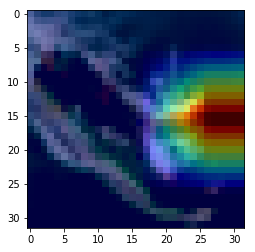

In [58]:
plt.imshow(img)
plt.imshow(np.array(img_sal), alpha=0.5, cmap="jet")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


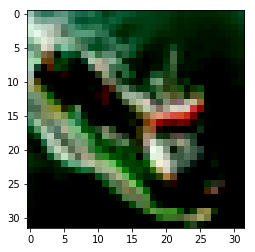

In [59]:
plt.imshow(img)